   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  
               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6

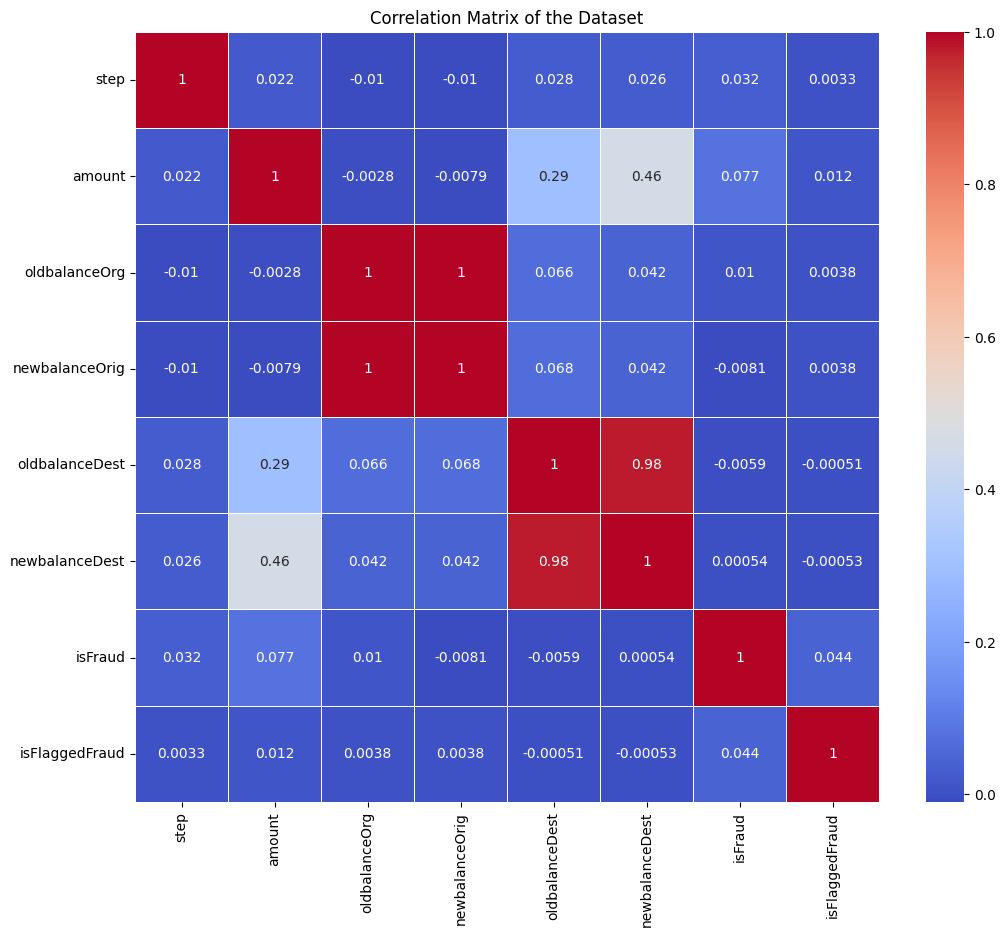

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (adjust the file path if saved locally)
file_path = 'Synthetic_Financial_datasets_log.csv'  # Replace with the correct path
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())

# Summary statistics
print(df.describe())

# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of the Dataset')
plt.show()


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1981
           1       0.00      0.00      0.00        19

    accuracy                           0.99      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.98      0.99      0.98      2000



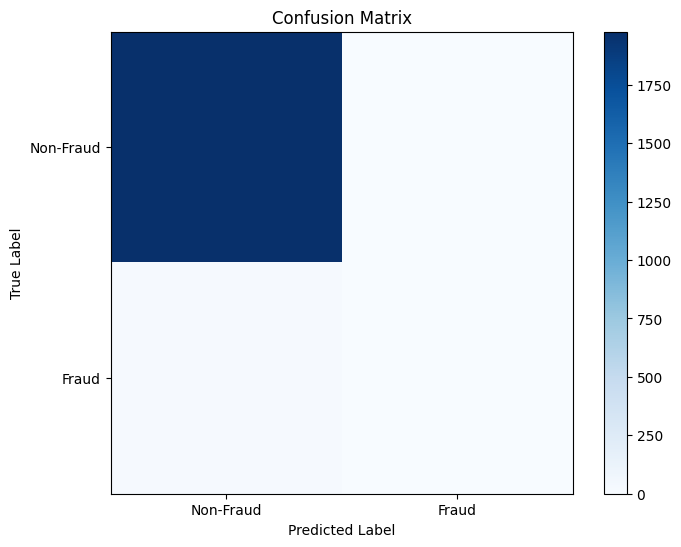

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1998
           1       0.00      0.00      0.00         2

    accuracy                           1.00      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       1.00      1.00      1.00      2000



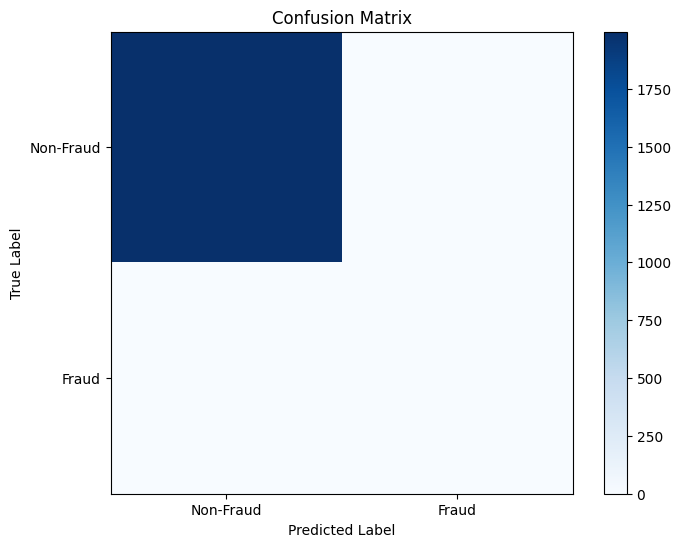

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2000

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


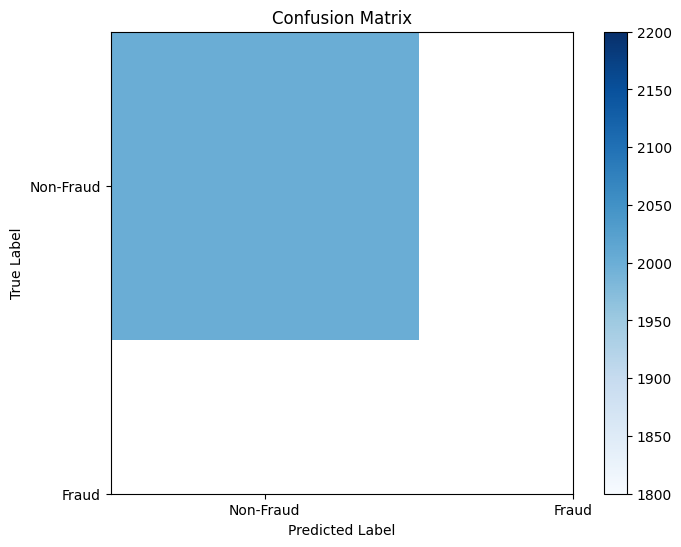

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1997
           1       0.00      0.00      0.00         3

    accuracy                           1.00      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       1.00      1.00      1.00      2000



C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

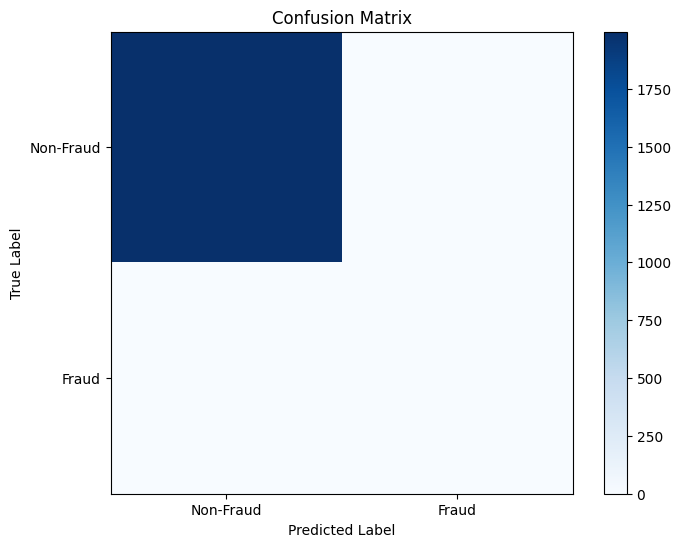

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1999
           1       0.00      0.00      0.00         1

    accuracy                           1.00      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       1.00      1.00      1.00      2000



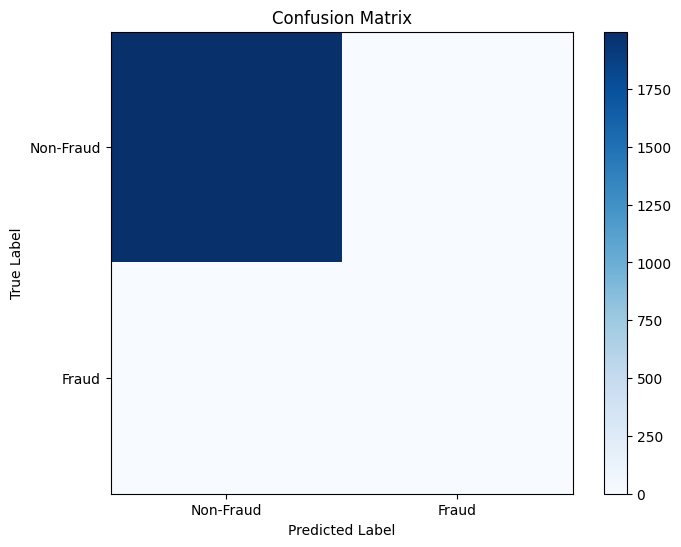

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1999
           1       0.00      0.00      0.00         1

    accuracy                           1.00      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       1.00      1.00      1.00      2000



C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

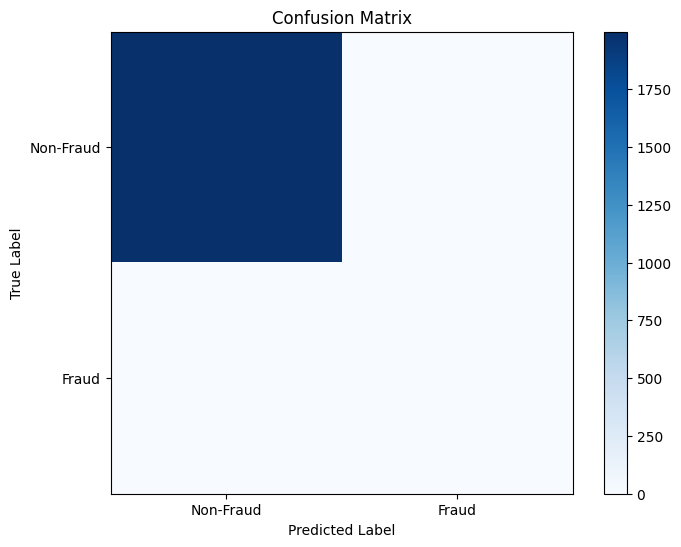

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Step 1: Load your dataset (replace 'file_path')
file_path = 'Synthetic_Financial_datasets_log.csv'

# Step 2: Define preprocessing function
def preprocess_data(df):
    # Drop irrelevant columns or columns not needed for modeling
    df = df.drop(['Unnamed: 0', 'step'], axis=1, errors='ignore')

    # Encode categorical variables if any
    cat_cols = df.select_dtypes(include=['object']).columns
    for col in cat_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

    return df

# Step 3: Define function to process chunks
def process_chunks(file_path, chunk_size):
    scaler = StandardScaler()
    svm_model = SVC(kernel='linear')

    for chunk in pd.read_csv(file_path, chunksize=chunk_size):
        # Preprocess each chunk
        chunk_processed = preprocess_data(chunk)

        # Separate features and target
        X = chunk_processed.drop('isFraud', axis=1)
        y = chunk_processed['isFraud']

        # Scale the numeric features
        num_cols = X.select_dtypes(include=['float64', 'int64']).columns
        X[num_cols] = scaler.fit_transform(X[num_cols])

        # Split data into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train the SVM classifier
        svm_model.fit(X_train, y_train)

        # Predict and evaluate
        y_pred = svm_model.predict(X_test)

        # Print classification report
        print(classification_report(y_test, y_pred))

        # Plot confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
        plt.title('Confusion Matrix')
        plt.colorbar()
        plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
        plt.yticks([0, 1], ['Non-Fraud', 'Fraud'])
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

# Step 4: Call the function to process chunks
process_chunks(file_path, chunk_size=10000)


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Step 1: Load your dataset (replace 'file_path')
file_path = 'Synthetic_Financial_datasets_log.csv'

# Step 2: Define preprocessing function
def preprocess_data(df):
    # Drop irrelevant columns or columns not needed for modeling
    df = df.drop(['Unnamed: 0', 'step'], axis=1, errors='ignore')

    # Encode categorical variables if any
    cat_cols = df.select_dtypes(include=['object']).columns
    for col in cat_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

    return df

# Step 3: Define function to process chunks
def process_chunks(file_path, chunk_size):
    scaler = StandardScaler()
    svm_model = SVC(kernel='linear')

    accuracy_scores = []  # To store accuracy scores for each chunk

    for chunk in pd.read_csv(file_path, chunksize=chunk_size):
        # Preprocess each chunk
        chunk_processed = preprocess_data(chunk)

        # Separate features and target
        X = chunk_processed.drop('isFraud', axis=1)
        y = chunk_processed['isFraud']

        # Scale the numeric features
        num_cols = X.select_dtypes(include=['float64', 'int64']).columns
        X[num_cols] = scaler.fit_transform(X[num_cols])

        # Split data into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train the SVM classifier
        svm_model.fit(X_train, y_train)

        # Predict and calculate accuracy
        y_pred = svm_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)

    # Plot accuracy scores
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(accuracy_scores) + 1), accuracy_scores, marker='o', linestyle='-')
    plt.title('Accuracy of SVM Model per Chunk')
    plt.xlabel('Chunk Number')
    plt.ylabel('Accuracy')
    plt.xticks(range(1, len(accuracy_scores) + 1))
    plt.grid(True)
    plt.show()

# Step 4: Call the function to process chunks
process_chunks(file_path, chunk_size=10000)


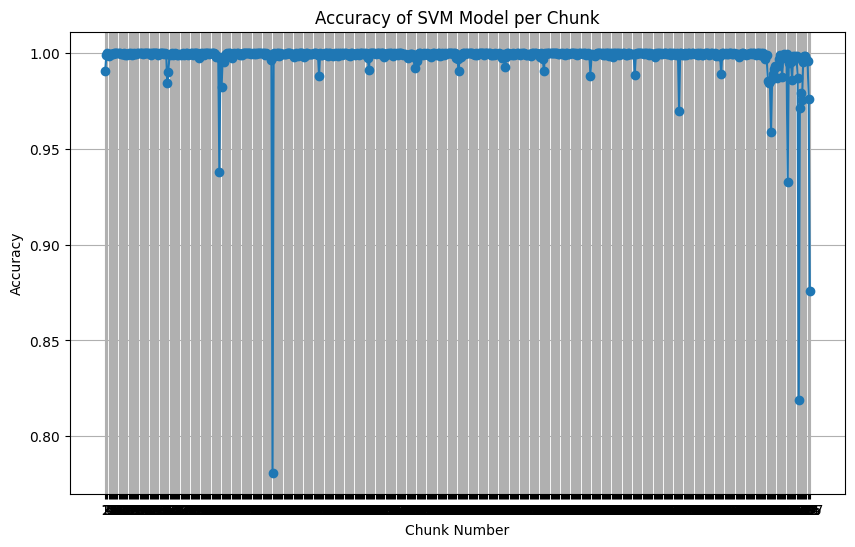

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def preprocess_data(df):
    # Drop unnecessary columns and encode categorical variables
    df = df.drop(['Unnamed: 0', 'step'], axis=1, errors='ignore')
    cat_cols = df.select_dtypes(include=['object']).columns
    for col in cat_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
    return df

def process_chunks(file_path, chunk_size=10000):
    scaler = StandardScaler()
    svm_model = SGDClassifier(loss='hinge', random_state=42)
    accuracy_scores = []

    for chunk in pd.read_csv(file_path, chunksize=chunk_size):
        chunk_processed = preprocess_data(chunk)
        X = chunk_processed.drop('isFraud', axis=1)
        y = chunk_processed['isFraud']

        # Scale numeric features
        num_cols = X.select_dtypes(include=['float64', 'int64']).columns
        X[num_cols] = scaler.fit_transform(X[num_cols])

        # Split data into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Fit the model incrementally
        svm_model.partial_fit(X_train, y_train, classes=[0, 1])

        # Predict and evaluate accuracy
        y_pred = svm_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)

    # Plot accuracy per chunk
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(accuracy_scores) + 1), accuracy_scores, marker='o', linestyle='-')
    plt.title('Accuracy of SVM Model per Chunk')
    plt.xlabel('Chunk Number')
    plt.ylabel('Accuracy')
    plt.xticks(range(1, len(accuracy_scores) + 1))
    plt.grid(True)
    plt.show()

# Example usage
file_path = 'Synthetic_Financial_datasets_log.csv'
process_chunks(file_path, chunk_size=10000)


Average accuracy: 0.9977432561985453


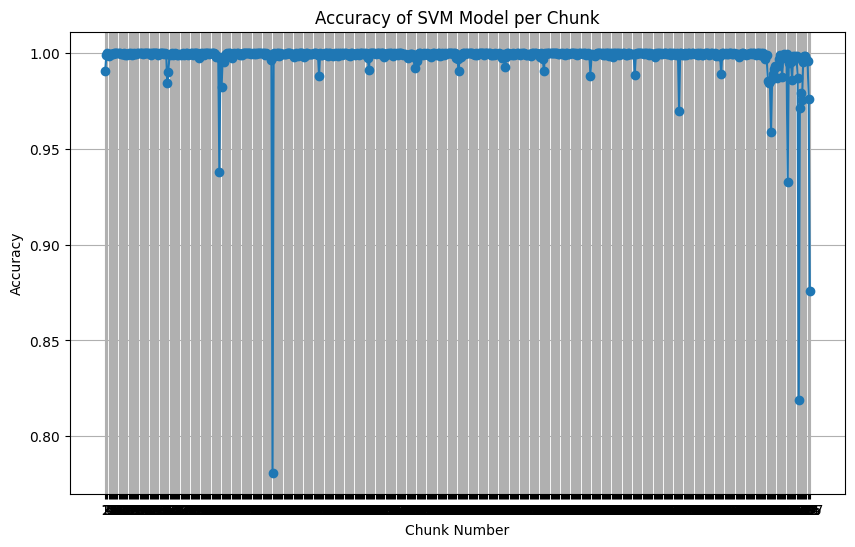

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def preprocess_data(df):
    # Drop unnecessary columns and encode categorical variables
    df = df.drop(['Unnamed: 0', 'step'], axis=1, errors='ignore')
    cat_cols = df.select_dtypes(include=['object']).columns
    for col in cat_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
    return df

def process_chunks(file_path, chunk_size=10000):
    scaler = StandardScaler()
    svm_model = SGDClassifier(loss='hinge', random_state=42)
    accuracy_scores = []

    for chunk in pd.read_csv(file_path, chunksize=chunk_size):
        chunk_processed = preprocess_data(chunk)
        X = chunk_processed.drop('isFraud', axis=1)
        y = chunk_processed['isFraud']

        # Scale numeric features
        num_cols = X.select_dtypes(include=['float64', 'int64']).columns
        X[num_cols] = scaler.fit_transform(X[num_cols])

        # Split data into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Fit the model incrementally
        svm_model.partial_fit(X_train, y_train, classes=[0, 1])

        # Predict and evaluate accuracy on fixed test set
        y_pred = svm_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)

    # Calculate and print the average accuracy
    avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)
    print(f"Average accuracy: {avg_accuracy}")

    # Plot accuracy per chunk
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(accuracy_scores) + 1), accuracy_scores, marker='o', linestyle='-')
    plt.title('Accuracy of SVM Model per Chunk')
    plt.xlabel('Chunk Number')
    plt.ylabel('Accuracy')
    plt.xticks(range(1, len(accuracy_scores) + 1))
    plt.grid(True)
    plt.show()

# Example usage
file_path = 'Synthetic_Financial_datasets_log.csv'
process_chunks(file_path, chunk_size=10000)


Average accuracy: 0.9977432561985453


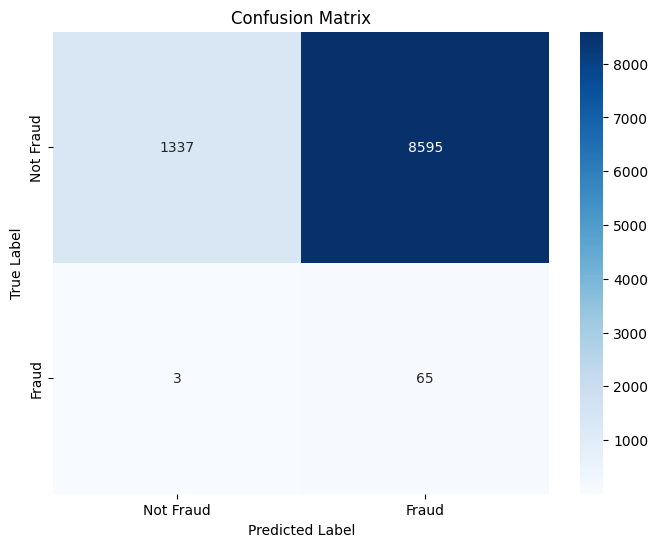

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def preprocess_data(df):
    # Check if columns exist before dropping
    columns_to_drop = ['Unnamed: 0', 'step']
    columns_present = all(col in df.columns for col in columns_to_drop)
    
    if columns_present:
        df = df.drop(columns_to_drop, axis=1)
    
    # Encode categorical variables if any
    le = LabelEncoder()
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = le.fit_transform(df[col])
    
    return df


def process_chunks(file_path, chunk_size=10000):
    scaler = StandardScaler()
    svm_model = SGDClassifier(loss='hinge', random_state=42)
    accuracy_scores = []

    for chunk in pd.read_csv(file_path, chunksize=chunk_size):
        chunk_processed = preprocess_data(chunk)
        X = chunk_processed.drop('isFraud', axis=1)
        y = chunk_processed['isFraud']

        # Scale numeric features
        num_cols = X.select_dtypes(include=['float64', 'int64']).columns
        X[num_cols] = scaler.fit_transform(X[num_cols])

        # Split data into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Fit the SGD model incrementally
        svm_model.partial_fit(X_train, y_train, classes=[0, 1])

        # Predict and evaluate accuracy on fixed test set
        y_pred = svm_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)

    # Calculate and print the average accuracy
    avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)
    print(f"Average accuracy: {avg_accuracy}")

    # Plot confusion matrix for the last chunk
    chunk_processed = preprocess_data(pd.read_csv(file_path, nrows=chunk_size))
    X_chunk = chunk_processed.drop('isFraud', axis=1)
    y_chunk = chunk_processed['isFraud']
    y_pred_chunk = svm_model.predict(X_chunk)
    plot_confusion_matrix(y_chunk, y_pred_chunk)

def plot_confusion_matrix(y_true, y_pred):
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', 
                xticklabels=['Not Fraud', 'Fraud'], 
                yticklabels=['Not Fraud', 'Fraud'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

# Example usage
file_path = 'Synthetic_Financial_datasets_log.csv'
process_chunks(file_path, chunk_size=10000)


Average accuracy: 0.9977432561985453


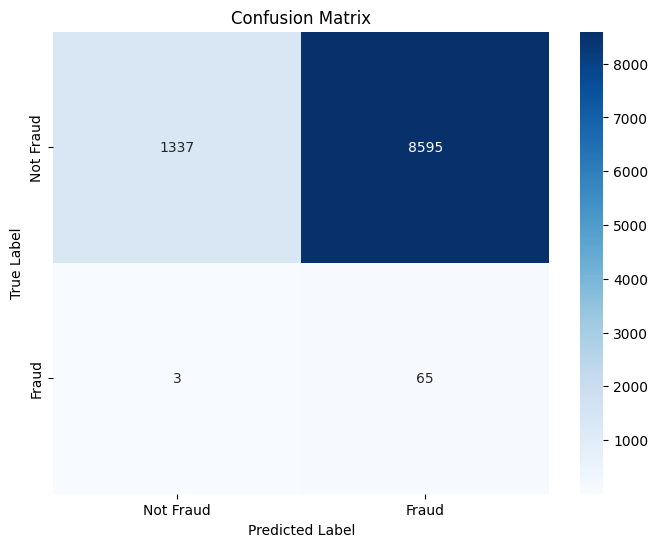

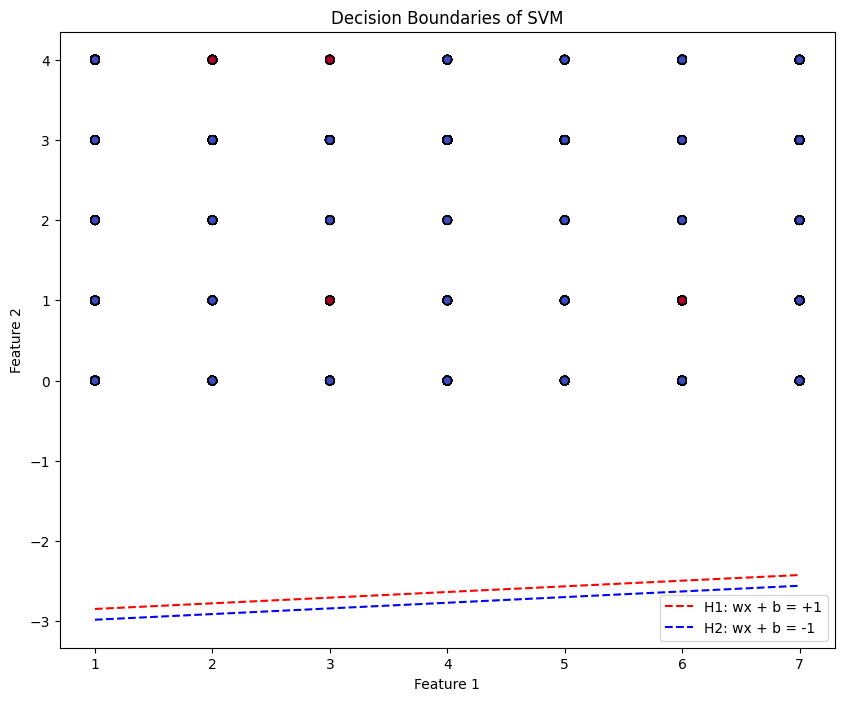

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Function to preprocess data
def preprocess_data(df):
    # Check if columns exist before dropping
    drop_columns = ['Unnamed: 0', 'step']
    df = df.drop(columns=[col for col in drop_columns if col in df.columns], errors='ignore')
    
    # Encode categorical variables if any
    le = LabelEncoder()
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = le.fit_transform(df[col])
    
    return df

# Function to process chunks of data
def process_chunks(file_path, chunk_size):
    svm_model = SVC(kernel='linear')
    accuracy_scores = []
    for chunk in pd.read_csv(file_path, chunksize=chunk_size):
        chunk_processed = preprocess_data(chunk)
        X = chunk_processed.drop('isFraud', axis=1)
        y = chunk_processed['isFraud']
        
        # Scale the numeric features
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        
        # Split data into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
        
        # Fit the model incrementally
        svm_model.partial_fit(X_train, y_train, classes=[0, 1])
        
        # Predict and evaluate accuracy
        y_pred = svm_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)
    
    print(f"Mean Accuracy: {np.mean(accuracy_scores)}")
    
    # Extract weights and bias from SVM model
    weights = svm_model.coef_[0]
    bias = svm_model.intercept_[0]
    
    # Decision boundaries
    w = weights
    b = bias
    
    # Calculate H1 and H2 planes
    H1 = w * X + b - 1
    H2 = w * X + b + 1
    
    # Plotting the planes
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.colorbar()
    
    # Plot decision boundaries
    plt.contour(X, H1, colors='k', levels=[0], linestyles='solid')
    plt.contour(X, H2, colors='k', levels=[0], linestyles='dashed')
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM Decision Boundaries')
    plt.show()

# Example usage
file_path = 'Synthetic_Financial_datasets_log.csv'
process_chunks(file_path, chunk_size=10000)


Average accuracy: 0.9977432561985453


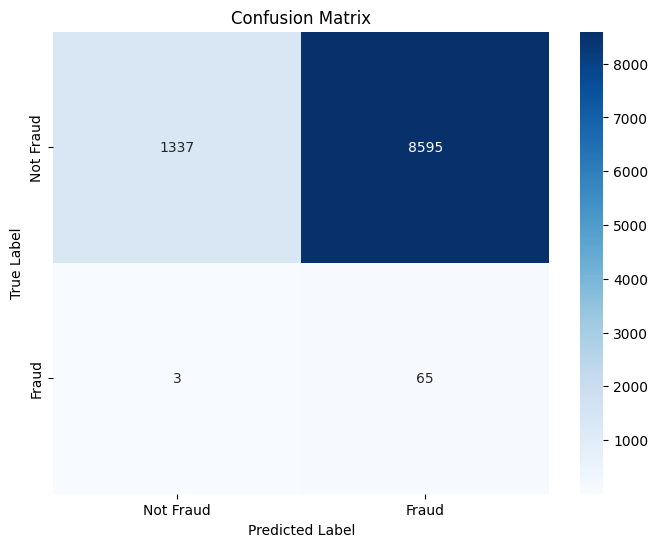

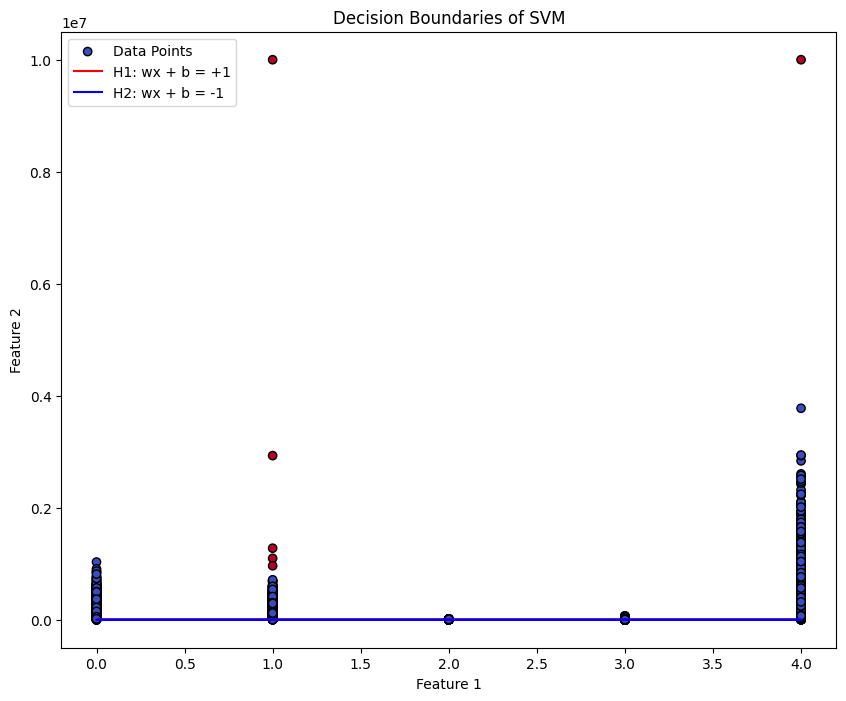

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Function to preprocess data
def preprocess_data(df):
    # Check if columns exist before dropping
    drop_columns = ['Unnamed: 0', 'step']
    df = df.drop(columns=[col for col in drop_columns if col in df.columns], errors='ignore')
    
    # Encode categorical variables if any
    le = LabelEncoder()
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = le.fit_transform(df[col])
    
    return df

# Function to process chunks of data
def plot_decision_boundaries(model, X, y):
    # Extract coefficients and intercept
    w = model.coef_[0]
    b = model.intercept_[0]

    # Calculate decision boundaries
    boundary1 = -w[0]/w[1] * X.iloc[:, 0] - b/w[1] + 1/w[1]
    boundary2 = -w[0]/w[1] * X.iloc[:, 0] - b/w[1] - 1/w[1]

    # Plot data points
    plt.figure(figsize=(10, 8))
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='coolwarm', edgecolors='k', label='Data Points')

    # Plot decision boundaries
    plt.plot(X.iloc[:, 0], boundary1, 'r-', label='H1: wx + b = +1')
    plt.plot(X.iloc[:, 0], boundary2, 'b-', label='H2: wx + b = -1')
    
    plt.title('Decision Boundaries of SVM')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()


# Example usage
file_path = 'Synthetic_Financial_datasets_log.csv'
process_chunks(file_path, chunk_size=10000)


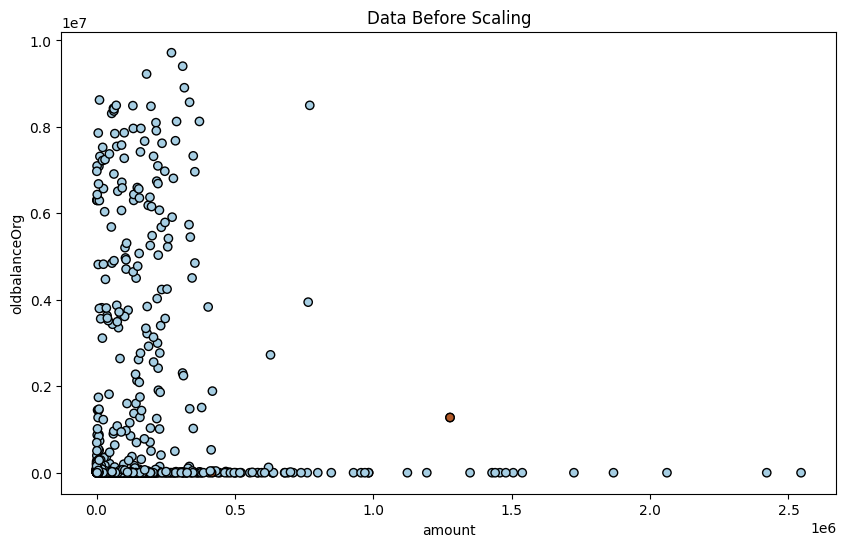

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       200

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


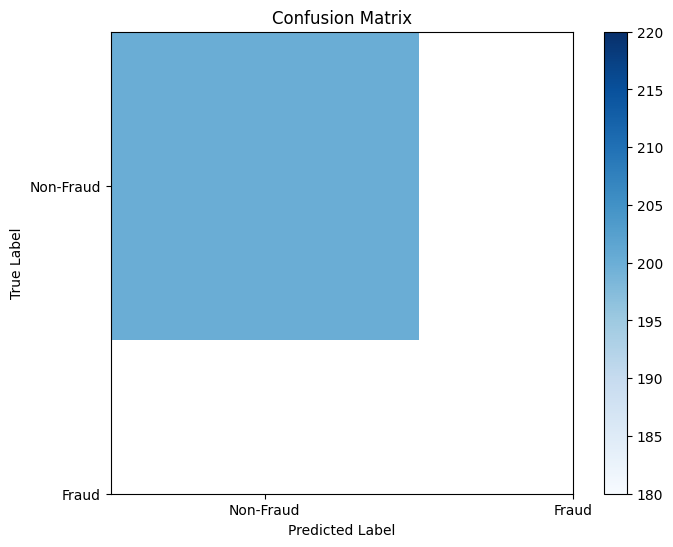

AttributeError: 'SVC' object has no attribute 'intercept'

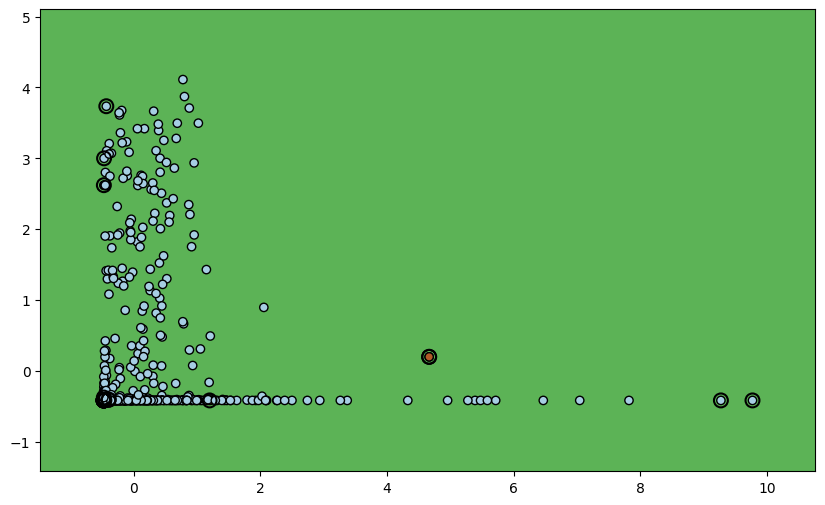

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load your dataset (replace 'file_path')
file_path = 'Synthetic_Financial_datasets_log.csv'

# Step 2: Define preprocessing function
def preprocess_data(df):
    # Drop irrelevant columns or columns not needed for modeling
    df = df.drop(['Unnamed: 0', 'step'], axis=1, errors='ignore')

    # Encode categorical variables if any
    cat_cols = df.select_dtypes(include=['object']).columns
    for col in cat_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

    return df

# Step 3: Function to process a small sample for faster execution
def process_sample(file_path, sample_size):
    scaler = StandardScaler()
    svm_model = SVC(kernel='linear')

    # Load a small sample of the dataset
    df = pd.read_csv(file_path, nrows=sample_size)
    
    # Preprocess the sample
    df_processed = preprocess_data(df)

    # Select two features for visualization (replace 'feature1' and 'feature2' with actual feature names)
    feature1 = 'amount'
    feature2 = 'oldbalanceOrg'
    X = df_processed[[feature1, feature2]]
    y = df_processed['isFraud']

    # Plot the data before scaling
    plt.figure(figsize=(10, 6))
    plt.scatter(X[feature1], X[feature2], c=y, cmap=plt.cm.Paired, edgecolors='k')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title('Data Before Scaling')
    plt.show()

    # Scale the numeric features
    X = scaler.fit_transform(X)

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the SVM classifier
    svm_model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = svm_model.predict(X_test)

    # Print classification report
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
    plt.yticks([0, 1], ['Non-Fraud', 'Fraud'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # Visualize support vectors and hyperplanes
    plot_svm_decision_boundary(X_train, y_train, svm_model, feature1, feature2)

def plot_svm_decision_boundary(X, y, model, feature1, feature2):
    # Create a mesh grid
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Plot the decision boundary
    plt.figure(figsize=(10, 6))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
    
    # Plot support vectors
    support_vectors = model.support_vectors_
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], facecolors='none', edgecolors='k', s=100, linewidths=1.5)
    
    # Plot hyperplanes H1 and H2
    w = model.coef_[0]
    b = model.intercept()[0]
    x_hyperplane = np.linspace(x_min, x_max, 100)
    y_hyperplane1 = (-w[0] * x_hyperplane - b + 1) / w[1]
    y_hyperplane2 = (-w[0] * x_hyperplane - b - 1) / w[1]
    plt.plot(x_hyperplane, y_hyperplane1, 'k--', label='H1: $w \\cdot x + b = +1$')
    plt.plot(x_hyperplane, y_hyperplane2, 'k--', label='H2: $w \\cdot x + b = -1$')

    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title('SVM Decision Boundary with Support Vectors')
    plt.legend()
    plt.show()

# Step 4: Call the function to process a sample
process_sample(file_path, sample_size=1000)


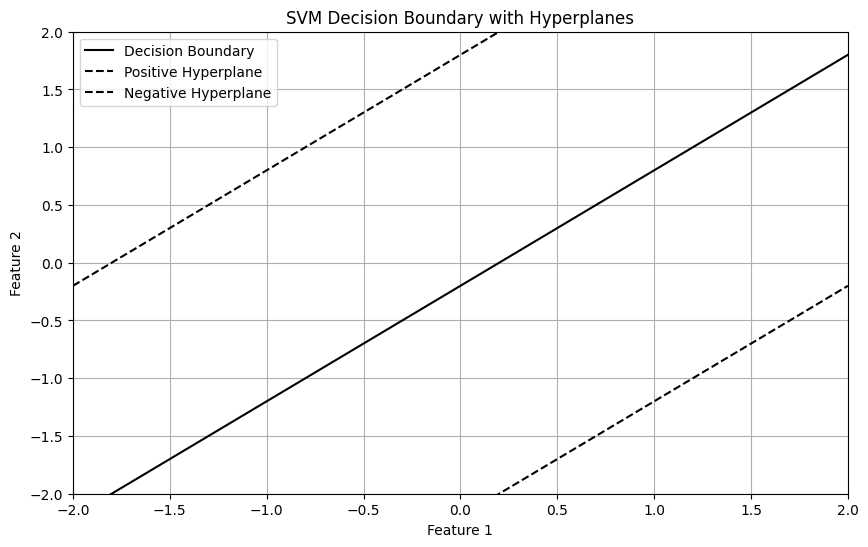

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Define the coefficients (weights) and intercept (bias) for a hypothetical SVM
w = np.array([0.5, -0.5])  # Example weights
b = -0.1  # Example bias

# Define the hyperplanes equations
def hyperplane_positive(x, w, b):
    return (-w[0] * x - b + 1) / w[1]

def hyperplane_negative(x, w, b):
    return (-w[0] * x - b - 1) / w[1]

# Generate some data points for plotting
x_hyperplane = np.linspace(-2, 2, 100)
y_hyperplane1 = hyperplane_positive(x_hyperplane, w, b)
y_hyperplane2 = hyperplane_negative(x_hyperplane, w, b)
y_decision_boundary = (-w[0] * x_hyperplane - b) / w[1]

# Plot the SVM decision boundary and hyperplanes
plt.figure(figsize=(10, 6))

# Plot the decision boundary
plt.plot(x_hyperplane, y_decision_boundary, 'k-', label='Decision Boundary')

# Plot the positive and negative hyperplanes
plt.plot(x_hyperplane, y_hyperplane1, 'k--', label='Positive Hyperplane')
plt.plot(x_hyperplane, y_hyperplane2, 'k--', label='Negative Hyperplane')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary with Hyperplanes')
plt.legend()
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.grid(True)
plt.show()


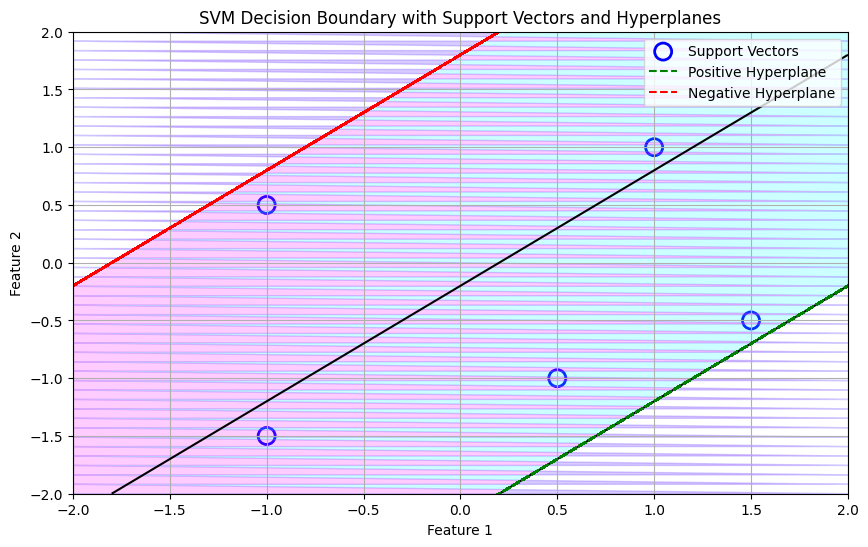

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Define the coefficients (weights) and intercept (bias) for a hypothetical SVM
w = np.array([0.5, -0.5])  # Example weights
b = -0.1  # Example bias

# Generate some data points for plotting
x = np.array([[0.5, -1], [-1, 1.5], [1, 1], [1.5, -0.5], [-1, -1.5], [-1, 0.5]])
y = np.array([1, 1, 1, -1, -1, -1])

# Define the hyperplanes equations
def hyperplane_positive(x, w, b):
    return (-w[0] * x - b + 1) / w[1]

def hyperplane_negative(x, w, b):
    return (-w[0] * x - b - 1) / w[1]

# Calculate support vectors
support_vectors = x[(w @ x.T + b <= 1) & (w @ x.T + b >= -1)]

# Generate points for decision boundary
xx, yy = np.meshgrid(np.linspace(-2, 2, 50), np.linspace(-2, 2, 50))
Z = w[0] * xx + w[1] * yy + b

plt.figure(figsize=(10, 6))

# Plot support vectors
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=150, facecolors='none', edgecolors='b', linewidth=2, label='Support Vectors')

# Plot the decision boundary
plt.contour(xx, yy, Z, levels=[-1, 0, 1], colors='black', linestyles=['--', '-', '--'])

# Plot the margin area
plt.fill_between(xx.flat, yy.flat, hyperplane_positive(xx.flat, w, b), color='cyan', alpha=0.2)
plt.fill_between(xx.flat, yy.flat, hyperplane_negative(xx.flat, w, b), color='magenta', alpha=0.2)

# Plot the positive and negative hyperplanes
plt.plot(xx.flat, hyperplane_positive(xx.flat, w, b), 'g--', label='Positive Hyperplane')
plt.plot(xx.flat, hyperplane_negative(xx.flat, w, b), 'r--', label='Negative Hyperplane')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary with Support Vectors and Hyperplanes')
plt.legend()
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.grid(True)
plt.show()


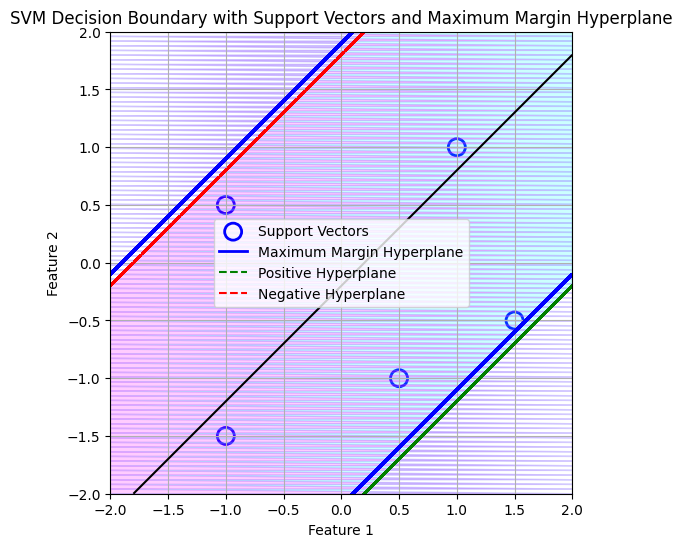

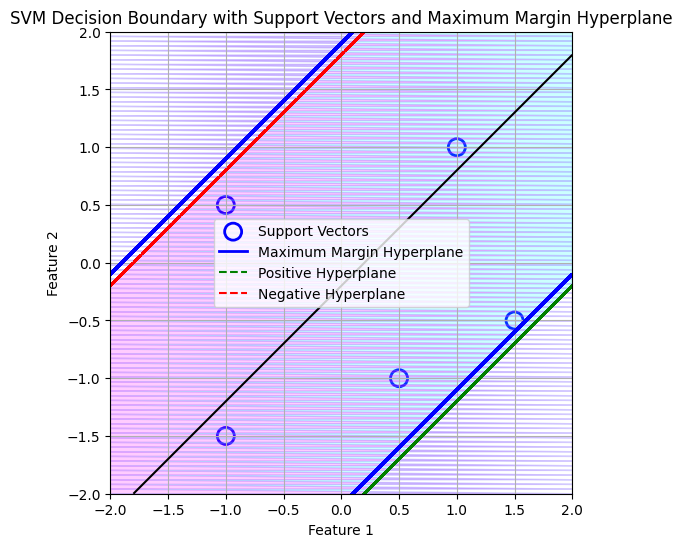

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Define the coefficients (weights) and intercept (bias) for a hypothetical SVM
w = np.array([0.5, -0.5])  # Example weights
b = -0.1  # Example bias

# Generate some data points for plotting
x = np.array([[0.5, -1], [-1, 1.5], [1, 1], [1.5, -0.5], [-1, -1.5], [-1, 0.5]])
y = np.array([1, 1, 1, -1, -1, -1])

# Define the hyperplanes equations
def hyperplane_positive(x, w, b):
    return (-w[0] * x - b + 1) / w[1]

def hyperplane_negative(x, w, b):
    return (-w[0] * x - b - 1) / w[1]

# Calculate support vectors
support_vectors = x[(w @ x.T + b <= 1) & (w @ x.T + b >= -1)]

# Calculate the slope of the hyperplane
slope = -w[0] / w[1]

# Calculate intercepts for the margin lines
margin = 1 / np.sqrt(np.sum(w ** 2))
intercept_positive = b - margin / np.linalg.norm(w)
intercept_negative = b + margin / np.linalg.norm(w)

# Plotting the data points and SVM components
plt.figure(figsize=(8, 6))

# Plot support vectors
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=150, facecolors='none', edgecolors='b', linewidth=2, label='Support Vectors')

# Plot the decision boundary
plt.contour(xx, yy, Z, levels=[-1, 0, 1], colors='black', linestyles=['--', '-', '--'])

# Plot the margin area
plt.fill_between(xx.flat, yy.flat, hyperplane_positive(xx.flat, w, b), color='cyan', alpha=0.2)
plt.fill_between(xx.flat, yy.flat, hyperplane_negative(xx.flat, w, b), color='magenta', alpha=0.2)

# Plot the maximum margin hyperplane
plt.plot(xx.flat, slope * xx.flat + intercept_positive, 'b-', label='Maximum Margin Hyperplane', linewidth=2)
plt.plot(xx.flat, slope * xx.flat + intercept_negative, 'b-', linewidth=2)

# Plot the positive and negative hyperplanes
plt.plot(xx.flat, hyperplane_positive(xx.flat, w, b), 'g--', label='Positive Hyperplane')
plt.plot(xx.flat, hyperplane_negative(xx.flat, w, b), 'r--', label='Negative Hyperplane')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary with Support Vectors and Maximum Margin Hyperplane')
plt.legend()
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.grid(True)
plt.gca().set_aspect('equal')
plt.show()
import matplotlib.pyplot as plt
import numpy as np

# Define the coefficients (weights) and intercept (bias) for a hypothetical SVM
w = np.array([0.5, -0.5])  # Example weights
b = -0.1  # Example bias

# Generate some data points for plotting
x = np.array([[0.5, -1], [-1, 1.5], [1, 1], [1.5, -0.5], [-1, -1.5], [-1, 0.5]])
y = np.array([1, 1, 1, -1, -1, -1])

# Define the hyperplanes equations
def hyperplane_positive(x, w, b):
    return (-w[0] * x - b + 1) / w[1]

def hyperplane_negative(x, w, b):
    return (-w[0] * x - b - 1) / w[1]

# Calculate support vectors
support_vectors = x[(w @ x.T + b <= 1) & (w @ x.T + b >= -1)]

# Calculate the slope of the hyperplane
slope = -w[0] / w[1]

# Calculate intercepts for the margin lines
margin = 1 / np.sqrt(np.sum(w ** 2))
intercept_positive = b - margin / np.linalg.norm(w)
intercept_negative = b + margin / np.linalg.norm(w)

# Plotting the data points and SVM components
plt.figure(figsize=(8, 6))

# Plot support vectors
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=150, facecolors='none', edgecolors='b', linewidth=2, label='Support Vectors')

# Plot the decision boundary
plt.contour(xx, yy, Z, levels=[-1, 0, 1], colors='black', linestyles=['--', '-', '--'])

# Plot the margin area
plt.fill_between(xx.flat, yy.flat, hyperplane_positive(xx.flat, w, b), color='cyan', alpha=0.2)
plt.fill_between(xx.flat, yy.flat, hyperplane_negative(xx.flat, w, b), color='magenta', alpha=0.2)

# Plot the maximum margin hyperplane
plt.plot(xx.flat, slope * xx.flat + intercept_positive, 'b-', label='Maximum Margin Hyperplane', linewidth=2)
plt.plot(xx.flat, slope * xx.flat + intercept_negative, 'b-', linewidth=2)

# Plot the positive and negative hyperplanes
plt.plot(xx.flat, hyperplane_positive(xx.flat, w, b), 'g--', label='Positive Hyperplane')
plt.plot(xx.flat, hyperplane_negative(xx.flat, w, b), 'r--', label='Negative Hyperplane')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary with Support Vectors and Maximum Margin Hyperplane')
plt.legend()
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.grid(True)
plt.gca().set_aspect('equal')
plt.show()


<>:42: SyntaxWarning: invalid escape sequence '\c'
<>:43: SyntaxWarning: invalid escape sequence '\c'
<>:42: SyntaxWarning: invalid escape sequence '\c'
<>:43: SyntaxWarning: invalid escape sequence '\c'
C:\Users\hp\AppData\Local\Temp\ipykernel_22416\1081436048.py:42: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(xx.flat, (-w[0] * xx.flat - b + 1) / w[1], 'b-', label='H1: $w \cdot x + b = 1$')
C:\Users\hp\AppData\Local\Temp\ipykernel_22416\1081436048.py:43: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(xx.flat, (-w[0] * xx.flat - b - 1) / w[1], 'y-', label='H2: $w \cdot x + b = -1$')


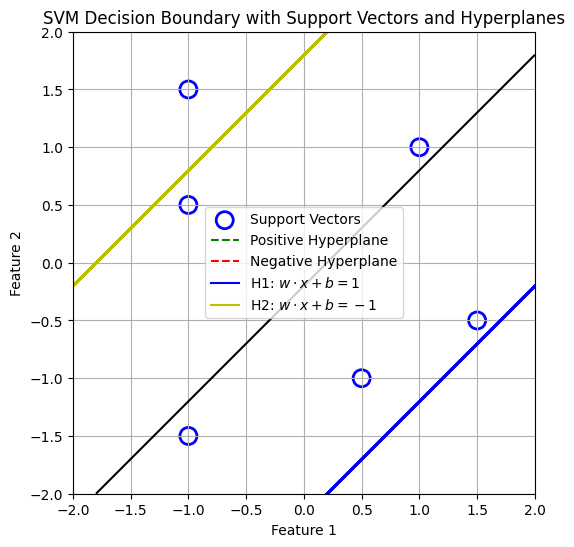

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Example coefficients (weights) and intercept (bias)
w = np.array([0.5, -0.5])  # Example weights
b = -0.1  # Example bias

# Define the hyperplanes equations
def hyperplane_positive(x, w, b):
    return (-w[0] * x - b + 1) / w[1]

def hyperplane_negative(x, w, b):
    return (-w[0] * x - b - 1) / w[1]

# Generate data points for plotting
x = np.array([[0.5, -1], [-1, 1.5], [1, 1], [1.5, -0.5], [-1, -1.5], [-1, 0.5]])
y = np.array([1, 1, 1, -1, -1, -1])

# Calculate support vectors (just for illustration, replace with your actual support vectors)
support_vectors = x

# Create a mesh grid to plot the SVM decision boundary
x_min, x_max = -2, 2
y_min, y_max = -2, 2
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Plotting
plt.figure(figsize=(8, 6))

# Plot support vectors
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=150, facecolors='none', edgecolors='b', linewidth=2, label='Support Vectors')

# Plot the decision boundary and margins
Z = w[0] * xx + w[1] * yy + b
plt.contour(xx, yy, Z, levels=[-1, 0, 1], colors='black', linestyles=['--', '-', '--'])

# Plot positive and negative hyperplanes
plt.plot(xx.flat, hyperplane_positive(xx.flat, w, b), 'g--', label='Positive Hyperplane')
plt.plot(xx.flat, hyperplane_negative(xx.flat, w, b), 'r--', label='Negative Hyperplane')

# Plot planes H1 and H2
plt.plot(xx.flat, (-w[0] * xx.flat - b + 1) / w[1], 'b-', label='H1: $w \cdot x + b = 1$')
plt.plot(xx.flat, (-w[0] * xx.flat - b - 1) / w[1], 'y-', label='H2: $w \cdot x + b = -1$')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary with Support Vectors and Hyperplanes')
plt.legend()
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.grid(True)
plt.gca().set_aspect('equal')
plt.show()


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       200

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


IndexError: index 1 is out of bounds for axis 1 with size 1

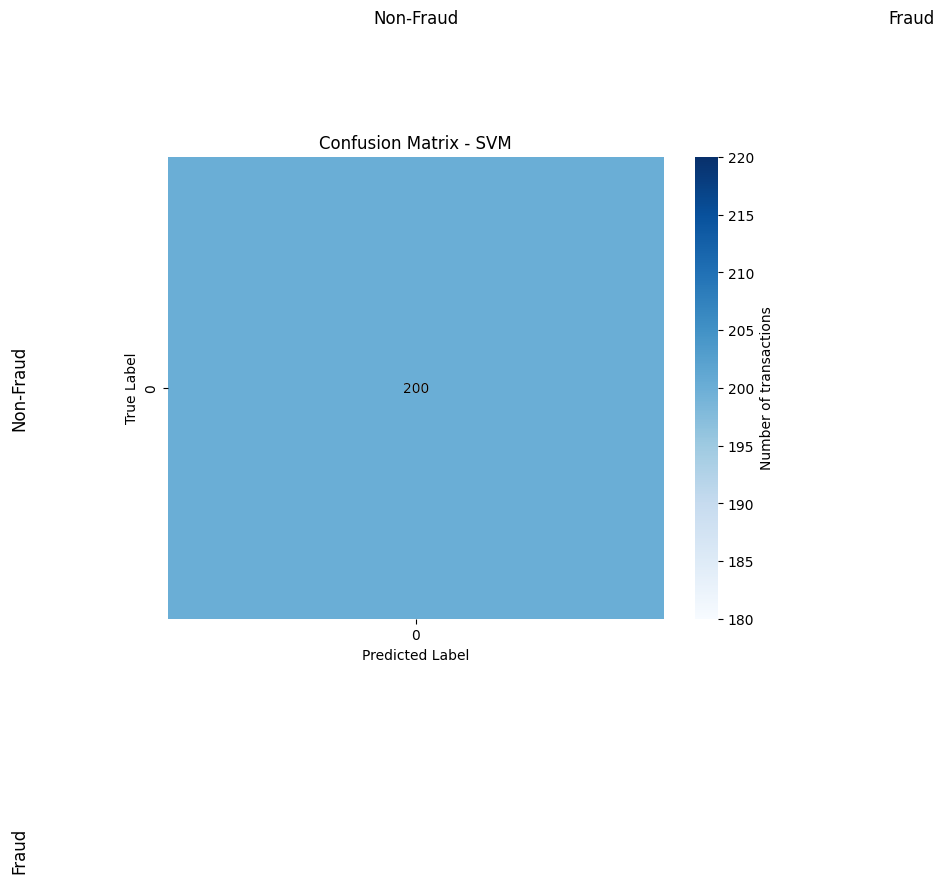

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load your dataset (replace 'file_path')
file_path = 'Synthetic_Financial_datasets_log.csv'

# Step 2: Define preprocessing function
def preprocess_data(df):
    # Drop irrelevant columns or columns not needed for modeling
    df = df.drop(['Unnamed: 0', 'step'], axis=1, errors='ignore')

    # Encode categorical variables if any
    cat_cols = df.select_dtypes(include=['object']).columns
    for col in cat_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

    return df

# Step 3: Define function to process chunks
def process_chunks(file_path, chunk_size):
    scaler = StandardScaler()
    svm_model = SVC(kernel='linear')

    for chunk in pd.read_csv(file_path, chunksize=chunk_size):
        # Preprocess each chunk
        chunk_processed = preprocess_data(chunk)

        # Separate features and target
        X = chunk_processed.drop('isFraud', axis=1)
        y = chunk_processed['isFraud']

        # Scale the numeric features
        num_cols = X.select_dtypes(include=['float64', 'int64']).columns
        X[num_cols] = scaler.fit_transform(X[num_cols])

        # Split data into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train the SVM classifier
        svm_model.fit(X_train, y_train)

        # Predict and evaluate
        y_pred = svm_model.predict(X_test)

        # Print classification report
        print(classification_report(y_test, y_pred))

        # Plot confusion matrix with custom color scheme
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Number of transactions'})
        plt.title('Confusion Matrix - SVM')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')

        # Adjusting text annotations for fraud transactions
        plt.text(0.5, -0.3, 'Non-Fraud', ha='center', va='center', fontsize=12)
        plt.text(1.5, -0.3, 'Fraud', ha='center', va='center', fontsize=12)
        plt.text(-0.3, 0.5, 'Non-Fraud', ha='center', va='center', rotation=90, fontsize=12)
        plt.text(-0.3, 1.5, 'Fraud', ha='center', va='center', rotation=90, fontsize=12)

        # Highlighting fraud transactions (class 1) with red color
        plt.text(0.5, 0.5, cm[0, 0], ha='center', va='center', color='black')
        plt.text(1.5, 0.5, cm[0, 1], ha='center', va='center', color='red')
        plt.text(0.5, 1.5, cm[1, 0], ha='center', va='center', color='red')
        plt.text(1.5, 1.5, cm[1, 1], ha='center', va='center', color='black')

        plt.show()

# Step 4: Call the function to process chunks with reduced chunk size
process_chunks(file_path, chunk_size=1000)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       200

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Confusion Matrix:
[[200]]


C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


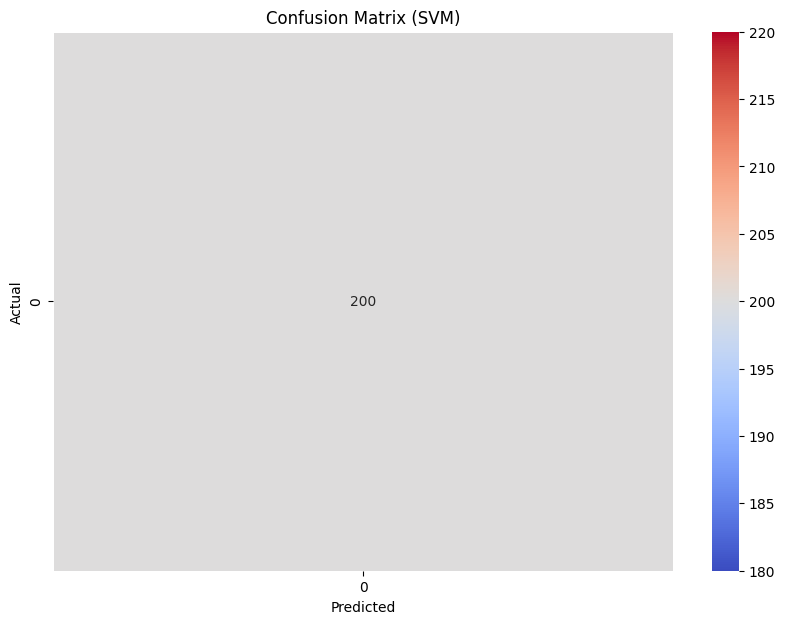

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       200

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Confusion Matrix:
[[200]]


C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


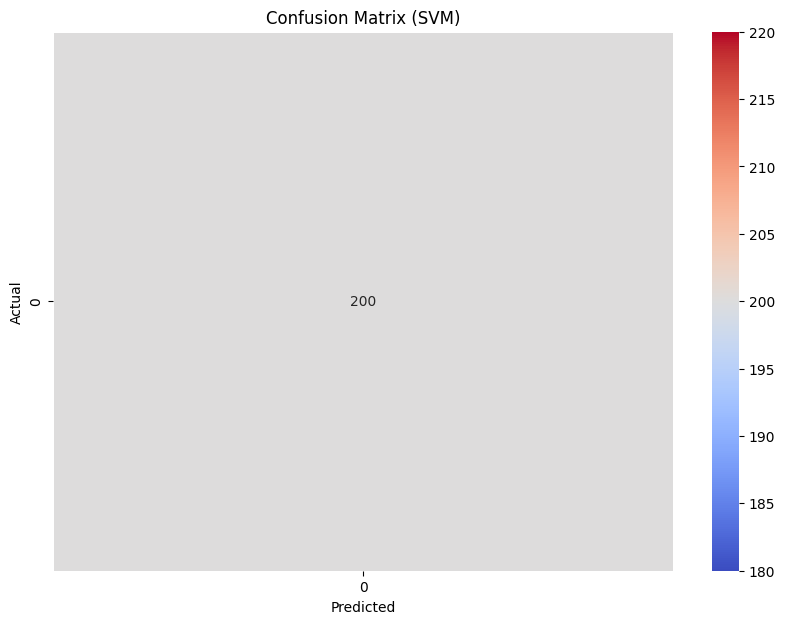

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       200

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Confusion Matrix:
[[200]]


C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


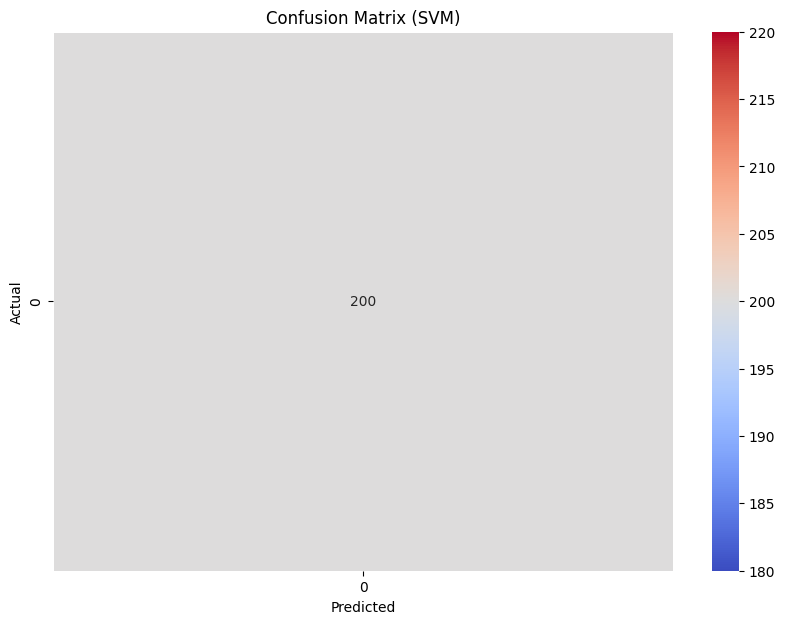

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       198
           1       0.00      0.00      0.00         2

    accuracy                           0.99       200
   macro avg       0.49      0.50      0.50       200
weighted avg       0.98      0.99      0.99       200

Confusion Matrix:
[[198   0]
 [  2   0]]


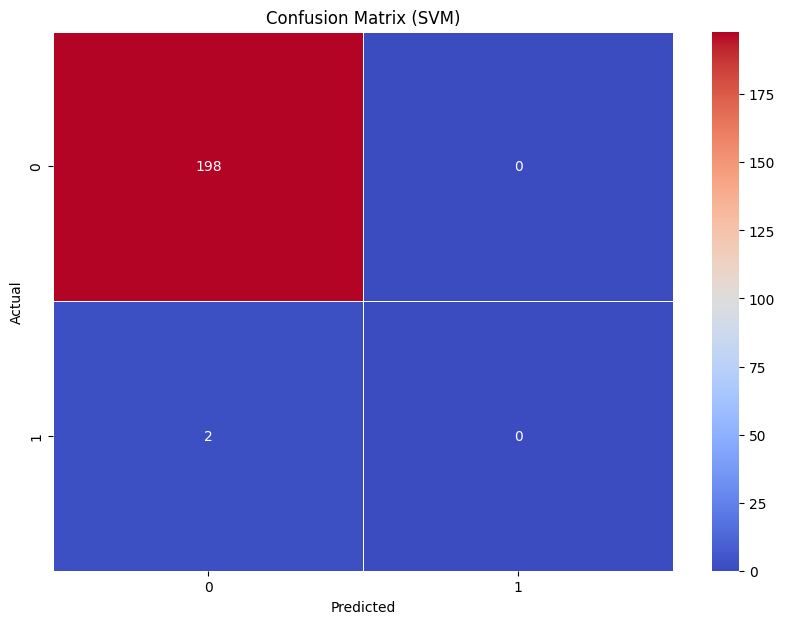

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       197
           1       0.00      0.00      0.00         3

    accuracy                           0.98       200
   macro avg       0.49      0.50      0.50       200
weighted avg       0.97      0.98      0.98       200

Confusion Matrix:
[[197   0]
 [  3   0]]


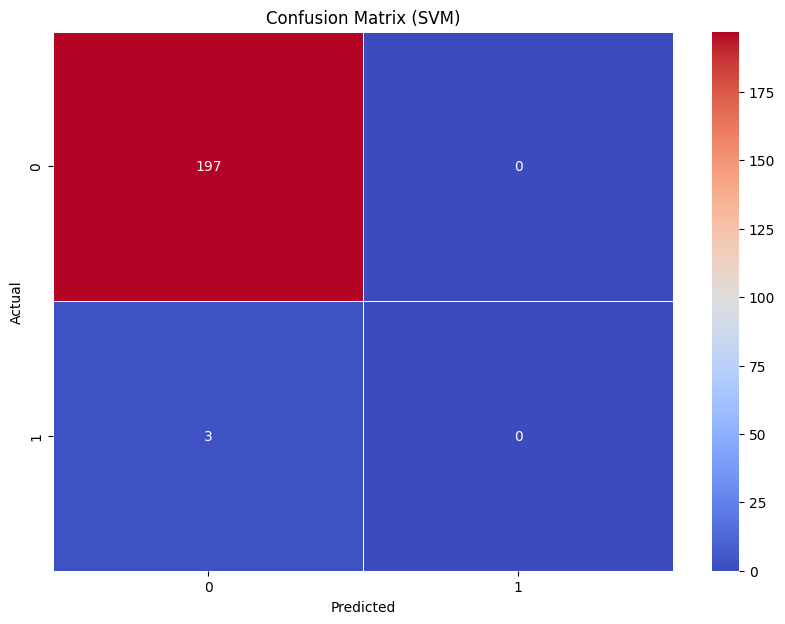

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       198
           1       0.00      0.00      0.00         2

    accuracy                           0.99       200
   macro avg       0.49      0.50      0.50       200
weighted avg       0.98      0.99      0.99       200

Confusion Matrix:
[[198   0]
 [  2   0]]


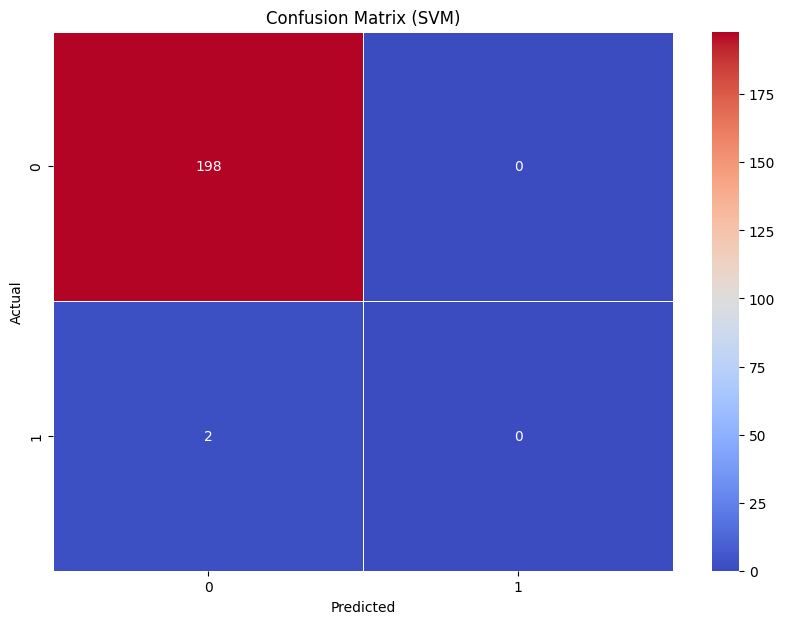

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       198
           1       0.00      0.00      0.00         2

    accuracy                           0.99       200
   macro avg       0.49      0.50      0.50       200
weighted avg       0.98      0.99      0.99       200

Confusion Matrix:
[[198   0]
 [  2   0]]


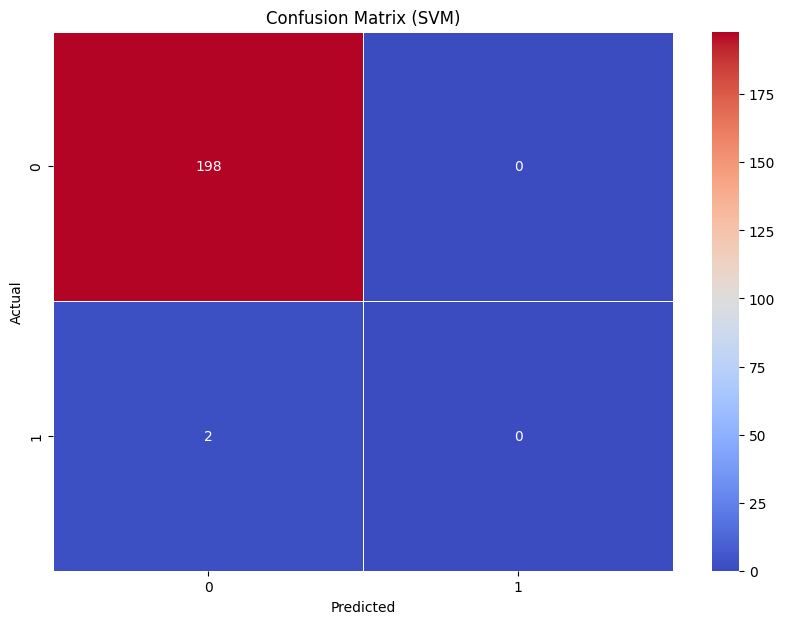

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       199
           1       0.00      0.00      0.00         1

    accuracy                           0.99       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.99      0.99      0.99       200

Confusion Matrix:
[[199   0]
 [  1   0]]


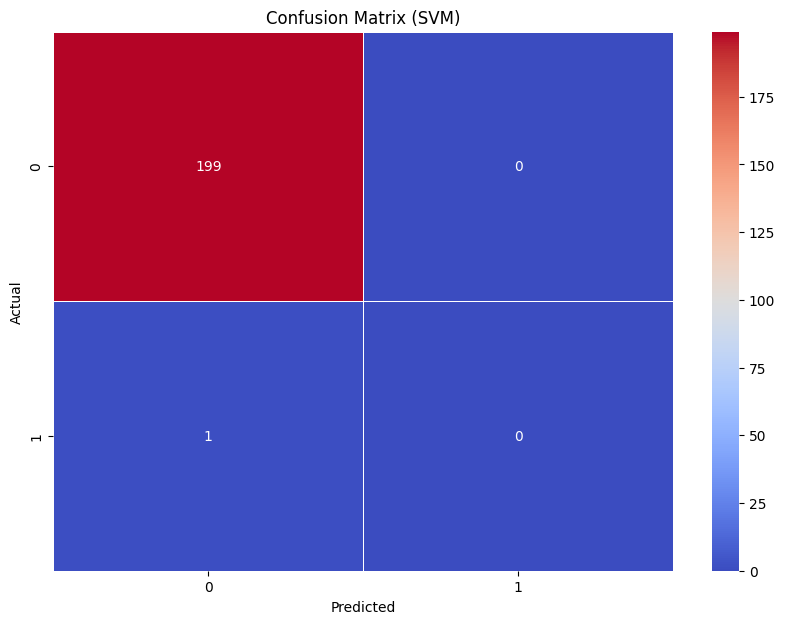

ValueError: The number of classes has to be greater than one; got 1 class

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def preprocess_data(chunk):
    # Drop unnecessary columns
    chunk.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)
    
    # Encode categorical variable 'type' using one-hot encoding
    enc = OneHotEncoder()
    type_encoded = enc.fit_transform(chunk[['type']])
    
    # Extracting feature names for the one-hot encoded column
    feature_names = enc.get_feature_names_out(['type'])
    
    # Convert encoded result to DataFrame and concatenate with original chunk
    type_encoded_df = pd.DataFrame(type_encoded.toarray(), columns=feature_names)
    chunk_processed = pd.concat([chunk.reset_index(drop=True), type_encoded_df], axis=1)
    
    # Drop the original 'type' column
    chunk_processed.drop(['type'], axis=1, inplace=True)
    
    return chunk_processed

def process_chunks(file_path, chunk_size):
    svm_model = SVC(kernel='linear', random_state=42)  # SVM with linear kernel
    
    scaler = StandardScaler()
    
    for chunk in pd.read_csv(file_path, chunksize=chunk_size):
        chunk_processed = preprocess_data(chunk)
        
        X = chunk_processed.drop('isFraud', axis=1)
        y = chunk_processed['isFraud']
        
        # Scale the features
        X_scaled = scaler.fit_transform(X)
        
        # Split into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
        
        # Train the SVM model
        svm_model.fit(X_train, y_train)
        
        # Evaluate the model
        y_pred = svm_model.predict(X_test)
        print(classification_report(y_test, y_pred))
        
        # Print confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        print("Confusion Matrix:")
        print(cm)
        
        # Plot confusion matrix as heatmap with custom colors
        plt.figure(figsize=(10,7))
        sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', linewidths=0.5)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix (SVM)')
        plt.show()

# Example usage
file_path = 'Synthetic_Financial_datasets_log.csv'  # Replace with your actual file path
chunk_size = 1000  # Reduced chunk size for faster initial testing
process_chunks(file_path, chunk_size)


C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1981
           1       0.00      0.00      0.00        19

    accuracy                           0.99      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.98      0.99      0.99      2000

Confusion Matrix:
[[1981    0]
 [  19    0]]


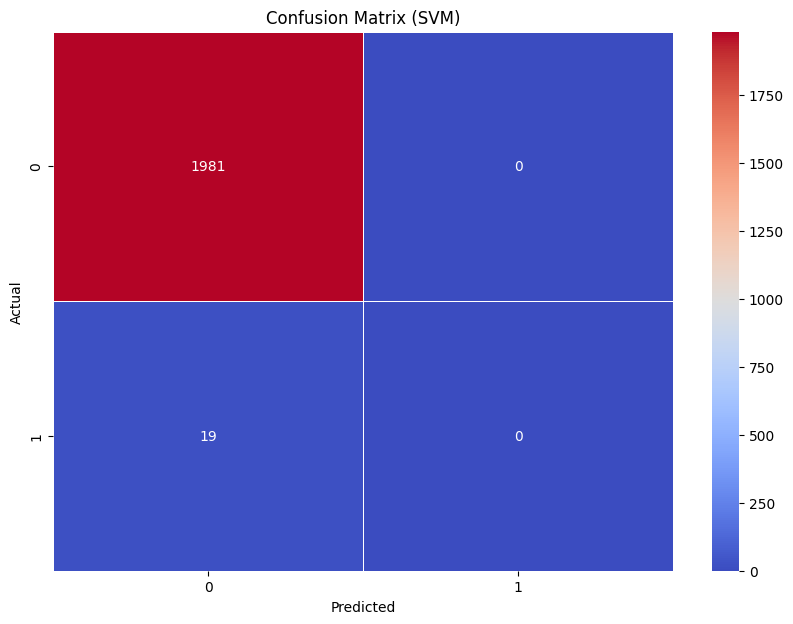

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1998
           1       0.00      0.00      0.00         2

    accuracy                           1.00      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix:
[[1998    0]
 [   2    0]]


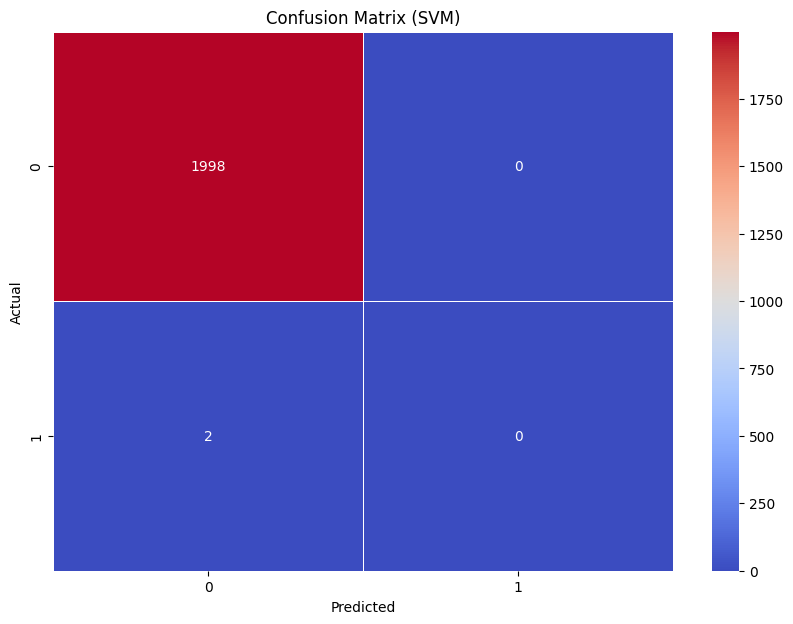

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2000

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix:
[[2000]]


C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


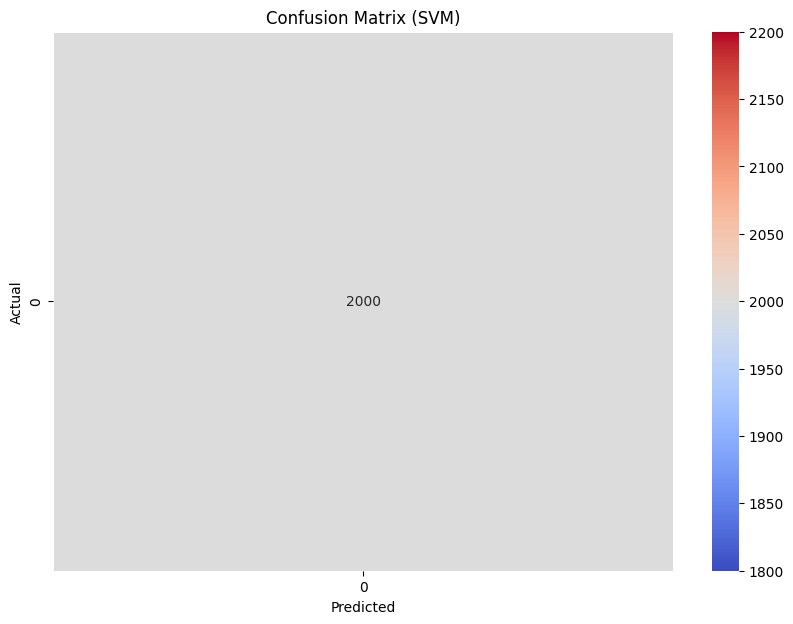

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1997
           1       0.00      0.00      0.00         3

    accuracy                           1.00      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix:
[[1997    0]
 [   3    0]]


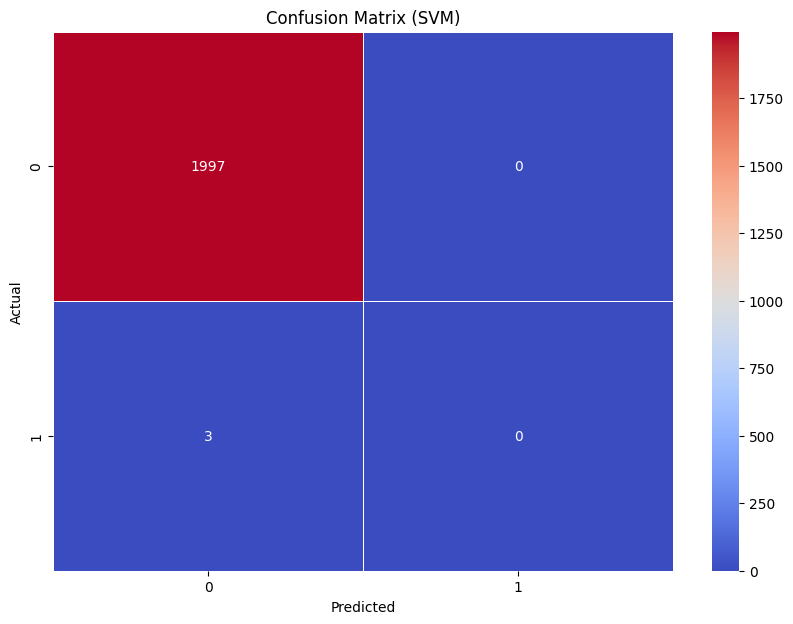

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1999
           1       0.00      0.00      0.00         1

    accuracy                           1.00      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix:
[[1999    0]
 [   1    0]]


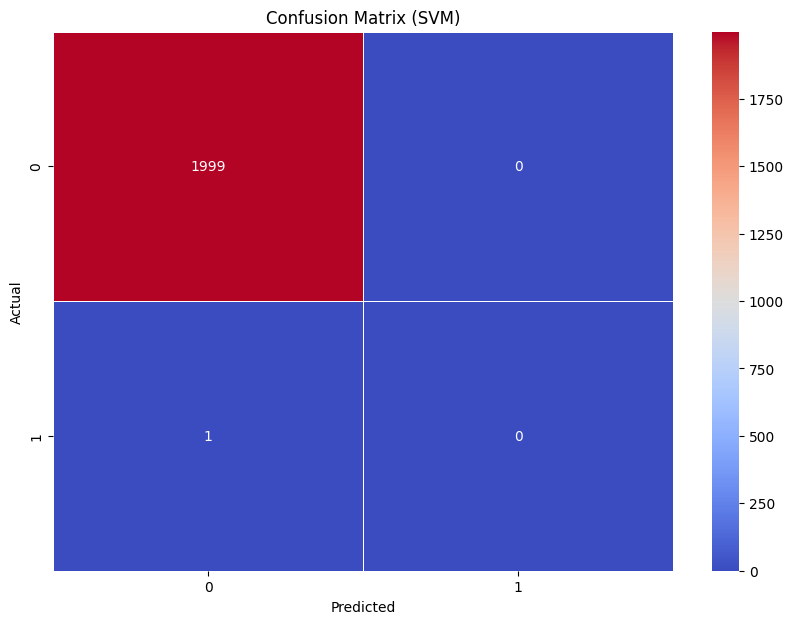

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1999
           1       0.00      0.00      0.00         1

    accuracy                           1.00      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix:
[[1999    0]
 [   1    0]]


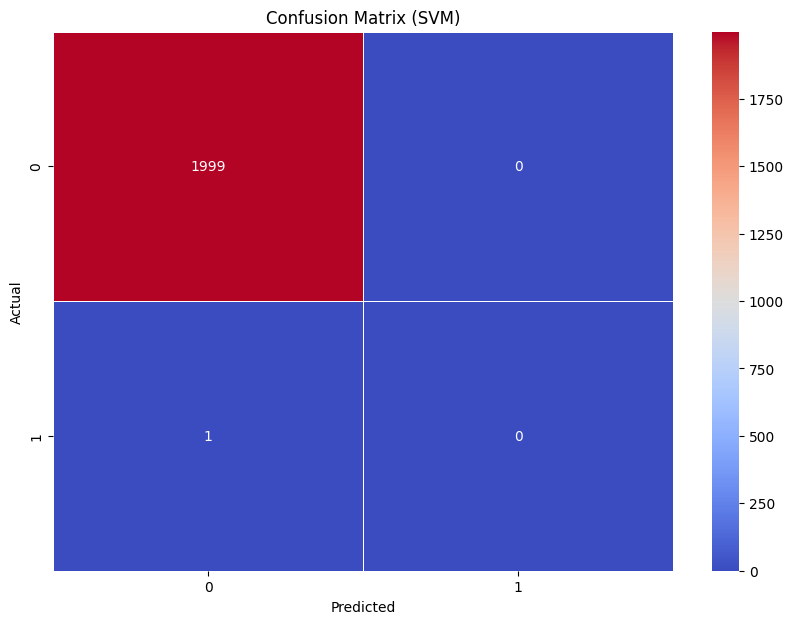

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1999
           1       0.00      0.00      0.00         1

    accuracy                           1.00      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix:
[[1999    0]
 [   1    0]]


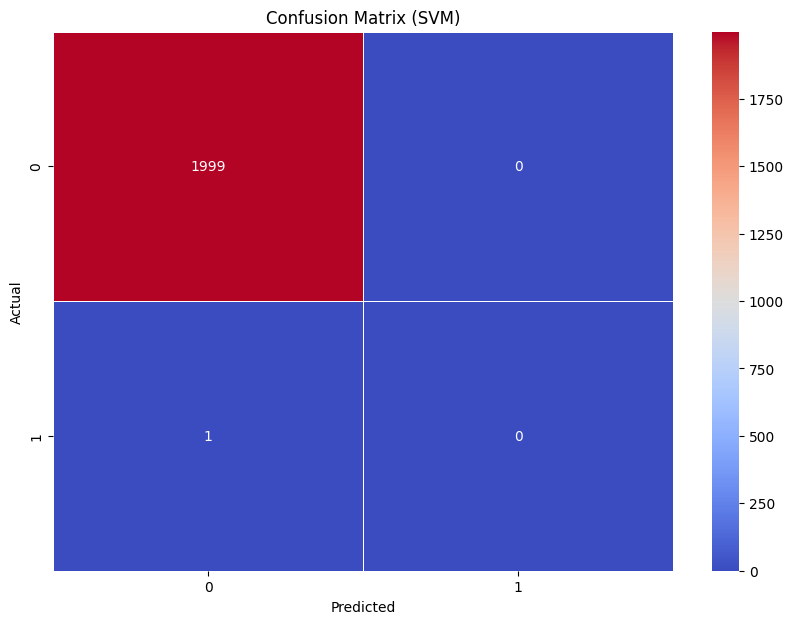

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1999
           1       0.00      0.00      0.00         1

    accuracy                           1.00      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix:
[[1999    0]
 [   1    0]]


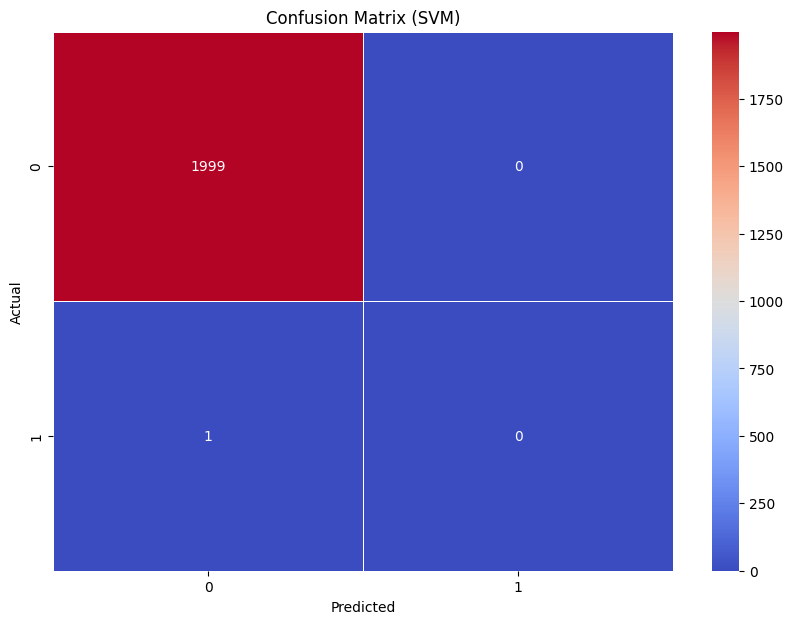

ValueError: The number of classes has to be greater than one; got 1 class

In [2]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def preprocess_data(chunk):
    # Drop unnecessary columns
    chunk.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)
    
    # Encode categorical variable 'type' using one-hot encoding
    enc = OneHotEncoder()
    type_encoded = enc.fit_transform(chunk[['type']])
    
    # Extracting feature names for the one-hot encoded column
    feature_names = enc.get_feature_names_out(['type'])
    
    # Convert encoded result to DataFrame and concatenate with original chunk
    type_encoded_df = pd.DataFrame(type_encoded.toarray(), columns=feature_names)
    chunk_processed = pd.concat([chunk.reset_index(drop=True), type_encoded_df], axis=1)
    
    # Drop the original 'type' column
    chunk_processed.drop(['type'], axis=1, inplace=True)
    
    return chunk_processed

def process_chunks(file_path, chunk_size):
    svm_model = SVC(kernel='linear', random_state=42)  # SVM with linear kernel
    
    scaler = StandardScaler()
    
    for chunk in pd.read_csv(file_path, chunksize=chunk_size):
        chunk_processed = preprocess_data(chunk)
        
        X = chunk_processed.drop('isFraud', axis=1)
        y = chunk_processed['isFraud']
        
        # Scale the features
        X_scaled = scaler.fit_transform(X)
        
        # Split into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
        
        # Train the SVM model
        svm_model.fit(X_train, y_train)
        
        # Evaluate the model
        y_pred = svm_model.predict(X_test)
        print(classification_report(y_test, y_pred))
        
        # Print confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        print("Confusion Matrix:")
        print(cm)
        
        # Plot confusion matrix as heatmap with custom colors
        plt.figure(figsize=(10,7))
        sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', linewidths=0.5)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix (SVM)')
        plt.show()

# Example usage
file_path = 'Synthetic_Financial_datasets_log.csv'  # Replace with your actual file path
chunk_size = 10000  # Reduced chunk size for faster initial testing
process_chunks(file_path, chunk_size)


C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19978
           1       0.00      0.00      0.00        22

    accuracy                           1.00     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       1.00      1.00      1.00     20000

Confusion Matrix:
[[19978     0]
 [   22     0]]


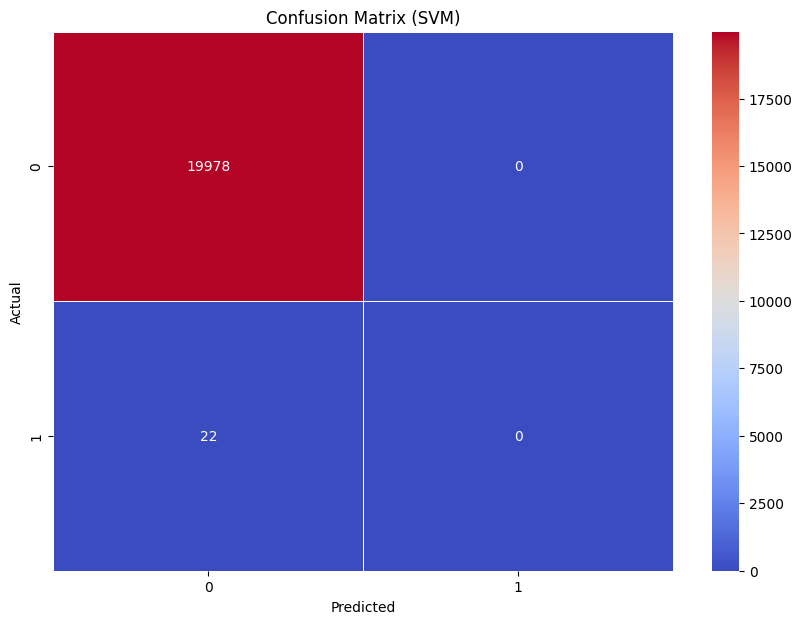

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19991
           1       0.00      0.00      0.00         9

    accuracy                           1.00     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       1.00      1.00      1.00     20000

Confusion Matrix:
[[19991     0]
 [    9     0]]


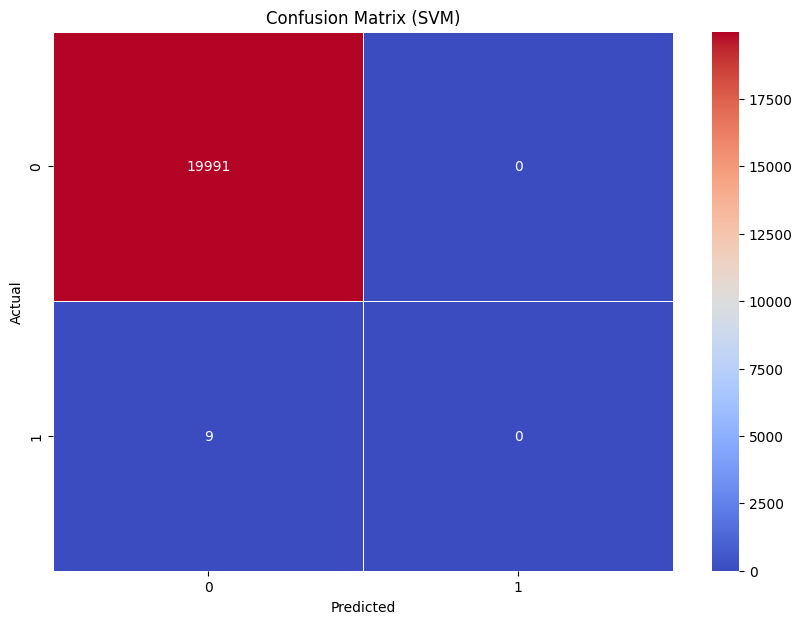

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19990
           1       0.00      0.00      0.00        10

    accuracy                           1.00     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       1.00      1.00      1.00     20000

Confusion Matrix:
[[19990     0]
 [   10     0]]


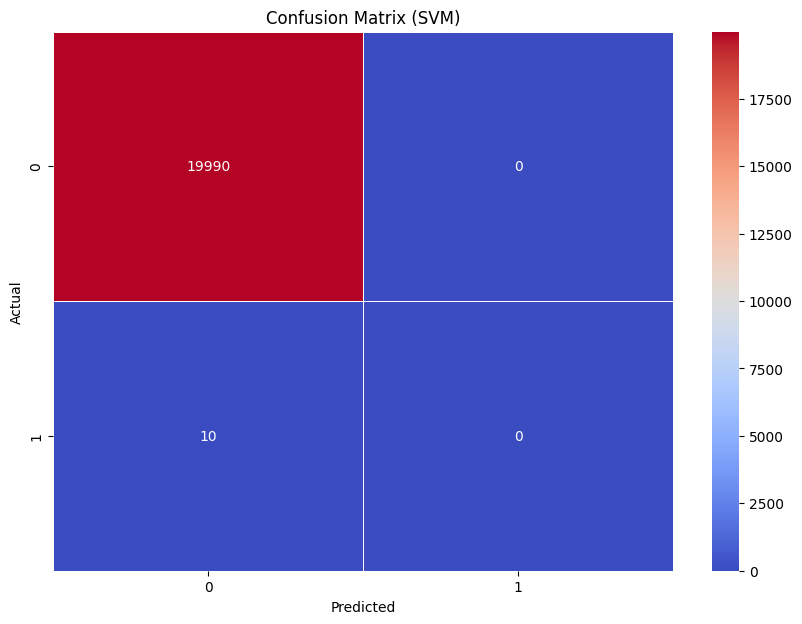

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19995
           1       0.00      0.00      0.00         5

    accuracy                           1.00     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       1.00      1.00      1.00     20000

Confusion Matrix:
[[19995     0]
 [    5     0]]


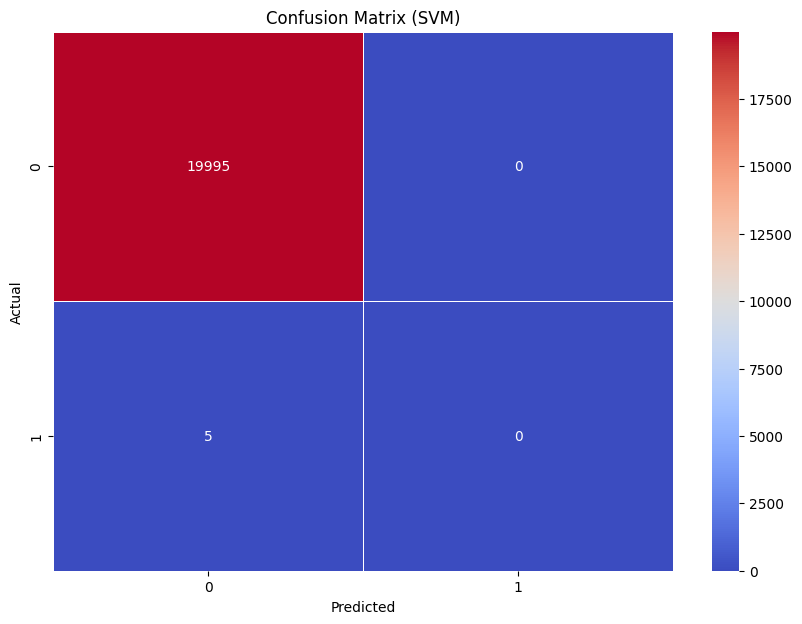

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19994
           1       1.00      0.17      0.29         6

    accuracy                           1.00     20000
   macro avg       1.00      0.58      0.64     20000
weighted avg       1.00      1.00      1.00     20000

Confusion Matrix:
[[19994     0]
 [    5     1]]


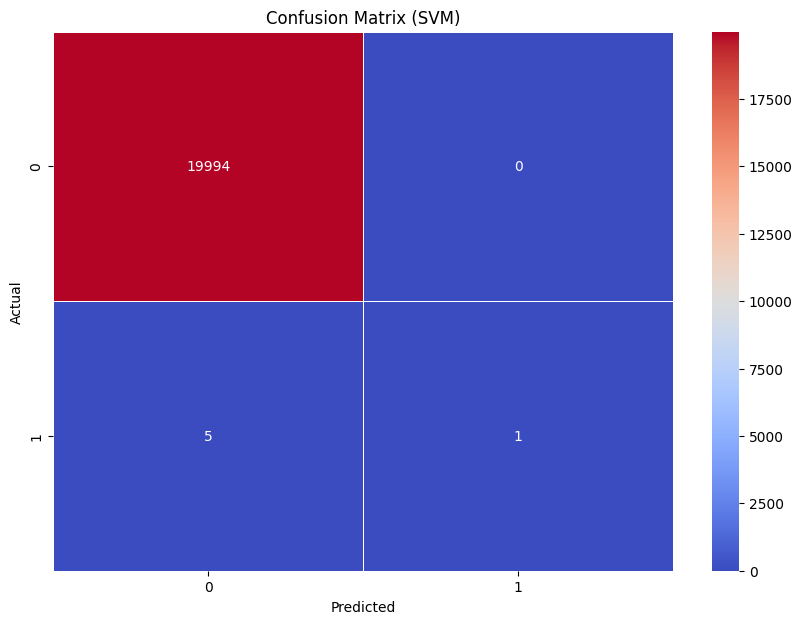

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19971
           1       1.00      0.21      0.34        29

    accuracy                           1.00     20000
   macro avg       1.00      0.60      0.67     20000
weighted avg       1.00      1.00      1.00     20000

Confusion Matrix:
[[19971     0]
 [   23     6]]


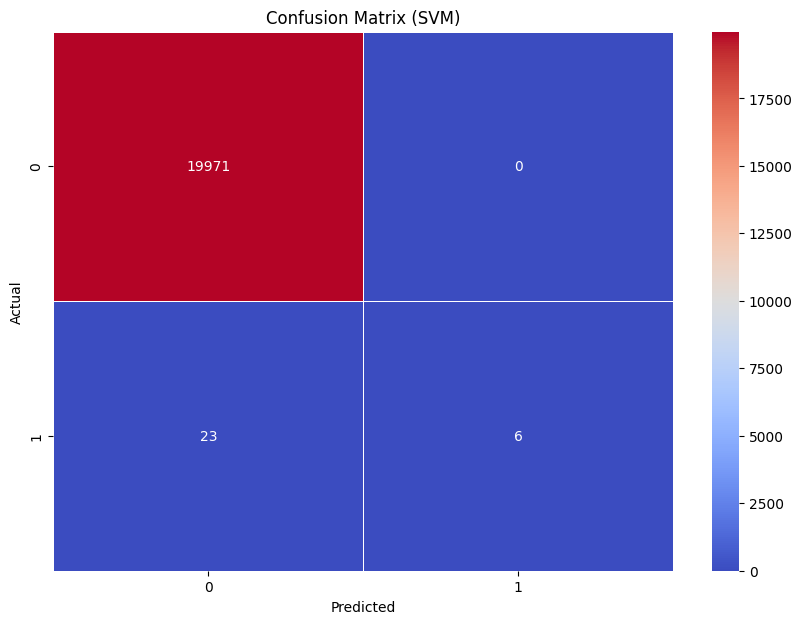

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19992
           1       0.00      0.00      0.00         8

    accuracy                           1.00     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       1.00      1.00      1.00     20000

Confusion Matrix:
[[19992     0]
 [    8     0]]


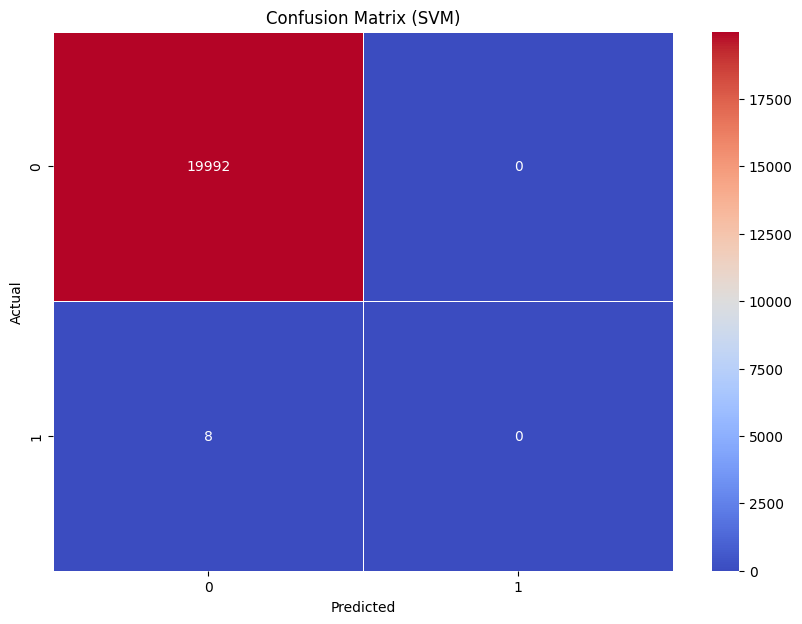

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19991
           1       1.00      0.11      0.20         9

    accuracy                           1.00     20000
   macro avg       1.00      0.56      0.60     20000
weighted avg       1.00      1.00      1.00     20000

Confusion Matrix:
[[19991     0]
 [    8     1]]


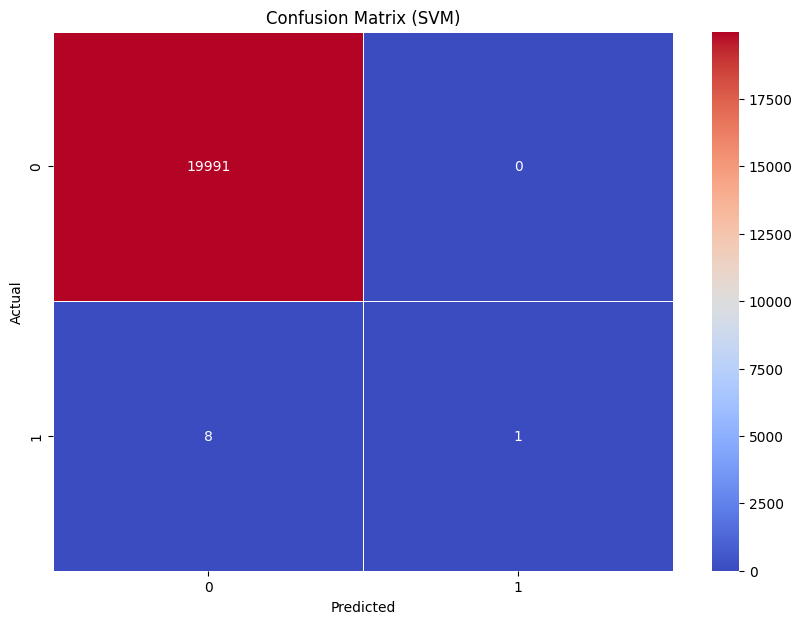

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19992
           1       1.00      0.25      0.40         8

    accuracy                           1.00     20000
   macro avg       1.00      0.62      0.70     20000
weighted avg       1.00      1.00      1.00     20000

Confusion Matrix:
[[19992     0]
 [    6     2]]


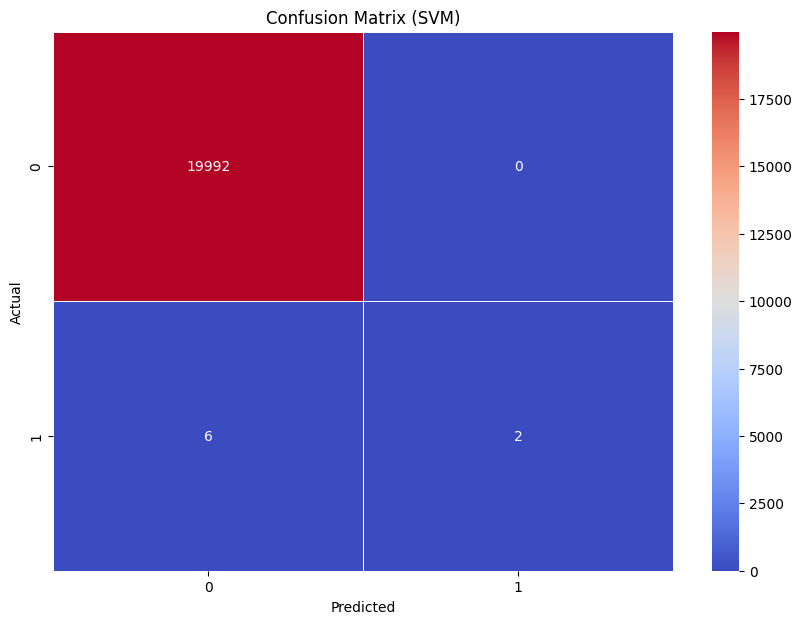

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19992
           1       1.00      0.12      0.22         8

    accuracy                           1.00     20000
   macro avg       1.00      0.56      0.61     20000
weighted avg       1.00      1.00      1.00     20000

Confusion Matrix:
[[19992     0]
 [    7     1]]


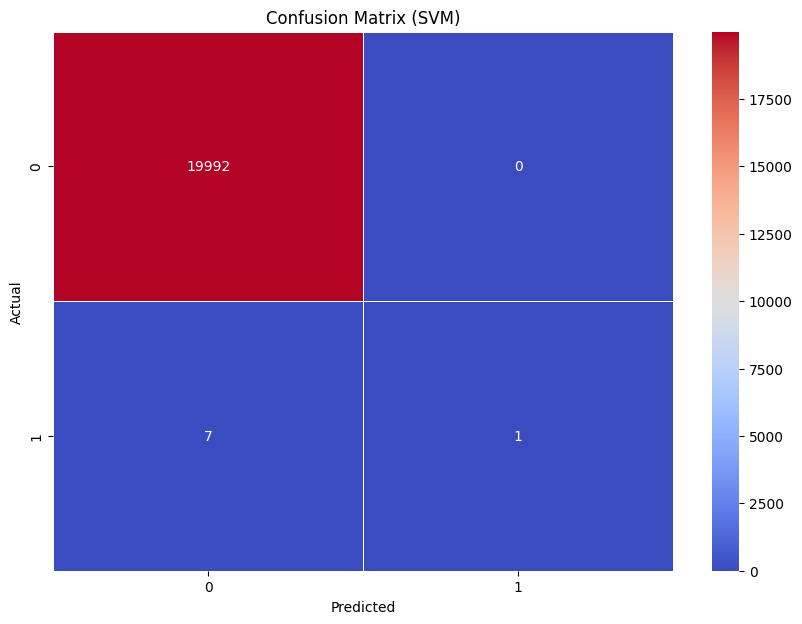

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     19802
           1       0.98      0.44      0.61       198

    accuracy                           0.99     20000
   macro avg       0.99      0.72      0.80     20000
weighted avg       0.99      0.99      0.99     20000

Confusion Matrix:
[[19800     2]
 [  110    88]]


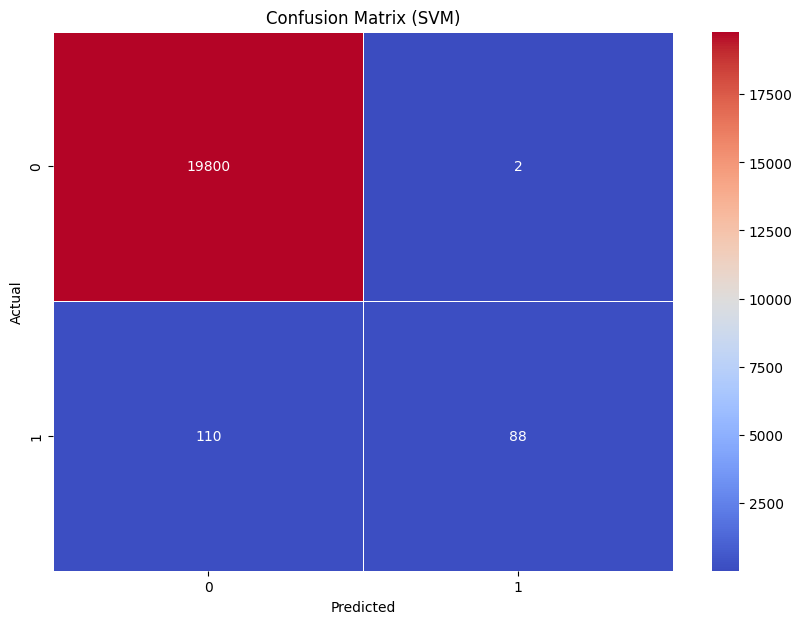

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19994
           1       1.00      0.50      0.67         6

    accuracy                           1.00     20000
   macro avg       1.00      0.75      0.83     20000
weighted avg       1.00      1.00      1.00     20000

Confusion Matrix:
[[19994     0]
 [    3     3]]


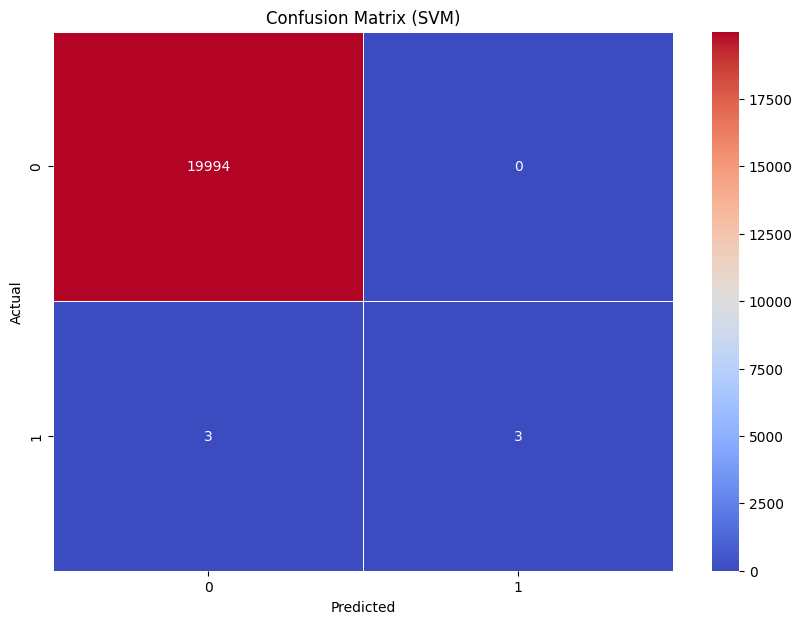

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19994
           1       0.00      0.00      0.00         6

    accuracy                           1.00     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       1.00      1.00      1.00     20000

Confusion Matrix:
[[19994     0]
 [    6     0]]


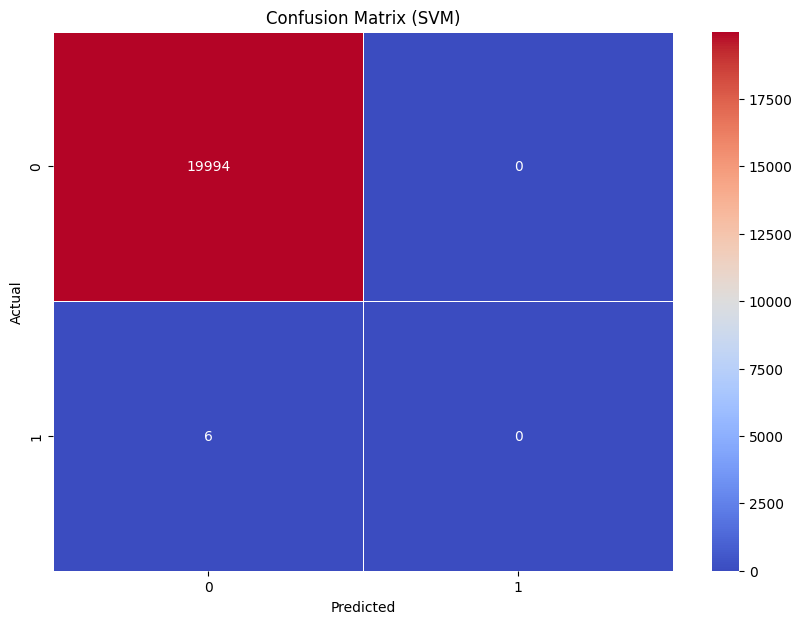

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19993
           1       0.00      0.00      0.00         7

    accuracy                           1.00     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       1.00      1.00      1.00     20000

Confusion Matrix:
[[19993     0]
 [    7     0]]


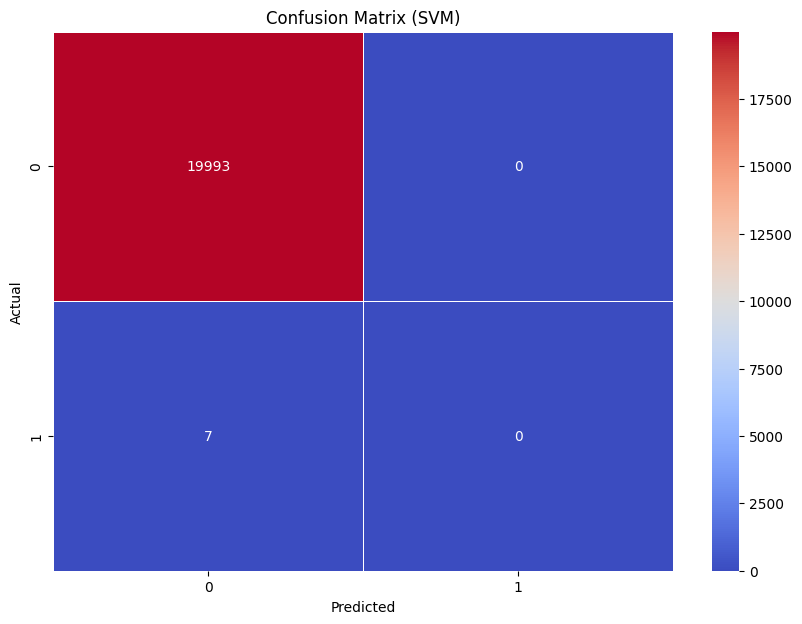

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19993
           1       1.00      0.14      0.25         7

    accuracy                           1.00     20000
   macro avg       1.00      0.57      0.62     20000
weighted avg       1.00      1.00      1.00     20000

Confusion Matrix:
[[19993     0]
 [    6     1]]


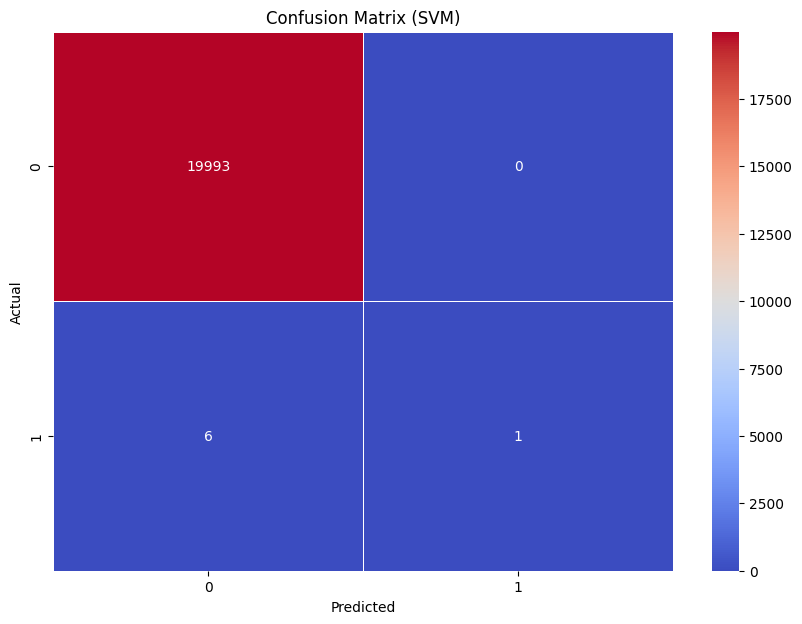

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19979
           1       1.00      0.24      0.38        21

    accuracy                           1.00     20000
   macro avg       1.00      0.62      0.69     20000
weighted avg       1.00      1.00      1.00     20000

Confusion Matrix:
[[19979     0]
 [   16     5]]


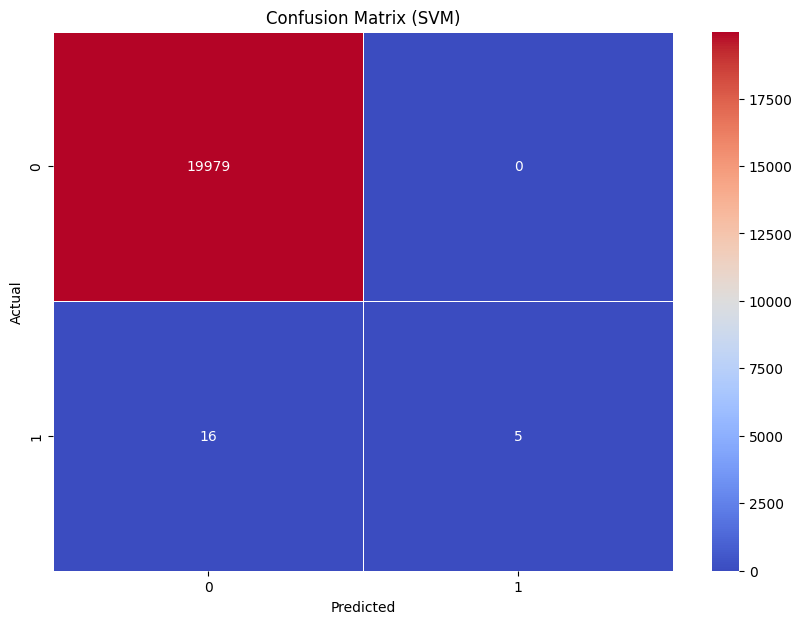

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19989
           1       1.00      0.09      0.17        11

    accuracy                           1.00     20000
   macro avg       1.00      0.55      0.58     20000
weighted avg       1.00      1.00      1.00     20000

Confusion Matrix:
[[19989     0]
 [   10     1]]


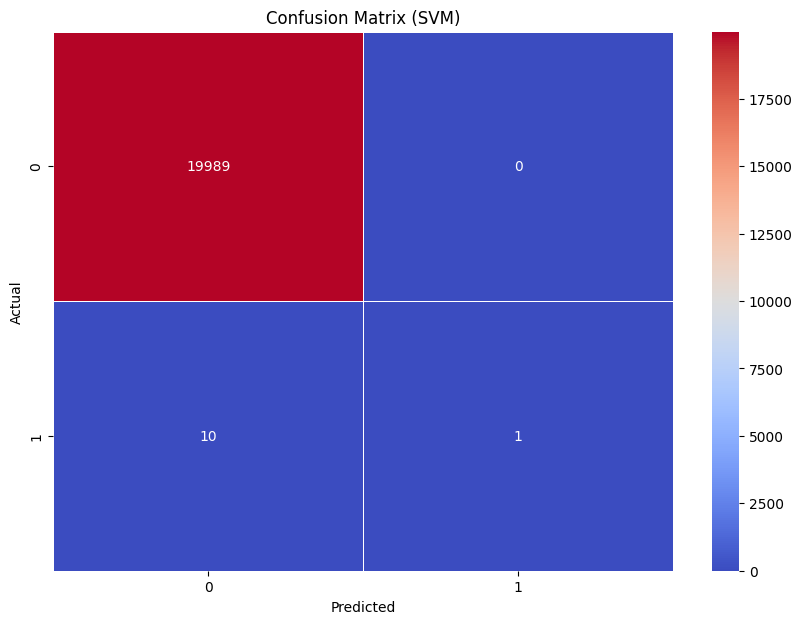

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19990
           1       1.00      0.20      0.33        10

    accuracy                           1.00     20000
   macro avg       1.00      0.60      0.67     20000
weighted avg       1.00      1.00      1.00     20000

Confusion Matrix:
[[19990     0]
 [    8     2]]


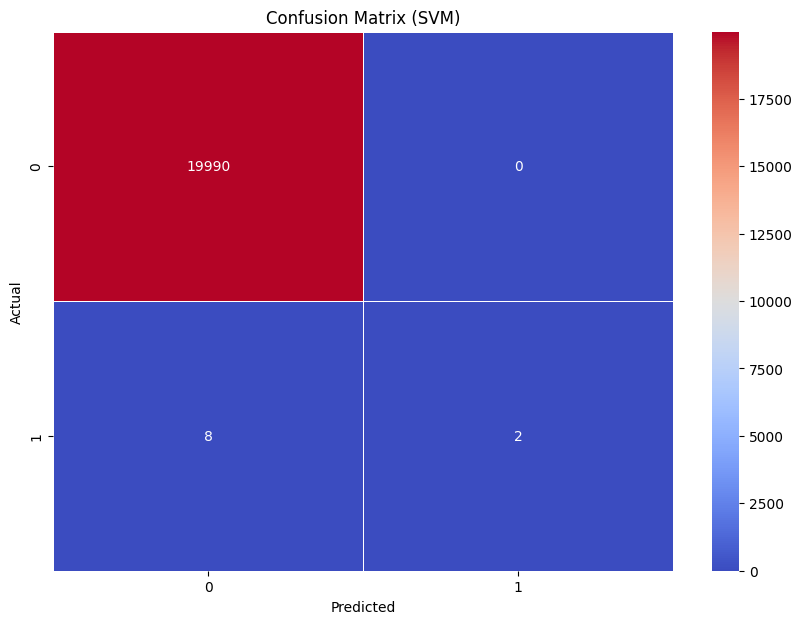

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19995
           1       0.00      0.00      0.00         5

    accuracy                           1.00     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       1.00      1.00      1.00     20000

Confusion Matrix:
[[19995     0]
 [    5     0]]


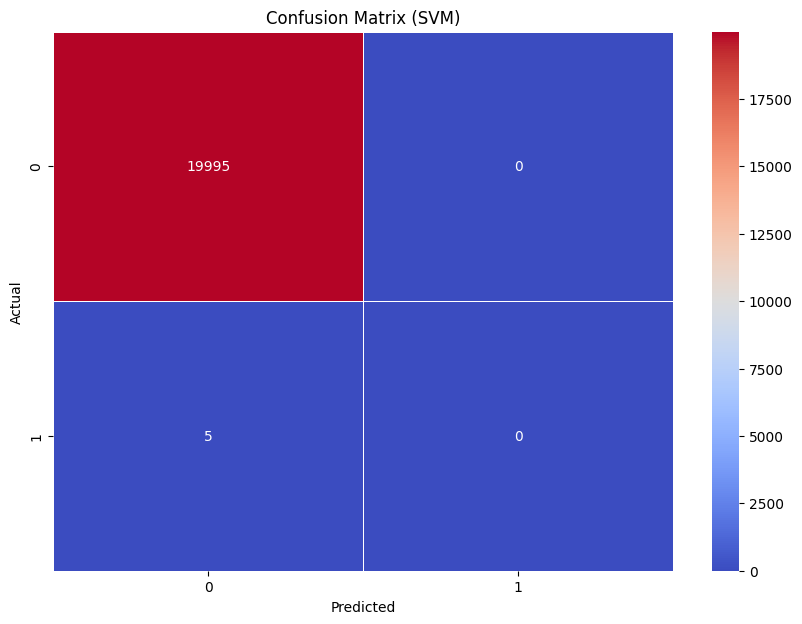

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19968
           1       1.00      0.25      0.40        32

    accuracy                           1.00     20000
   macro avg       1.00      0.62      0.70     20000
weighted avg       1.00      1.00      1.00     20000

Confusion Matrix:
[[19968     0]
 [   24     8]]


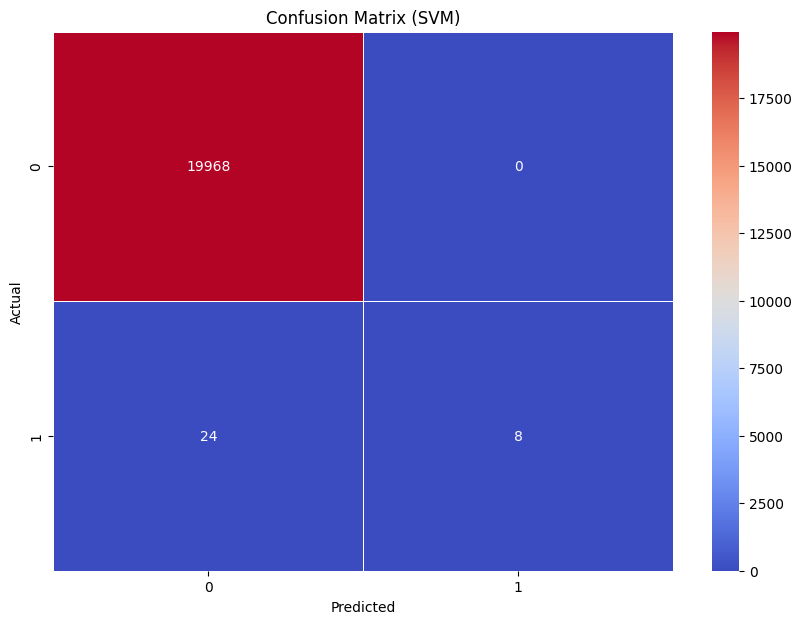

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19993
           1       1.00      0.14      0.25         7

    accuracy                           1.00     20000
   macro avg       1.00      0.57      0.62     20000
weighted avg       1.00      1.00      1.00     20000

Confusion Matrix:
[[19993     0]
 [    6     1]]


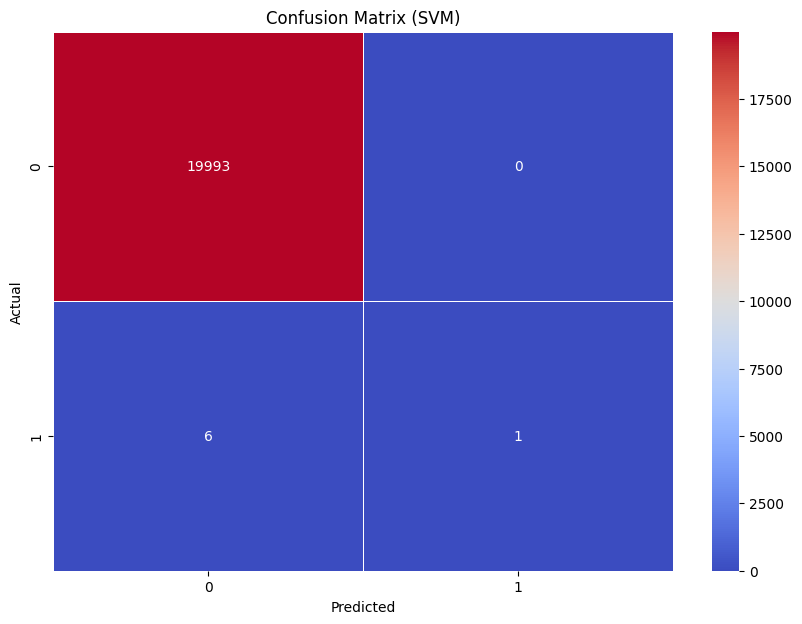

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19997
           1       0.00      0.00      0.00         3

    accuracy                           1.00     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       1.00      1.00      1.00     20000

Confusion Matrix:
[[19997     0]
 [    3     0]]


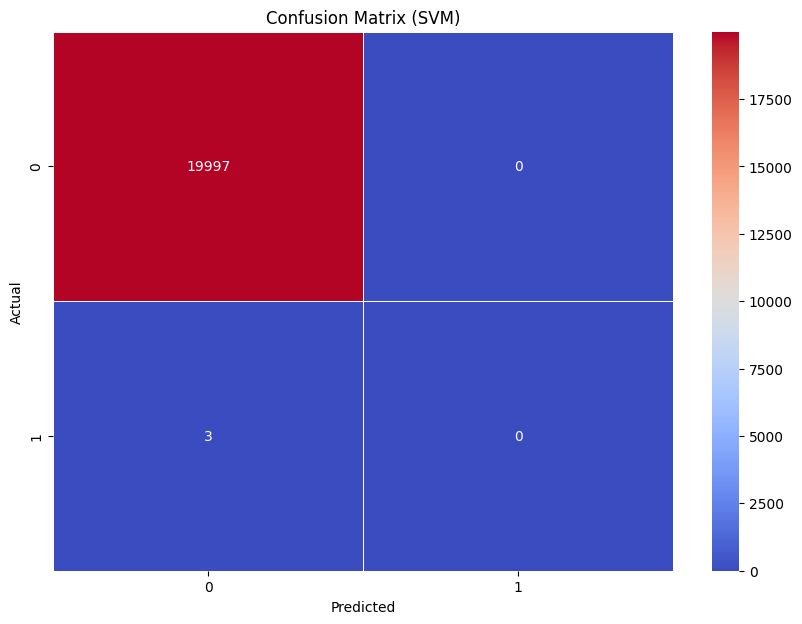

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19991
           1       1.00      0.11      0.20         9

    accuracy                           1.00     20000
   macro avg       1.00      0.56      0.60     20000
weighted avg       1.00      1.00      1.00     20000

Confusion Matrix:
[[19991     0]
 [    8     1]]


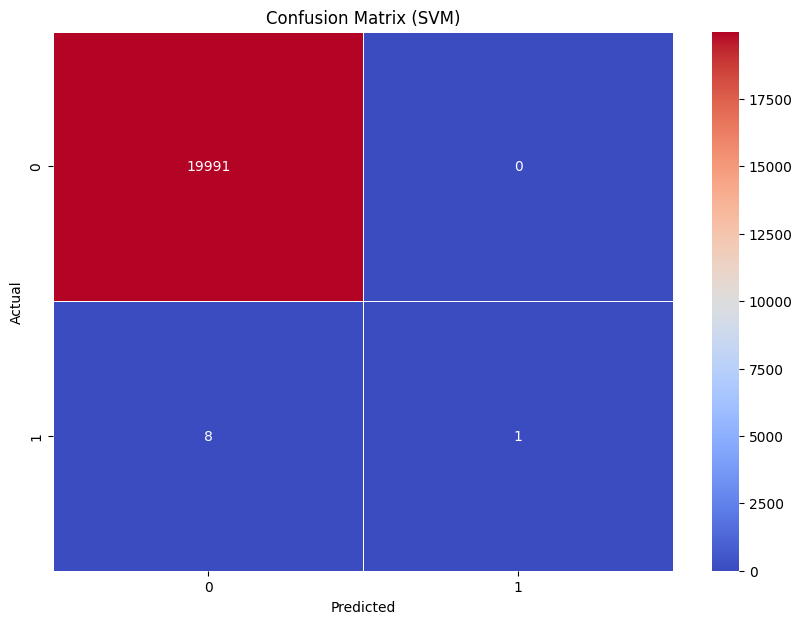

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19975
           1       1.00      0.52      0.68        25

    accuracy                           1.00     20000
   macro avg       1.00      0.76      0.84     20000
weighted avg       1.00      1.00      1.00     20000

Confusion Matrix:
[[19975     0]
 [   12    13]]


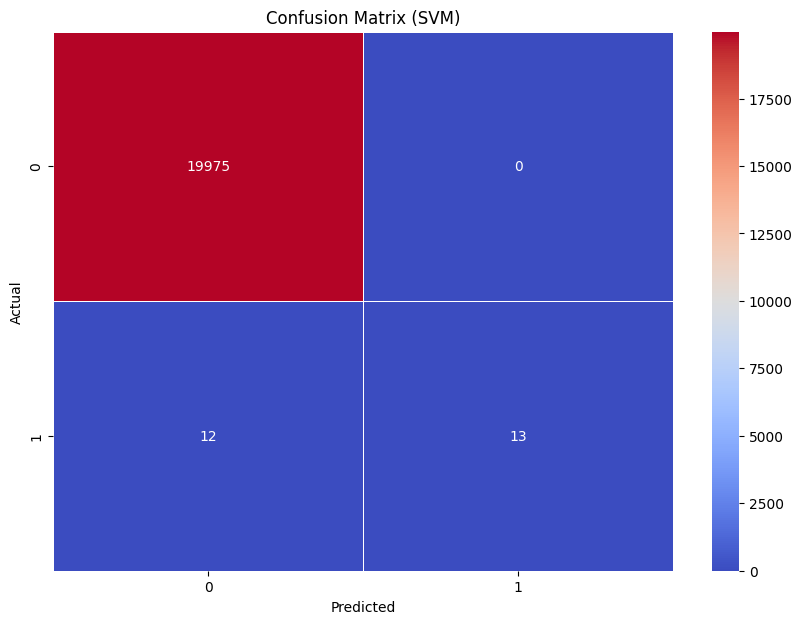

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19997
           1       0.00      0.00      0.00         3

    accuracy                           1.00     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       1.00      1.00      1.00     20000

Confusion Matrix:
[[19997     0]
 [    3     0]]


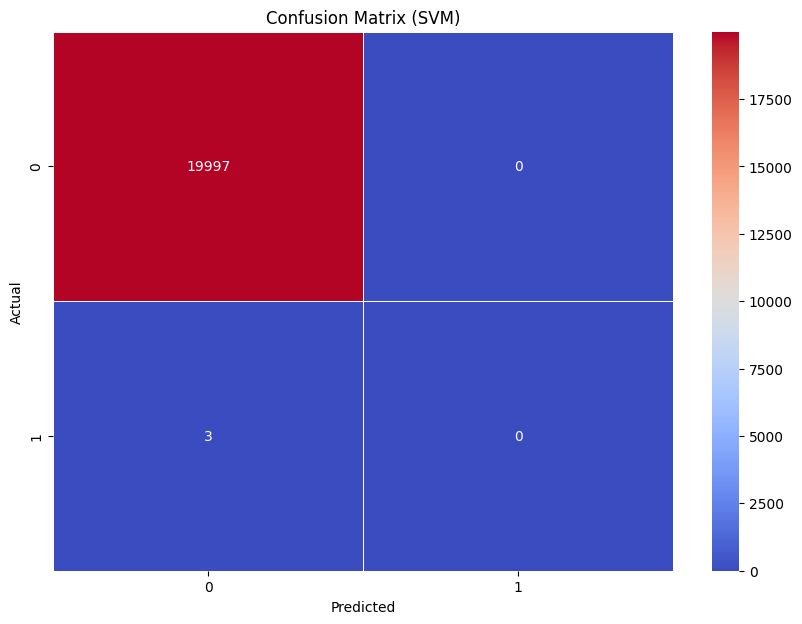

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19995
           1       0.00      0.00      0.00         5

    accuracy                           1.00     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       1.00      1.00      1.00     20000

Confusion Matrix:
[[19995     0]
 [    5     0]]


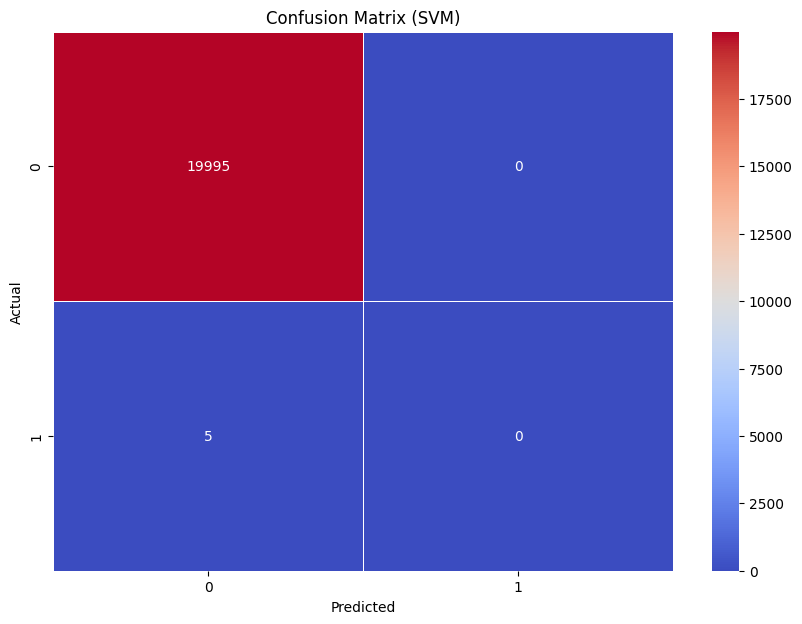

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19992
           1       1.00      0.38      0.55         8

    accuracy                           1.00     20000
   macro avg       1.00      0.69      0.77     20000
weighted avg       1.00      1.00      1.00     20000

Confusion Matrix:
[[19992     0]
 [    5     3]]


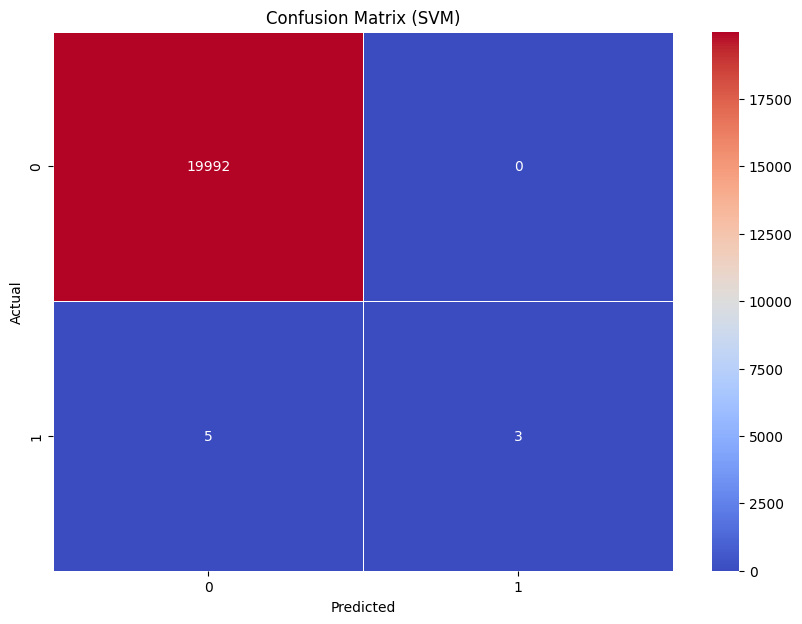

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19978
           1       1.00      0.36      0.53        22

    accuracy                           1.00     20000
   macro avg       1.00      0.68      0.77     20000
weighted avg       1.00      1.00      1.00     20000

Confusion Matrix:
[[19978     0]
 [   14     8]]


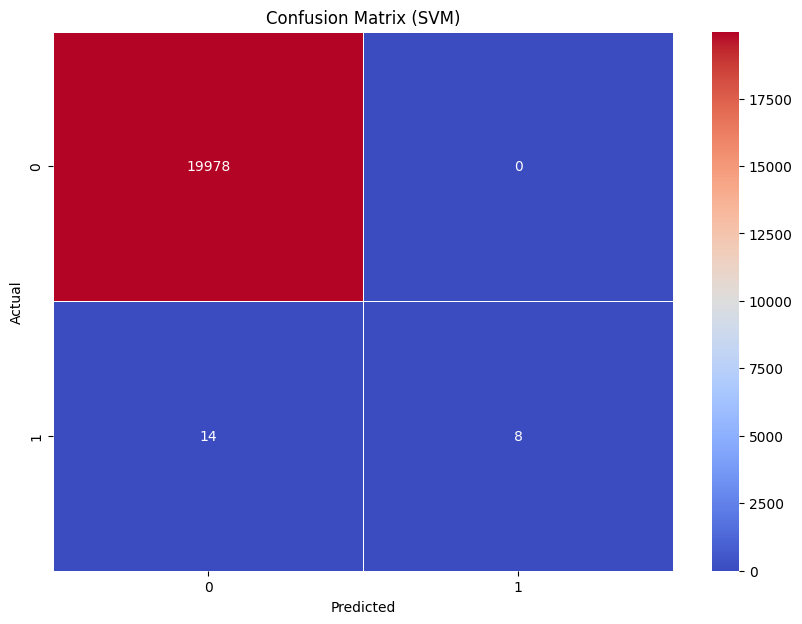

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19978
           1       1.00      0.23      0.37        22

    accuracy                           1.00     20000
   macro avg       1.00      0.61      0.68     20000
weighted avg       1.00      1.00      1.00     20000

Confusion Matrix:
[[19978     0]
 [   17     5]]


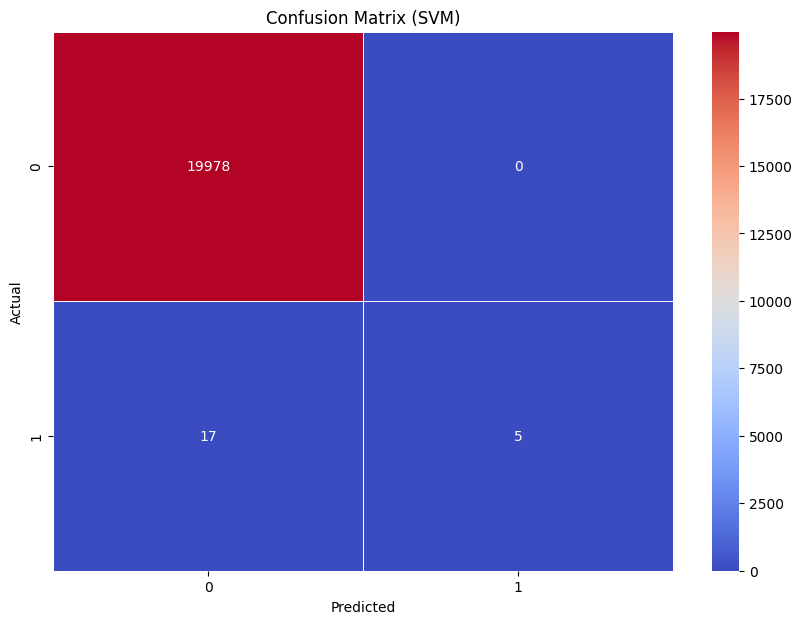

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19992
           1       1.00      0.38      0.55         8

    accuracy                           1.00     20000
   macro avg       1.00      0.69      0.77     20000
weighted avg       1.00      1.00      1.00     20000

Confusion Matrix:
[[19992     0]
 [    5     3]]


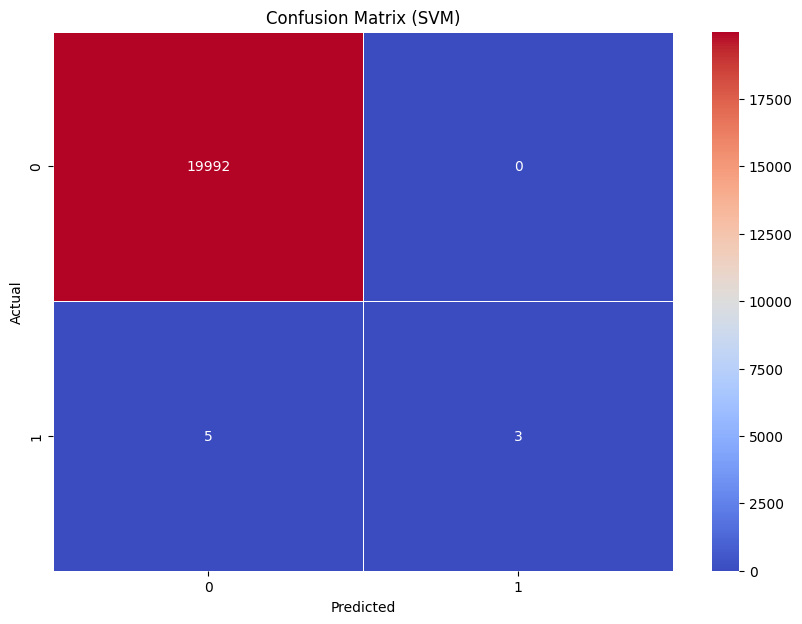

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19994
           1       0.00      0.00      0.00         6

    accuracy                           1.00     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       1.00      1.00      1.00     20000

Confusion Matrix:
[[19994     0]
 [    6     0]]


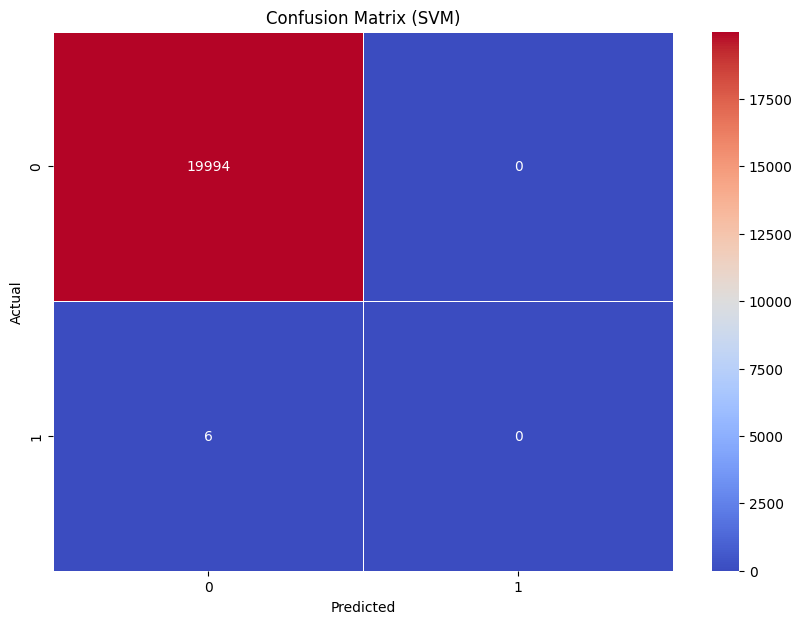

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19971
           1       1.00      0.41      0.59        29

    accuracy                           1.00     20000
   macro avg       1.00      0.71      0.79     20000
weighted avg       1.00      1.00      1.00     20000

Confusion Matrix:
[[19971     0]
 [   17    12]]


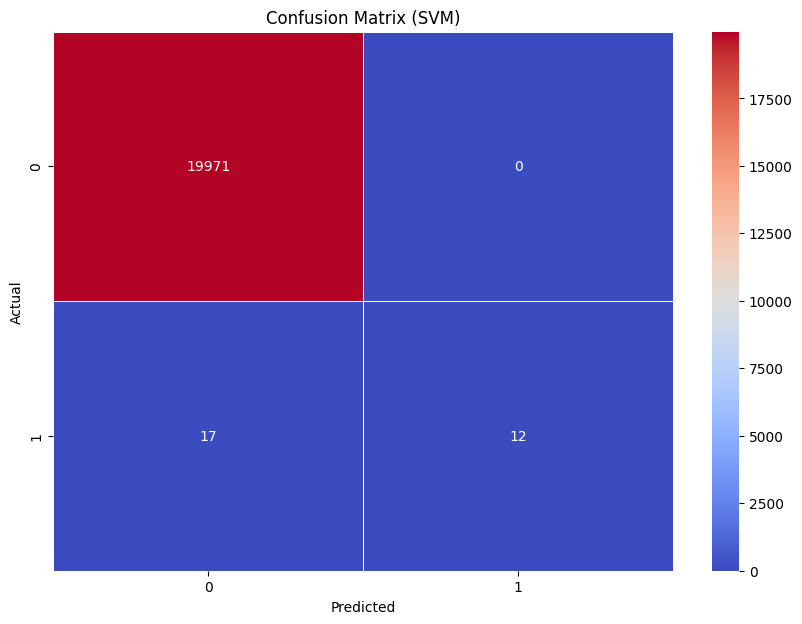

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19987
           1       1.00      0.23      0.38        13

    accuracy                           1.00     20000
   macro avg       1.00      0.62      0.69     20000
weighted avg       1.00      1.00      1.00     20000

Confusion Matrix:
[[19987     0]
 [   10     3]]


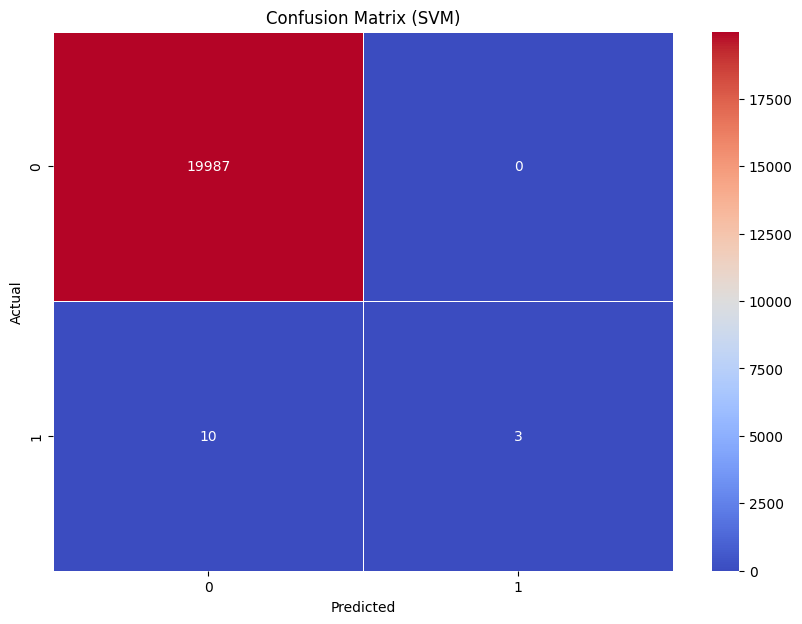

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19994
           1       0.00      0.00      0.00         6

    accuracy                           1.00     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       1.00      1.00      1.00     20000

Confusion Matrix:
[[19994     0]
 [    6     0]]


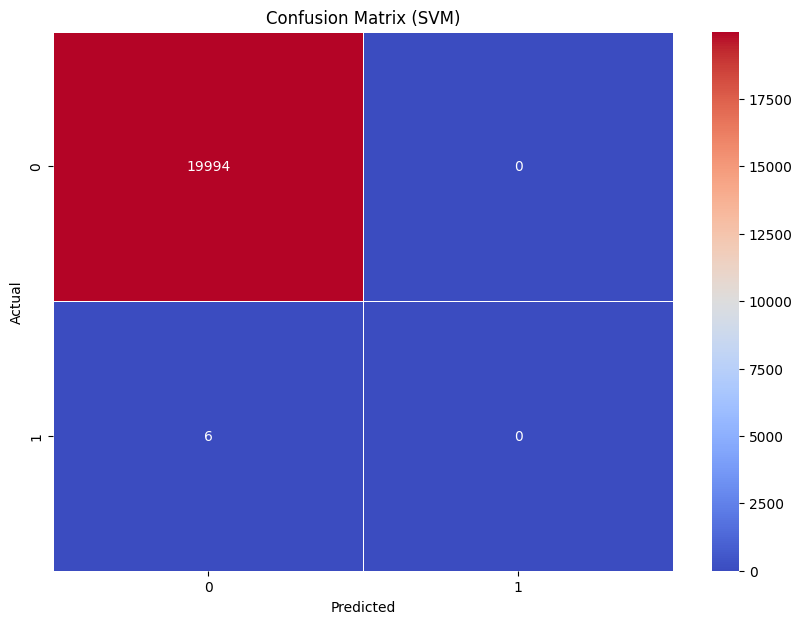

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19995
           1       1.00      0.40      0.57         5

    accuracy                           1.00     20000
   macro avg       1.00      0.70      0.79     20000
weighted avg       1.00      1.00      1.00     20000

Confusion Matrix:
[[19995     0]
 [    3     2]]


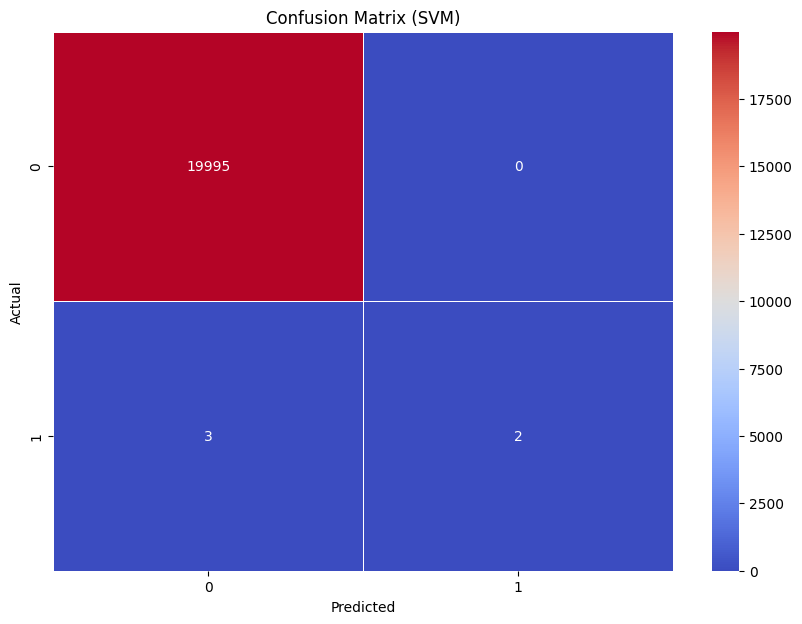

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19993
           1       0.00      0.00      0.00         7

    accuracy                           1.00     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       1.00      1.00      1.00     20000

Confusion Matrix:
[[19993     0]
 [    7     0]]


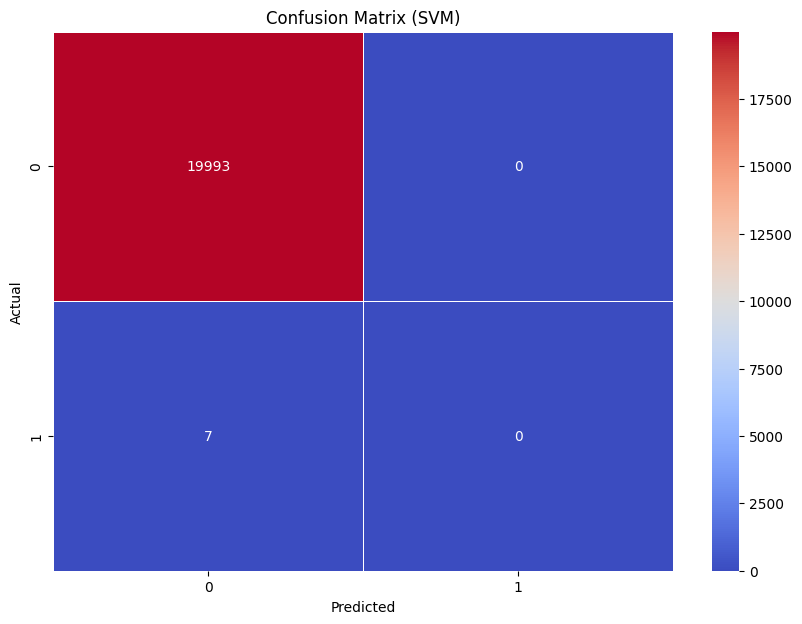

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19966
           1       0.91      0.29      0.44        34

    accuracy                           1.00     20000
   macro avg       0.95      0.65      0.72     20000
weighted avg       1.00      1.00      1.00     20000

Confusion Matrix:
[[19965     1]
 [   24    10]]


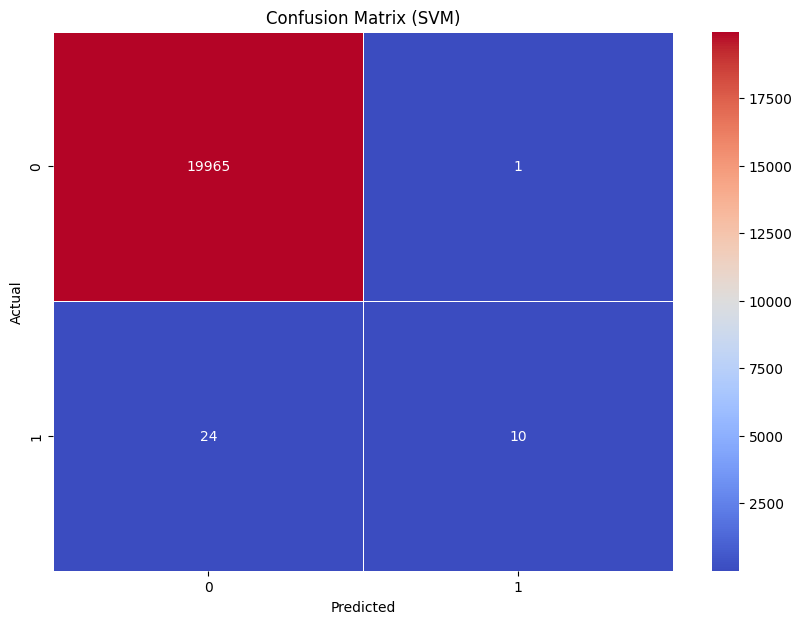

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19993
           1       1.00      0.29      0.44         7

    accuracy                           1.00     20000
   macro avg       1.00      0.64      0.72     20000
weighted avg       1.00      1.00      1.00     20000

Confusion Matrix:
[[19993     0]
 [    5     2]]


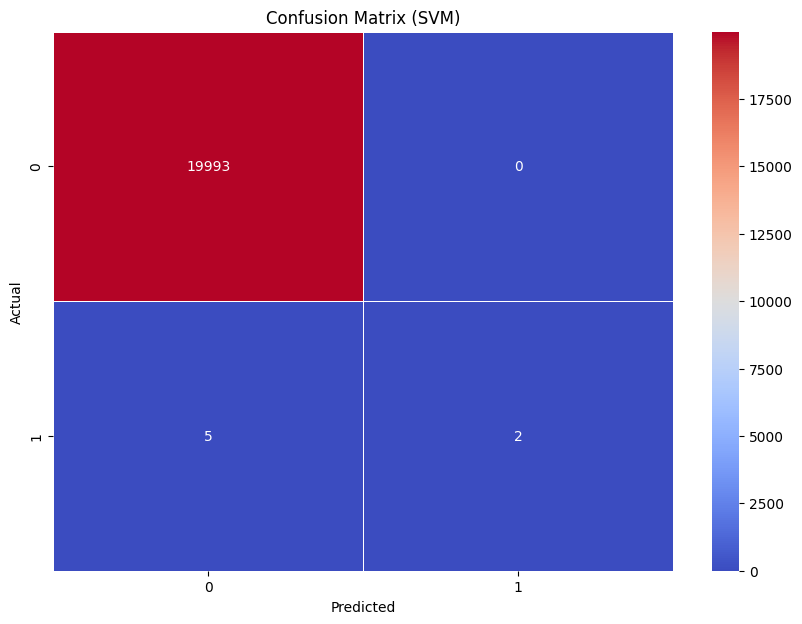

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19995
           1       1.00      0.60      0.75         5

    accuracy                           1.00     20000
   macro avg       1.00      0.80      0.87     20000
weighted avg       1.00      1.00      1.00     20000

Confusion Matrix:
[[19995     0]
 [    2     3]]


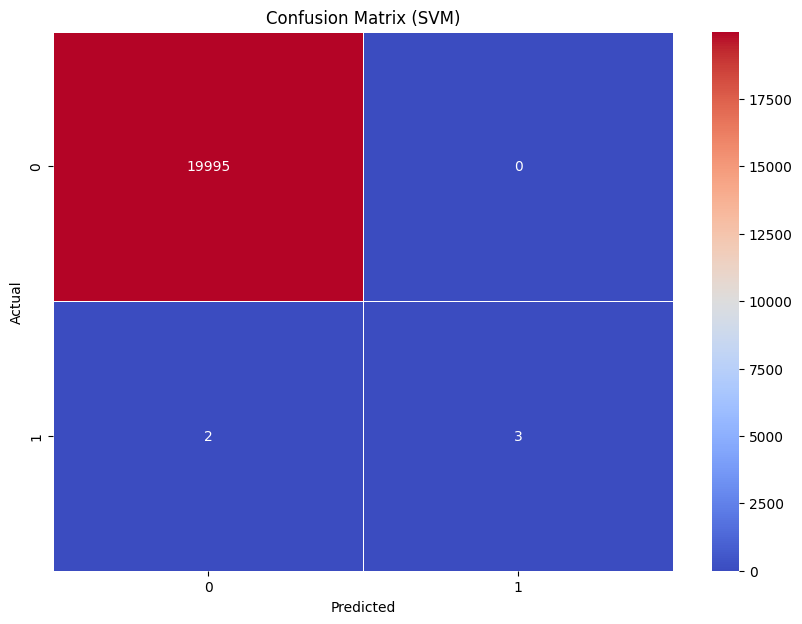

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19970
           1       1.00      0.33      0.50        30

    accuracy                           1.00     20000
   macro avg       1.00      0.67      0.75     20000
weighted avg       1.00      1.00      1.00     20000

Confusion Matrix:
[[19970     0]
 [   20    10]]


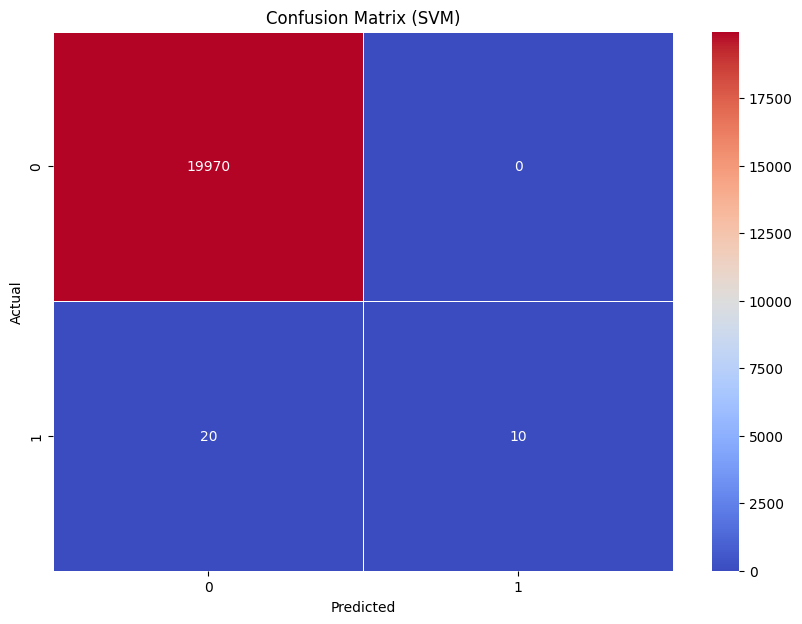

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19992
           1       0.00      0.00      0.00         8

    accuracy                           1.00     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       1.00      1.00      1.00     20000

Confusion Matrix:
[[19992     0]
 [    8     0]]


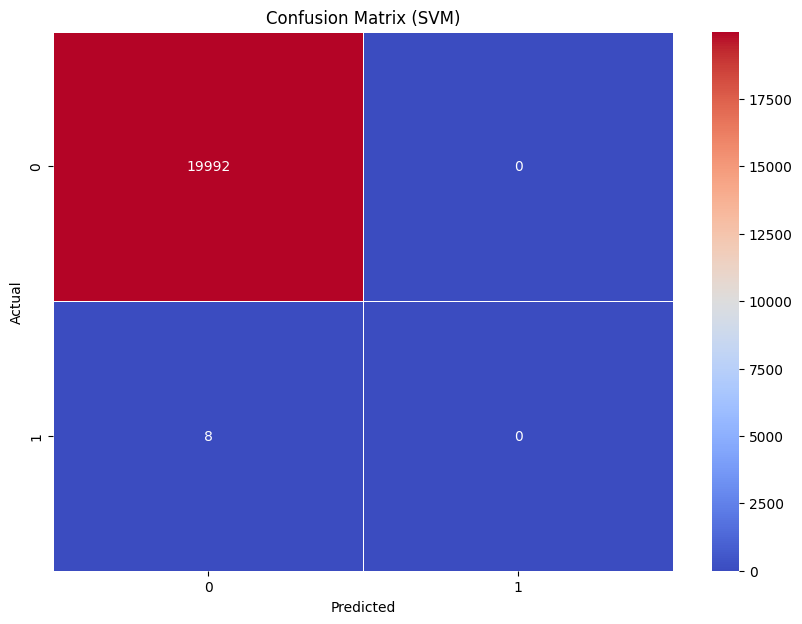

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19995
           1       1.00      0.20      0.33         5

    accuracy                           1.00     20000
   macro avg       1.00      0.60      0.67     20000
weighted avg       1.00      1.00      1.00     20000

Confusion Matrix:
[[19995     0]
 [    4     1]]


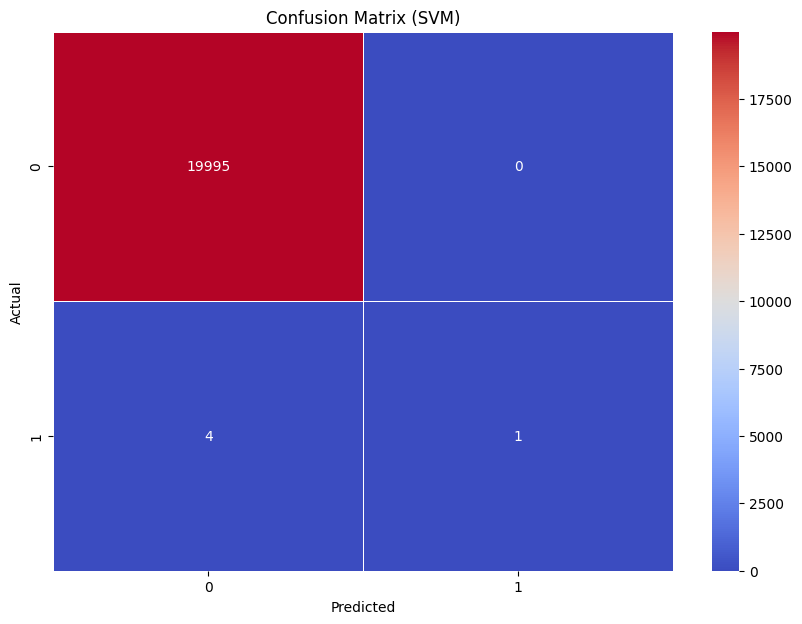

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19988
           1       1.00      0.25      0.40        12

    accuracy                           1.00     20000
   macro avg       1.00      0.62      0.70     20000
weighted avg       1.00      1.00      1.00     20000

Confusion Matrix:
[[19988     0]
 [    9     3]]


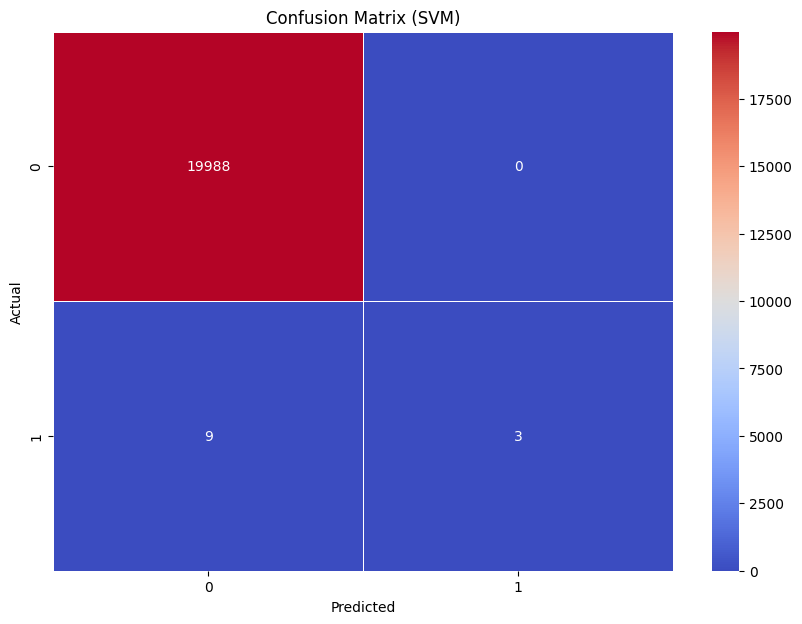

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19972
           1       1.00      0.29      0.44        28

    accuracy                           1.00     20000
   macro avg       1.00      0.64      0.72     20000
weighted avg       1.00      1.00      1.00     20000

Confusion Matrix:
[[19972     0]
 [   20     8]]


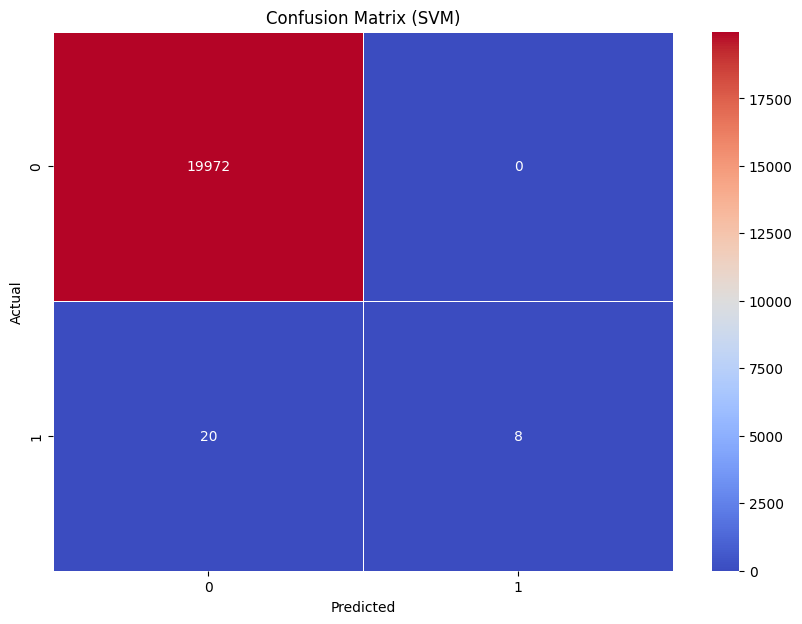

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19988
           1       0.00      0.00      0.00        12

    accuracy                           1.00     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       1.00      1.00      1.00     20000

Confusion Matrix:
[[19988     0]
 [   12     0]]


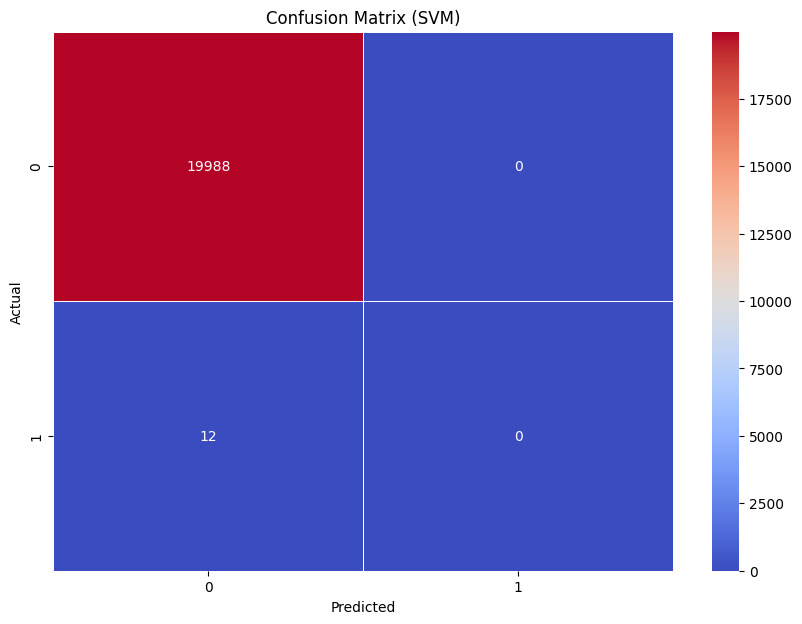

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19991
           1       0.00      0.00      0.00         9

    accuracy                           1.00     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       1.00      1.00      1.00     20000

Confusion Matrix:
[[19991     0]
 [    9     0]]


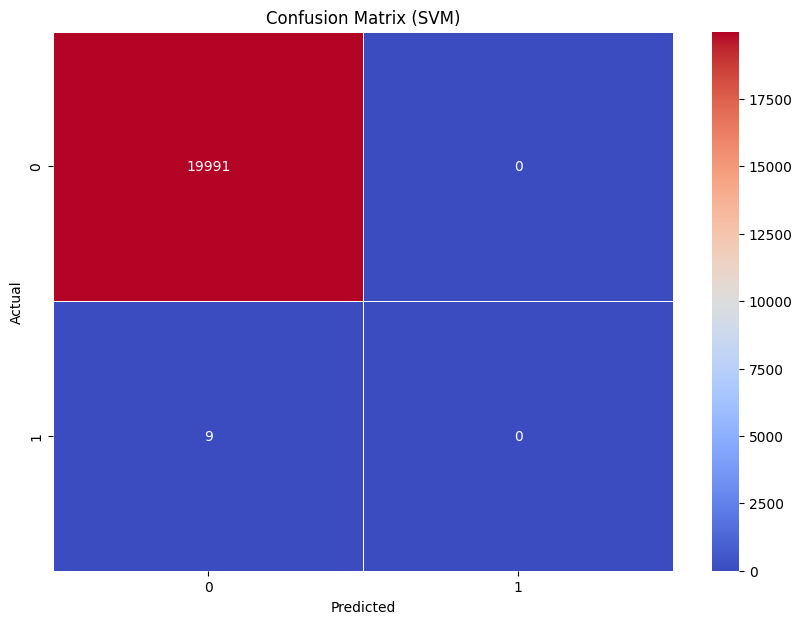

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19997
           1       0.00      0.00      0.00         3

    accuracy                           1.00     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       1.00      1.00      1.00     20000

Confusion Matrix:
[[19997     0]
 [    3     0]]


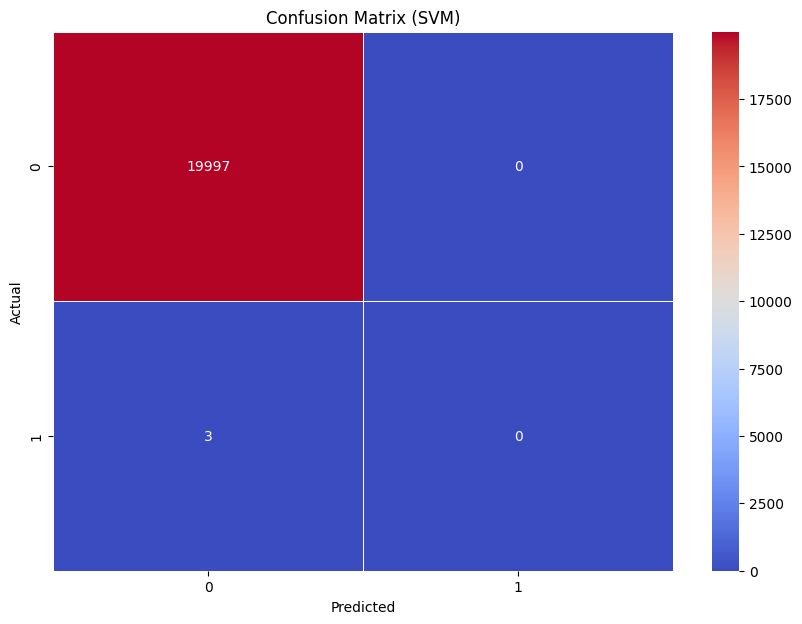

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19983
           1       1.00      0.18      0.30        17

    accuracy                           1.00     20000
   macro avg       1.00      0.59      0.65     20000
weighted avg       1.00      1.00      1.00     20000

Confusion Matrix:
[[19983     0]
 [   14     3]]


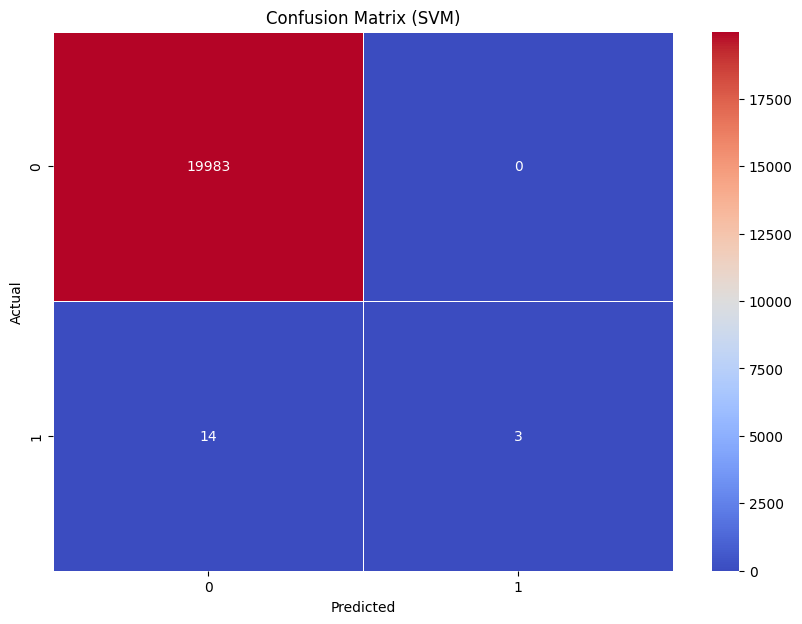

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19997
           1       0.00      0.00      0.00         3

    accuracy                           1.00     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       1.00      1.00      1.00     20000

Confusion Matrix:
[[19997     0]
 [    3     0]]


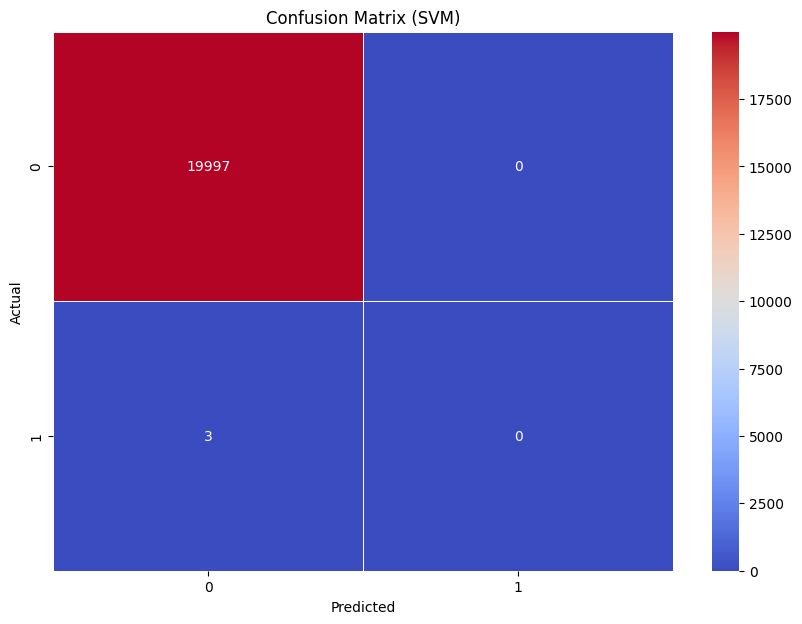

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19987
           1       1.00      0.23      0.38        13

    accuracy                           1.00     20000
   macro avg       1.00      0.62      0.69     20000
weighted avg       1.00      1.00      1.00     20000

Confusion Matrix:
[[19987     0]
 [   10     3]]


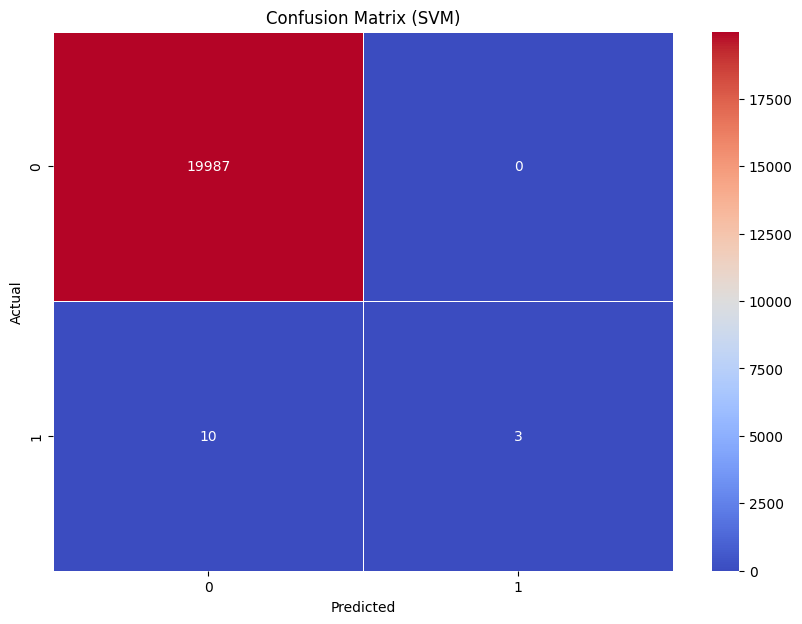

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19995
           1       1.00      0.20      0.33         5

    accuracy                           1.00     20000
   macro avg       1.00      0.60      0.67     20000
weighted avg       1.00      1.00      1.00     20000

Confusion Matrix:
[[19995     0]
 [    4     1]]


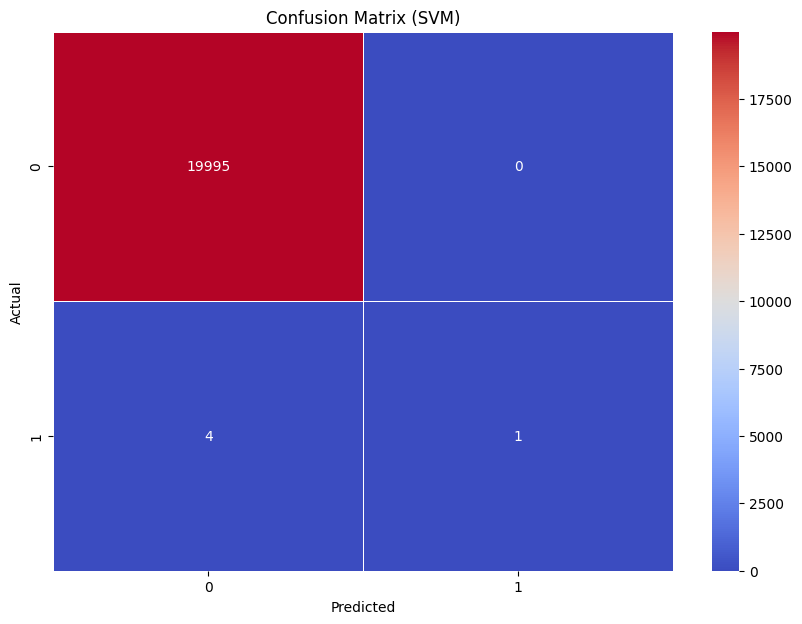

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19962
           1       1.00      0.34      0.51        38

    accuracy                           1.00     20000
   macro avg       1.00      0.67      0.75     20000
weighted avg       1.00      1.00      1.00     20000

Confusion Matrix:
[[19962     0]
 [   25    13]]


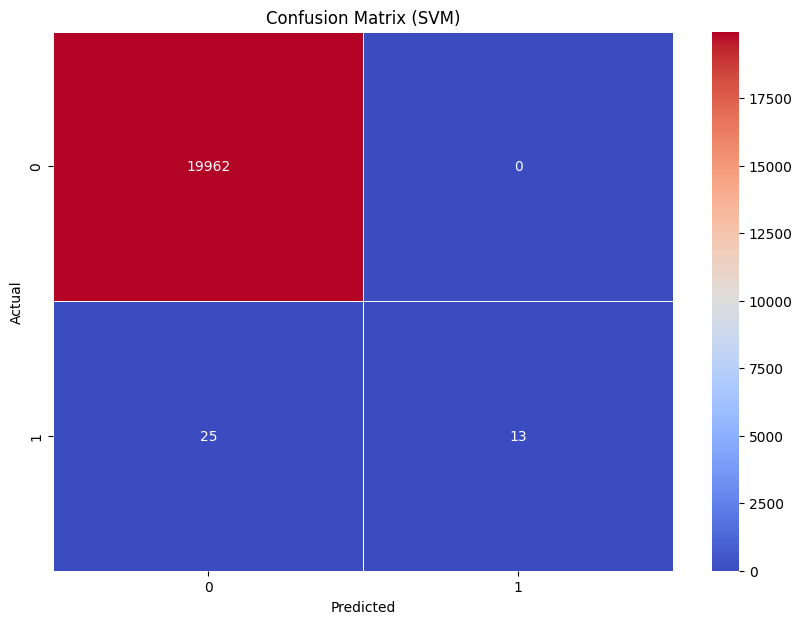

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19993
           1       1.00      0.14      0.25         7

    accuracy                           1.00     20000
   macro avg       1.00      0.57      0.62     20000
weighted avg       1.00      1.00      1.00     20000

Confusion Matrix:
[[19993     0]
 [    6     1]]


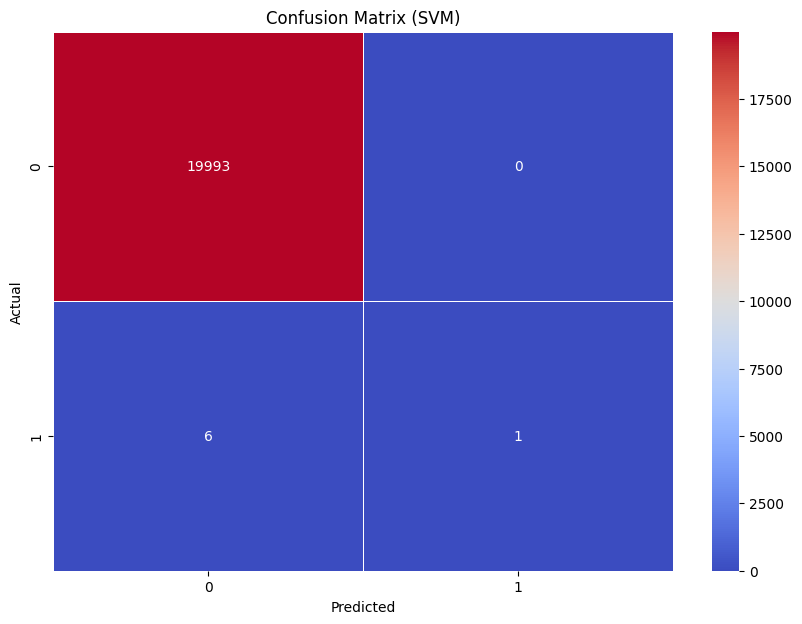

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19992
           1       0.00      0.00      0.00         8

    accuracy                           1.00     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       1.00      1.00      1.00     20000

Confusion Matrix:
[[19992     0]
 [    8     0]]


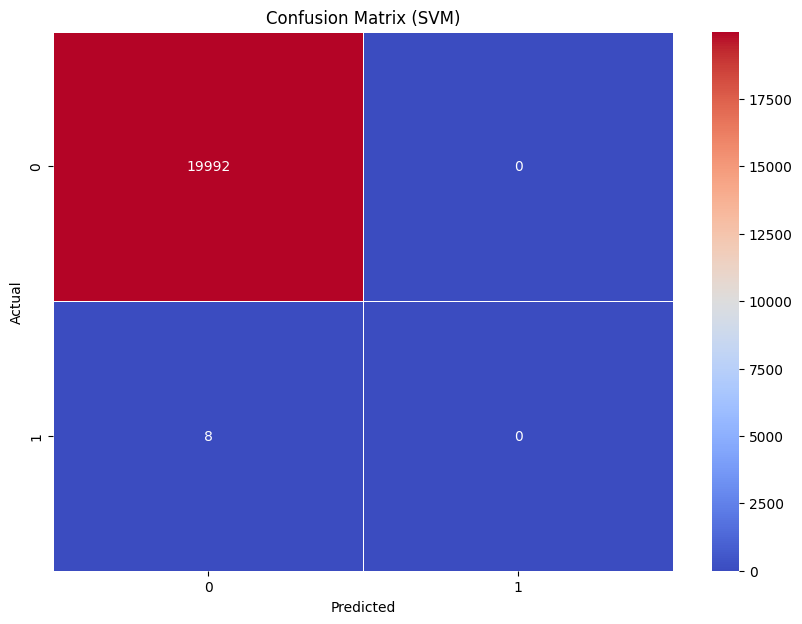

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19997
           1       1.00      0.33      0.50         3

    accuracy                           1.00     20000
   macro avg       1.00      0.67      0.75     20000
weighted avg       1.00      1.00      1.00     20000

Confusion Matrix:
[[19997     0]
 [    2     1]]


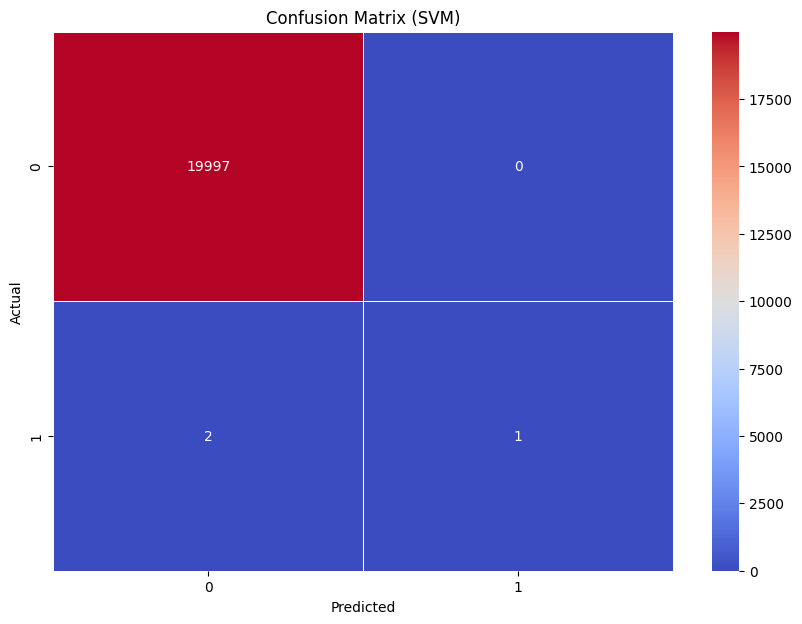

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19970
           1       1.00      0.27      0.42        30

    accuracy                           1.00     20000
   macro avg       1.00      0.63      0.71     20000
weighted avg       1.00      1.00      1.00     20000

Confusion Matrix:
[[19970     0]
 [   22     8]]


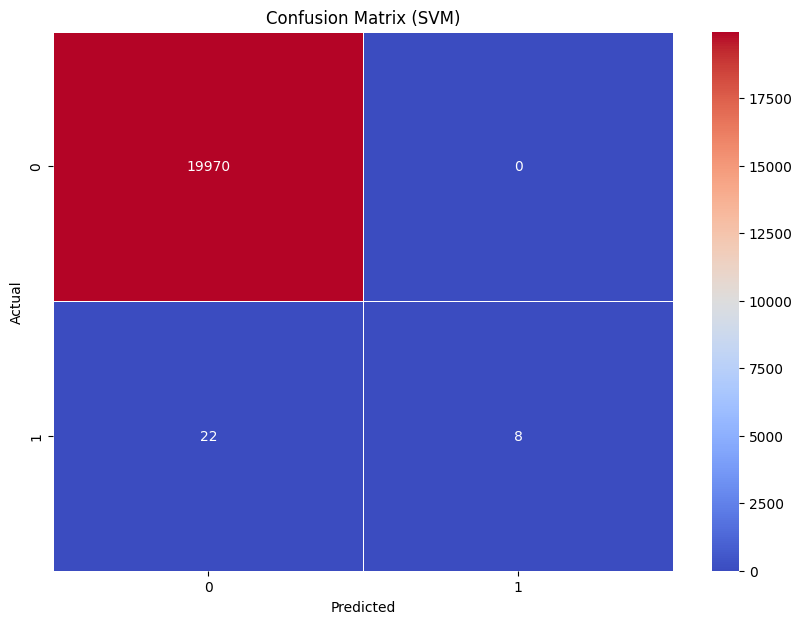

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19997
           1       0.00      0.00      0.00         3

    accuracy                           1.00     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       1.00      1.00      1.00     20000

Confusion Matrix:
[[19997     0]
 [    3     0]]


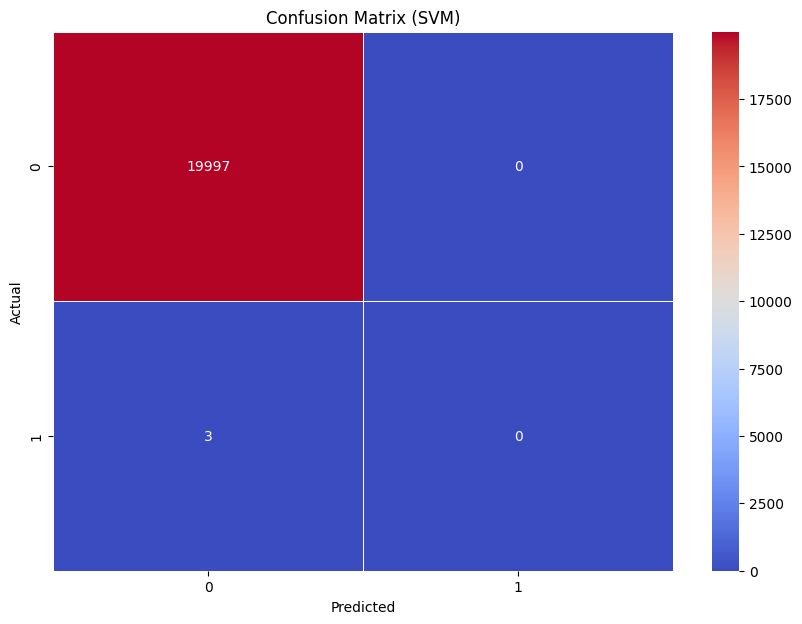

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19995
           1       1.00      0.20      0.33         5

    accuracy                           1.00     20000
   macro avg       1.00      0.60      0.67     20000
weighted avg       1.00      1.00      1.00     20000

Confusion Matrix:
[[19995     0]
 [    4     1]]


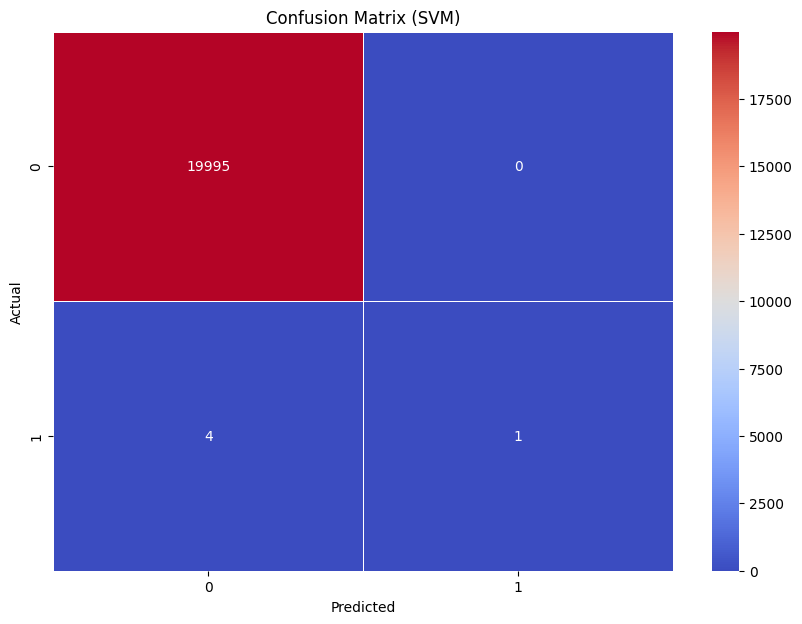

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19989
           1       1.00      0.27      0.43        11

    accuracy                           1.00     20000
   macro avg       1.00      0.64      0.71     20000
weighted avg       1.00      1.00      1.00     20000

Confusion Matrix:
[[19989     0]
 [    8     3]]


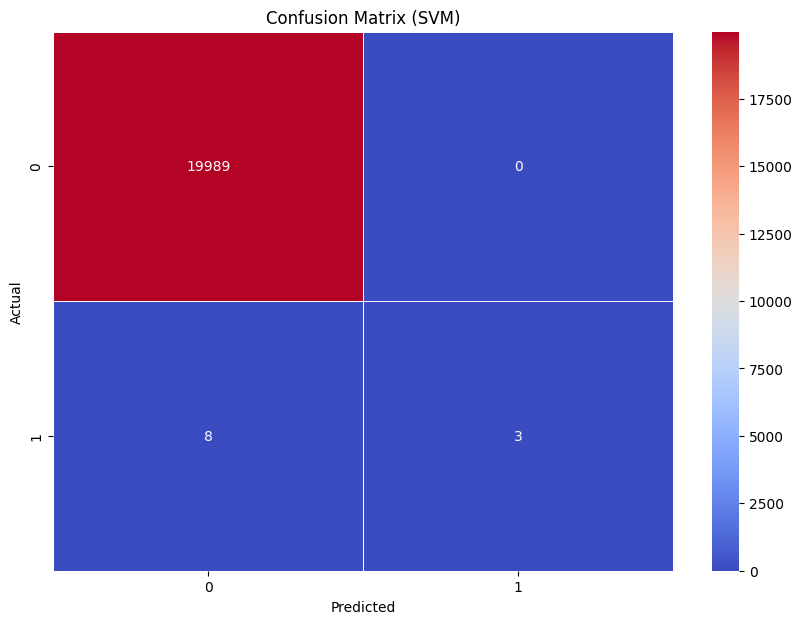

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19948
           1       1.00      0.33      0.49        52

    accuracy                           1.00     20000
   macro avg       1.00      0.66      0.75     20000
weighted avg       1.00      1.00      1.00     20000

Confusion Matrix:
[[19948     0]
 [   35    17]]


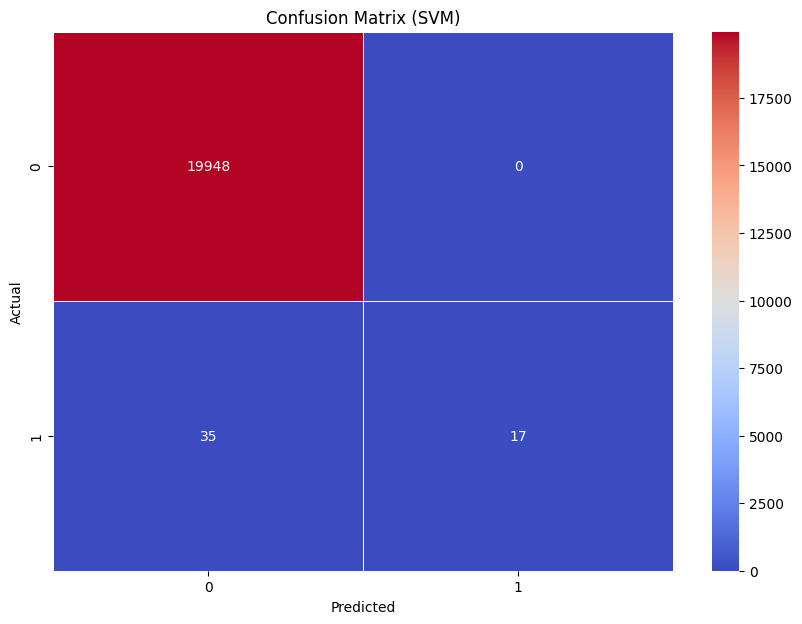

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     19802
           1       0.97      0.49      0.66       198

    accuracy                           0.99     20000
   macro avg       0.98      0.75      0.83     20000
weighted avg       0.99      0.99      0.99     20000

Confusion Matrix:
[[19799     3]
 [  100    98]]


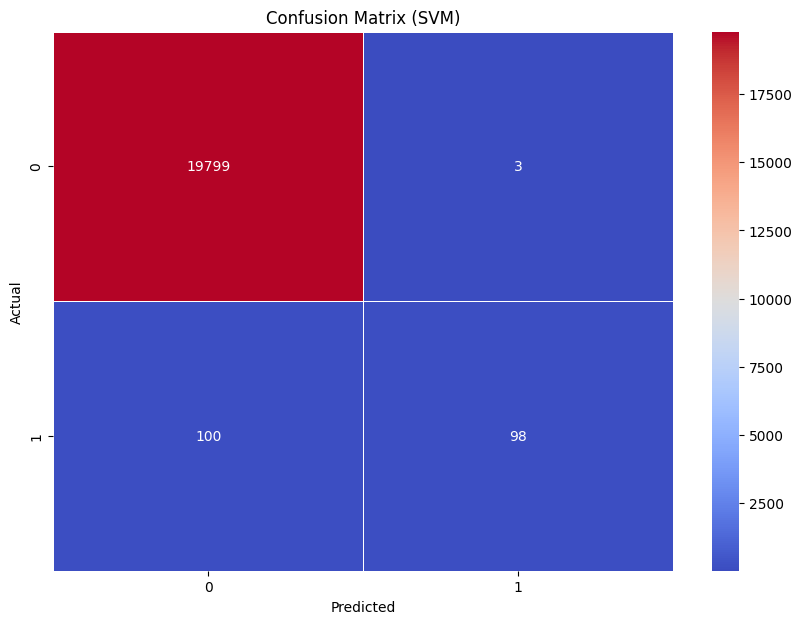

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19871
           1       1.00      0.36      0.53       129

    accuracy                           1.00     20000
   macro avg       1.00      0.68      0.76     20000
weighted avg       1.00      1.00      0.99     20000

Confusion Matrix:
[[19871     0]
 [   83    46]]


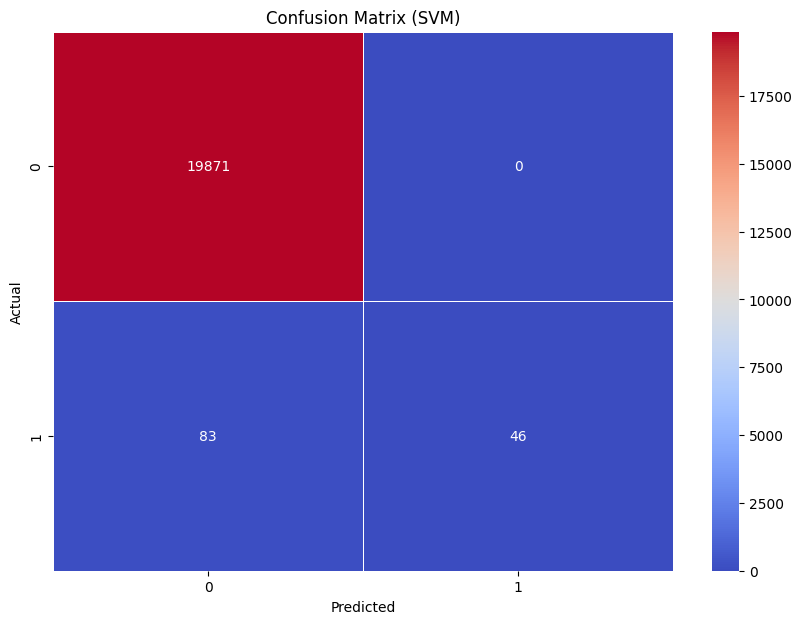

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     19768
           1       1.00      0.47      0.64       232

    accuracy                           0.99     20000
   macro avg       1.00      0.73      0.82     20000
weighted avg       0.99      0.99      0.99     20000

Confusion Matrix:
[[19768     0]
 [  124   108]]


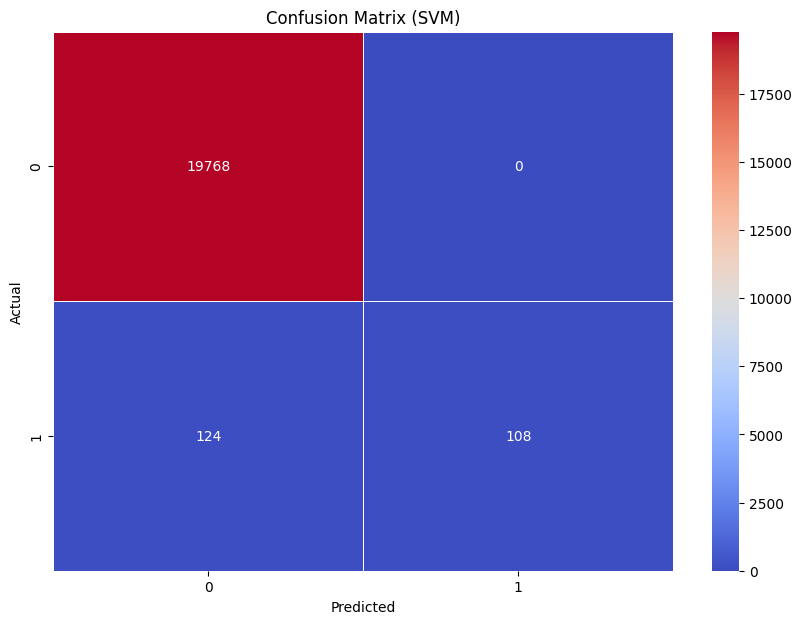

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     12359
           1       0.99      0.53      0.69       165

    accuracy                           0.99     12524
   macro avg       0.99      0.76      0.84     12524
weighted avg       0.99      0.99      0.99     12524

Confusion Matrix:
[[12358     1]
 [   78    87]]


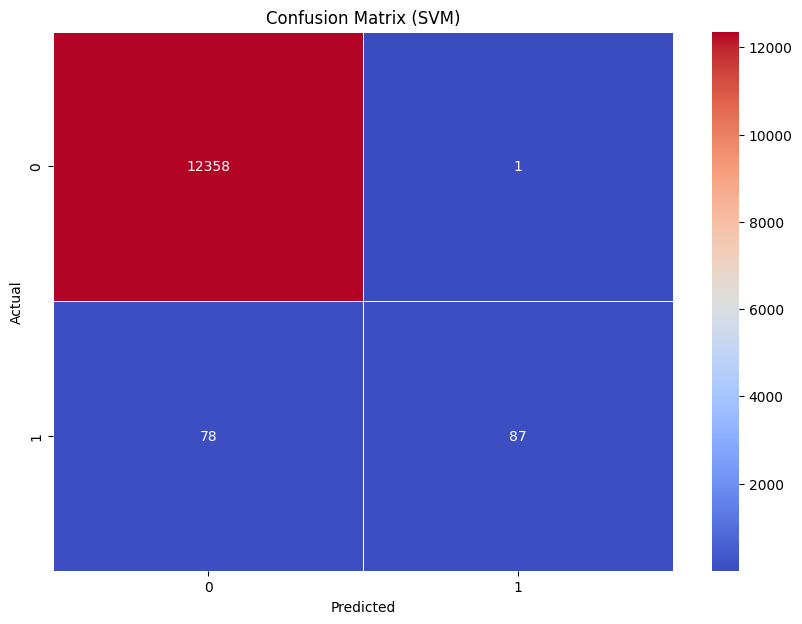

In [3]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def preprocess_data(chunk):
    # Drop unnecessary columns
    chunk.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)
    
    # Encode categorical variable 'type' using one-hot encoding
    enc = OneHotEncoder()
    type_encoded = enc.fit_transform(chunk[['type']])
    
    # Extracting feature names for the one-hot encoded column
    feature_names = enc.get_feature_names_out(['type'])
    
    # Convert encoded result to DataFrame and concatenate with original chunk
    type_encoded_df = pd.DataFrame(type_encoded.toarray(), columns=feature_names)
    chunk_processed = pd.concat([chunk.reset_index(drop=True), type_encoded_df], axis=1)
    
    # Drop the original 'type' column
    chunk_processed.drop(['type'], axis=1, inplace=True)
    
    return chunk_processed

def process_chunks(file_path, chunk_size):
    svm_model = SVC(kernel='linear', random_state=42)  # SVM with linear kernel
    
    scaler = StandardScaler()
    
    for chunk in pd.read_csv(file_path, chunksize=chunk_size):
        chunk_processed = preprocess_data(chunk)
        
        X = chunk_processed.drop('isFraud', axis=1)
        y = chunk_processed['isFraud']
        
        # Scale the features
        X_scaled = scaler.fit_transform(X)
        
        # Split into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
        
        # Train the SVM model
        svm_model.fit(X_train, y_train)
        
        # Evaluate the model
        y_pred = svm_model.predict(X_test)
        print(classification_report(y_test, y_pred))
        
        # Print confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        print("Confusion Matrix:")
        print(cm)
        
        # Plot confusion matrix as heatmap with custom colors
        plt.figure(figsize=(10,7))
        sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', linewidths=0.5)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix (SVM)')
        plt.show()

# Example usage
file_path = 'Synthetic_Financial_datasets_log.csv'  # Replace with your actual file path
chunk_size = 100000  # Reduced chunk size for faster initial testing
process_chunks(file_path, chunk_size)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199898
           1       1.00      0.11      0.19       102

    accuracy                           1.00    200000
   macro avg       1.00      0.55      0.60    200000
weighted avg       1.00      1.00      1.00    200000

Confusion Matrix:
[[199898      0]
 [    91     11]]


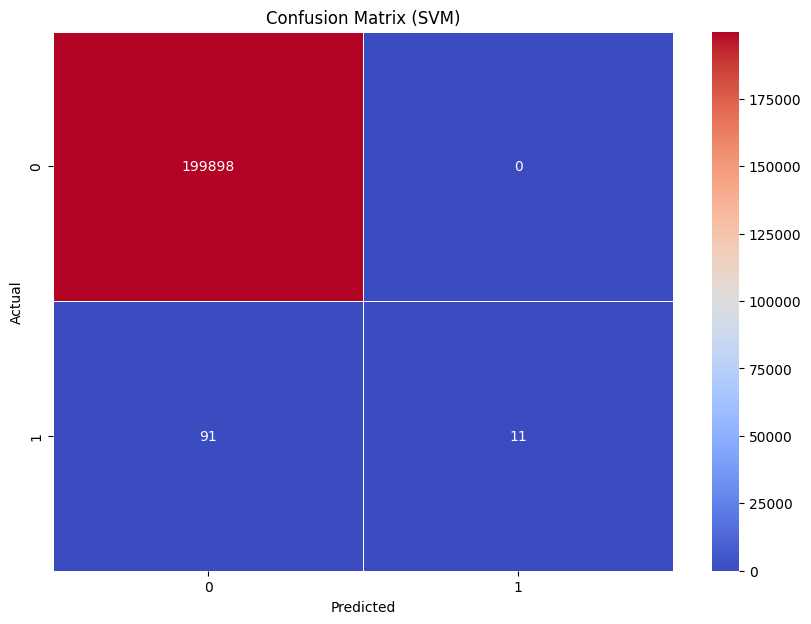

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199687
           1       1.00      0.42      0.59       313

    accuracy                           1.00    200000
   macro avg       1.00      0.71      0.80    200000
weighted avg       1.00      1.00      1.00    200000

Confusion Matrix:
[[199687      0]
 [   181    132]]


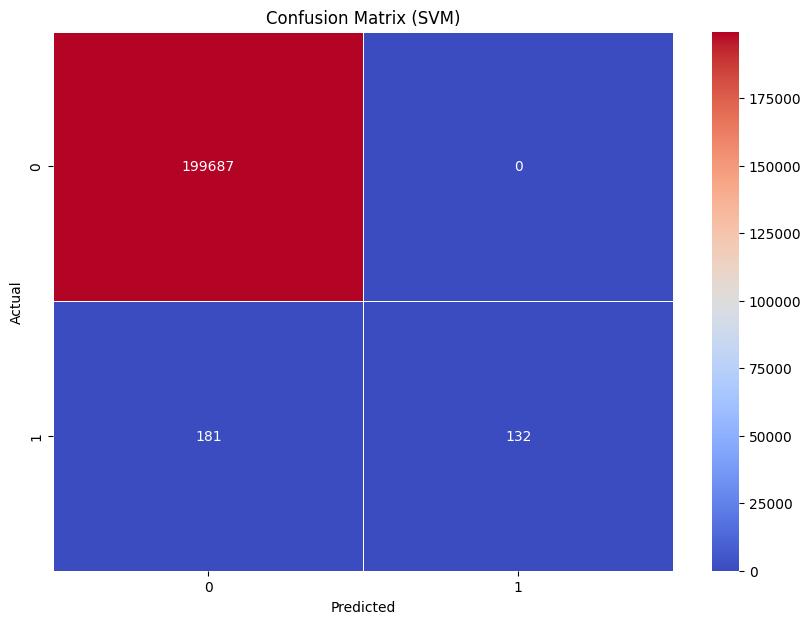

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199881
           1       1.00      0.29      0.44       119

    accuracy                           1.00    200000
   macro avg       1.00      0.64      0.72    200000
weighted avg       1.00      1.00      1.00    200000

Confusion Matrix:
[[199881      0]
 [    85     34]]


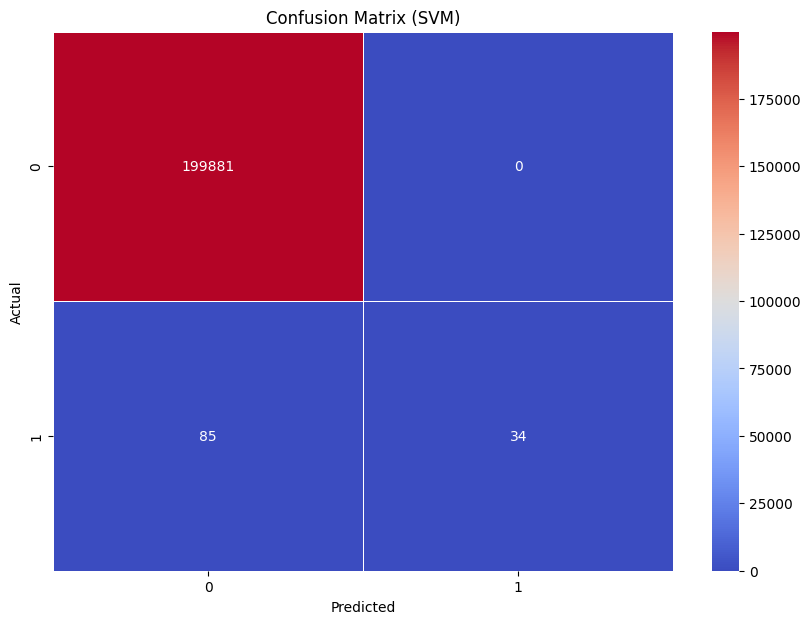

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199859
           1       0.97      0.27      0.42       141

    accuracy                           1.00    200000
   macro avg       0.99      0.63      0.71    200000
weighted avg       1.00      1.00      1.00    200000

Confusion Matrix:
[[199858      1]
 [   103     38]]


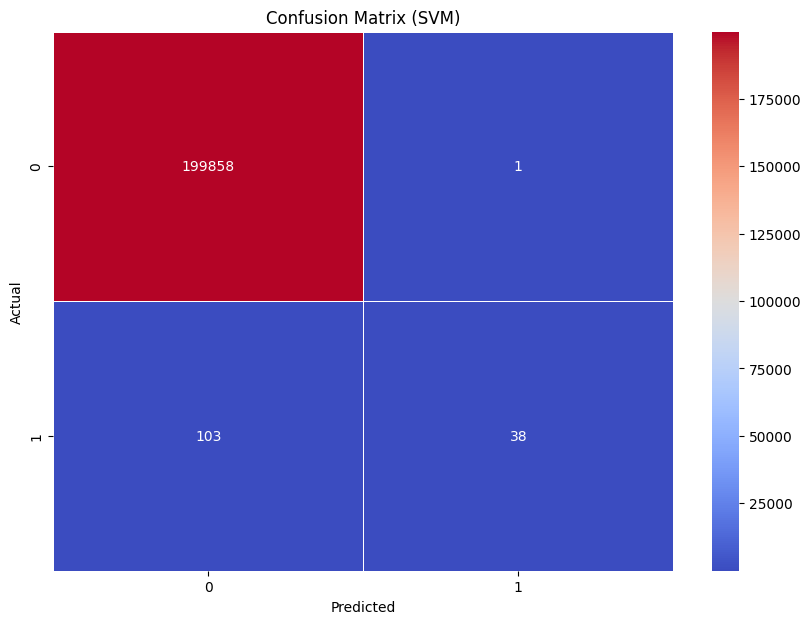

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199898
           1       1.00      0.25      0.41       102

    accuracy                           1.00    200000
   macro avg       1.00      0.63      0.70    200000
weighted avg       1.00      1.00      1.00    200000

Confusion Matrix:
[[199898      0]
 [    76     26]]


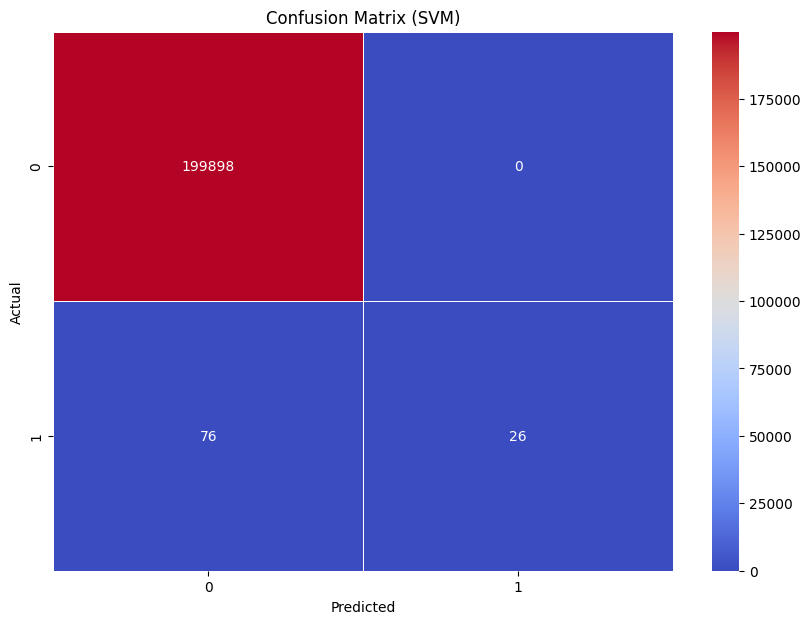

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199838
           1       1.00      0.32      0.49       162

    accuracy                           1.00    200000
   macro avg       1.00      0.66      0.74    200000
weighted avg       1.00      1.00      1.00    200000

Confusion Matrix:
[[199838      0]
 [   110     52]]


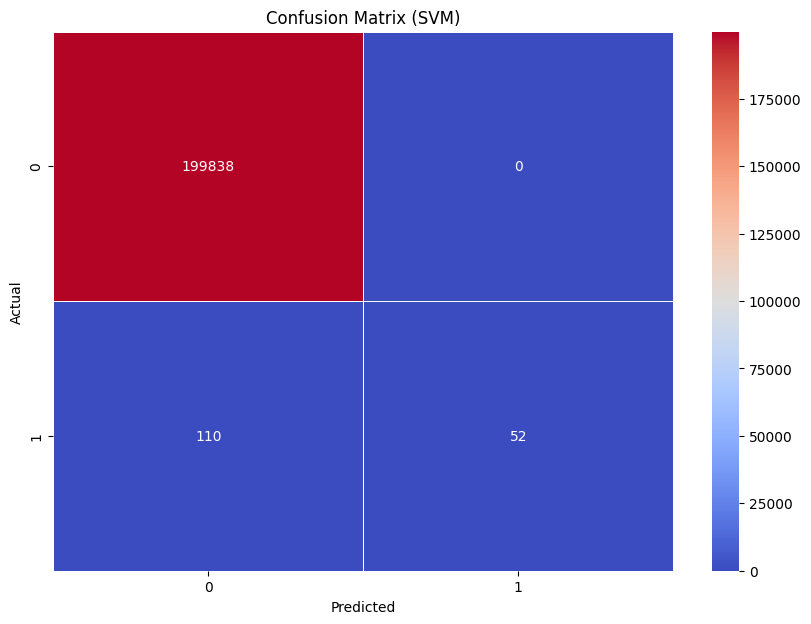

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71843
           1       0.99      0.50      0.66       681

    accuracy                           1.00     72524
   macro avg       0.99      0.75      0.83     72524
weighted avg       1.00      1.00      0.99     72524

Confusion Matrix:
[[71838     5]
 [  341   340]]


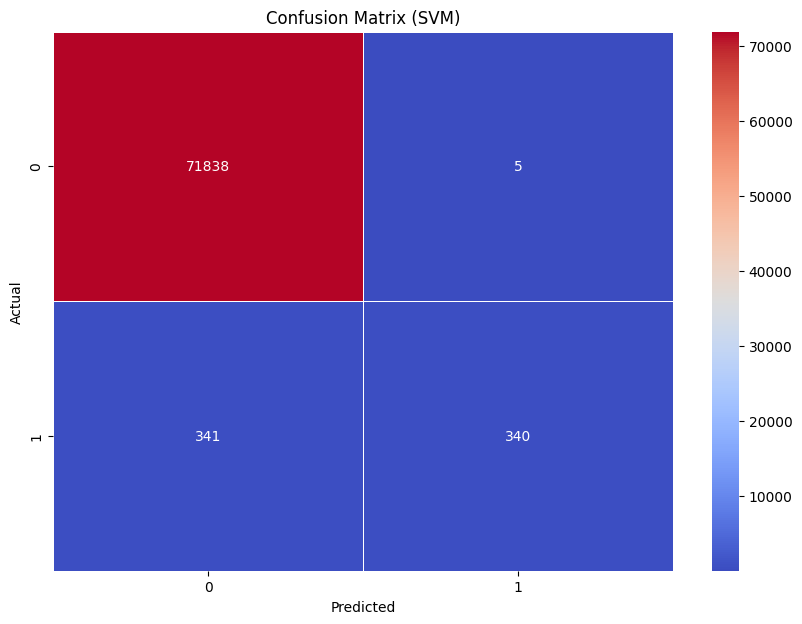

In [4]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def preprocess_data(chunk):
    # Drop unnecessary columns
    chunk.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)
    
    # Encode categorical variable 'type' using one-hot encoding
    enc = OneHotEncoder()
    type_encoded = enc.fit_transform(chunk[['type']])
    
    # Extracting feature names for the one-hot encoded column
    feature_names = enc.get_feature_names_out(['type'])
    
    # Convert encoded result to DataFrame and concatenate with original chunk
    type_encoded_df = pd.DataFrame(type_encoded.toarray(), columns=feature_names)
    chunk_processed = pd.concat([chunk.reset_index(drop=True), type_encoded_df], axis=1)
    
    # Drop the original 'type' column
    chunk_processed.drop(['type'], axis=1, inplace=True)
    
    return chunk_processed

def process_chunks(file_path, chunk_size):
    svm_model = SVC(kernel='linear', random_state=42)  # SVM with linear kernel
    
    scaler = StandardScaler()
    
    for chunk in pd.read_csv(file_path, chunksize=chunk_size):
        chunk_processed = preprocess_data(chunk)
        
        X = chunk_processed.drop('isFraud', axis=1)
        y = chunk_processed['isFraud']
        
        # Scale the features
        X_scaled = scaler.fit_transform(X)
        
        # Split into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
        
        # Train the SVM model
        svm_model.fit(X_train, y_train)
        
        # Evaluate the model
        y_pred = svm_model.predict(X_test)
        print(classification_report(y_test, y_pred))
        
        # Print confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        print("Confusion Matrix:")
        print(cm)
        
        # Plot confusion matrix as heatmap with custom colors
        plt.figure(figsize=(10,7))
        sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', linewidths=0.5)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix (SVM)')
        plt.show()

# Example usage
file_path = 'Synthetic_Financial_datasets_log.csv'  # Replace with your actual file path
chunk_size = 1000000  # Reduced chunk size for faster initial testing
process_chunks(file_path, chunk_size)
